<a href="https://colab.research.google.com/github/danielruizuleta/Proyecto-Grupo-Argos/blob/main/TP3/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y Descripción y de los datos



In [267]:

import sys
from pathlib import Path

import pandas as pd
import seaborn as sns

pd.set_option("display.float_format", "{:.2f}".format)


print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Pandas version:  2.2.2


In [268]:



print("Directorio actual:", Path.cwd())
print("Padres del directorio:", Path.cwd().parents)

DATA_DIR = Path.cwd() / "data"
print("Directorio de datos:", DATA_DIR)


Directorio actual: /content
Padres del directorio: <PosixPath.parents>
Directorio de datos: /content/data


In [408]:


# URL del archivo en GitHub
url = "https://raw.githubusercontent.com/danielruizuleta/Proyecto-Grupo-Argos/main/dataset_alpha_betha.csv"


alpha_df = pd.read_csv(url)


print(alpha_df.head())



       autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              Yes           Electronic che

In [270]:
from pathlib import Path

# Verificar directorio actual
print("Directorio actual:", Path.cwd())

# Verificar si la carpeta 'data/01_raw' existe
DATA_DIR = Path.cwd() / "data" / "01_raw"
print("¿Existe el directorio 01_raw?:", DATA_DIR.exists())

# Listar los archivos dentro de la carpeta
if DATA_DIR.exists():
    print("Archivos en 01_raw:", list(DATA_DIR.iterdir()))
else:
    print("La carpeta '01_raw' no existe. Asegúrate de que esté correctamente configurada.")


Directorio actual: /content
¿Existe el directorio 01_raw?: True
Archivos en 01_raw: [PosixPath('/content/data/01_raw/dataset_alpha_betha.csv')]


In [271]:
from pathlib import Path

DATA_DIR = Path.cwd() / "data" / "01_raw"

# Listar los archivos dentro de la carpeta
print("Archivos en 01_raw después de subir:", list(DATA_DIR.iterdir()))


Archivos en 01_raw después de subir: [PosixPath('/content/data/01_raw/dataset_alpha_betha.csv')]


In [272]:
from pathlib import Path


DATA_DIR = Path.cwd() / "data"
intermediate_dir = DATA_DIR / "02_intermediate"

intermediate_dir.mkdir(parents=True, exist_ok=True)


alpha_df = pd.read_csv(DATA_DIR / "01_raw/dataset_alpha_betha.csv")

alpha_df.to_parquet(intermediate_dir / "dataset_alpha_betha.parquet", engine="pyarrow")

print(f"Archivo guardado en: {intermediate_dir / 'dataset_alpha_betha.parquet'}")

Archivo guardado en: /content/data/02_intermediate/dataset_alpha_betha.parquet


In [273]:
alpha_df.head()

autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              Yes           Electronic check    29.85    29.85  Alpha  
1               No               Mailed check    56.95   1889.5  Alpha  
2              Yes               Mailed check    53.85   108.15  Betha  
3               No  Bank transfer (automatic)    42.30  1840.75  Alpha  
4              Yes           Electronic check    70.70   151.65  Betha

In [274]:
alpha_df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   autoID            7043 non-null   object 
 1   SeniorCity        7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Service1          7043 non-null   object 
 5   Service2          7043 non-null   object 
 6   Security          7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  Charges           7043 non-null   float64
 14  Demand            7043 non-null   object 
 15  Class             7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [275]:


alpha_df["Class"] = pd.Categorical(
    alpha_df["Class"], categories=['Alpha', 'Beta'], ordered=True
)

# Si hay una columna innecesaria la eliminamos
alpha_df = alpha_df.drop(columns=["Unnamed: 0"], errors='ignore')


print(alpha_df.head())
alpha_df = alpha_df.drop(columns=["Unnamed: 0"], errors='ignore')


print(alpha_df.head())


       autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              Yes           Electronic che

In [276]:
alpha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   autoID            7043 non-null   object  
 1   SeniorCity        7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   Service1          7043 non-null   object  
 5   Service2          7043 non-null   object  
 6   Security          7043 non-null   object  
 7   OnlineBackup      7043 non-null   object  
 8   DeviceProtection  7043 non-null   object  
 9   TechSupport       7043 non-null   object  
 10  Contract          7043 non-null   object  
 11  PaperlessBilling  7043 non-null   object  
 12  PaymentMethod     7043 non-null   object  
 13  Charges           7043 non-null   float64 
 14  Demand            7043 non-null   object  
 15  Class             5174 non-null   category
dtypes: category(1), float64(

In [277]:
# size of the dataframe
alpha_df.shape

(7043, 16)

In [278]:
alpha_df.sample(5)

autoID  SeniorCity Partner Dependents Service1          Service2  \
2027  3778-FOAQW           0     Yes         No      Yes                No   
6237  7153-OANIO           0      No         No      Yes                No   
5454  2506-TNFCO           1     Yes         No      Yes                No   
6653  8799-OXZMD           0      No         No       No  No phone service   
1967  0565-IYCGT           0      No         No      Yes               Yes   

                 Security         OnlineBackup     DeviceProtection  \
2027  No internet service  No internet service  No internet service   
6237                   No                   No                   No   
5454                   No                   No                   No   
6653                   No                   No                  Yes   
1967                  Yes                  Yes                  Yes   

              TechSupport        Contract PaperlessBilling  \
2027  No internet service        One year               No   
6237                   No  Month-to-month               No   
5454                   No  Month-to-month              Yes   
6653                   No  Month-to-month              Yes   
1967                  Yes        One year              Yes   

                PaymentMethod  Charges   Demand  Class  
2027             Mailed check    20.15   456.85  Alpha  
6237         Electronic check    69.95    69.95    NaN  
5454         Electronic check    69.55    69.55    NaN  
6653             Mailed check    29.75    790.7  Alpha  
1967  Credit card (automatic)    78.60  5356.45    NaN

In [279]:
alpha_df.isnull().sum()

autoID                 0
SeniorCity             0
Partner                0
Dependents             0
Service1               0
Service2               0
Security               0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Charges                0
Demand                 0
Class               1869
dtype: int64

Target Variable = Class

In [280]:
# Variables numericas
alpha_df.describe()

SeniorCity  Charges
count     7043.00  7043.00
mean         0.16    64.76
std          0.37    30.09
min          0.00    18.25
25%          0.00    35.50
50%          0.00    70.35
75%          0.00    89.85
max          1.00   118.75

In [281]:
# descripcion de columnas categoricas
alpha_df.describe(include="category")

Class
count    5174
unique      1
top     Alpha
freq     5174

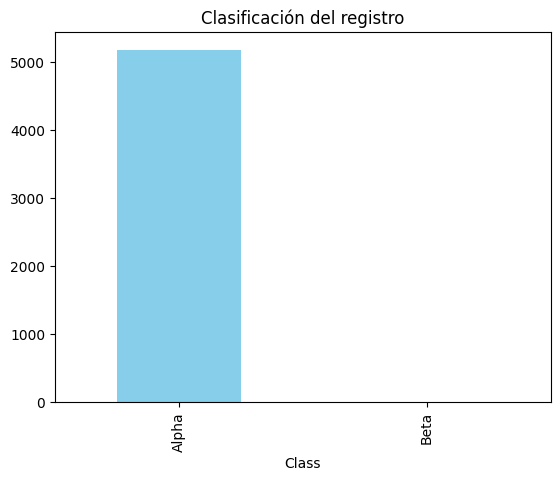

In [282]:
alpha_df["Class"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Clasificación del registro"
);


## Listado de variables numericas

In [283]:

numerical_columns = list(alpha_df.select_dtypes(include=["number"]).columns)
numerical_columns

['SeniorCity', 'Charges']

In [284]:
column = "Charges"
alpha_df[column].describe()

count   7043.00
mean      64.76
std       30.09
min       18.25
25%       35.50
50%       70.35
75%       89.85
max      118.75
Name: Charges, dtype: float64

In [285]:
# numero de variables unicas
alpha_df[column].nunique()

1585

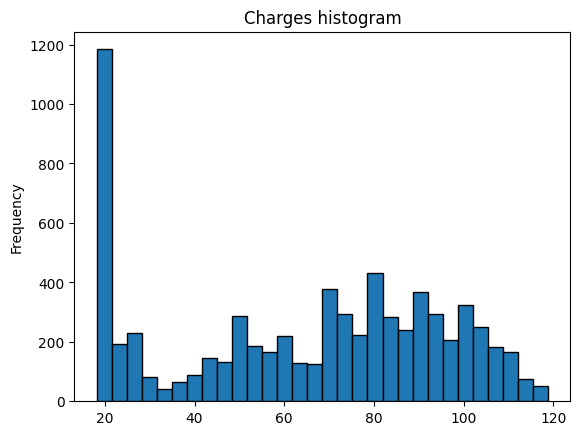

In [286]:
alpha_df[column].plot(
    kind="hist", bins=30, edgecolor="black", title=f"{column} histogram"
);

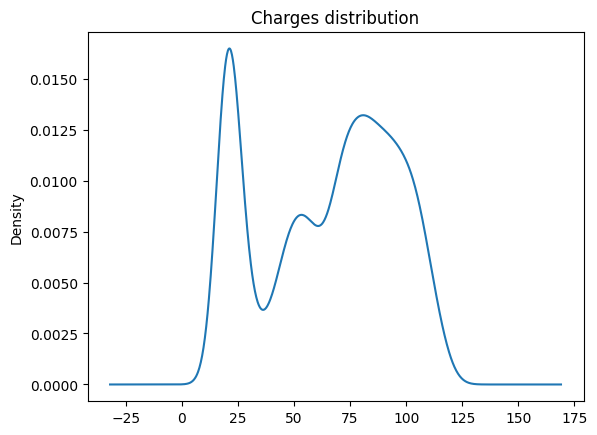

In [287]:
alpha_df[column].plot(kind="density", title=f"{column} distribution");


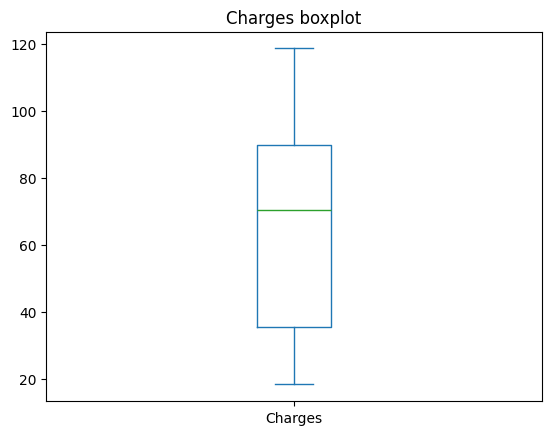

In [288]:
alpha_df[column].plot(kind="box", title=f"{column} boxplot");

In [289]:
#SeniorCity
column = "SeniorCity"
alpha_df[column].describe()

count   7043.00
mean       0.16
std        0.37
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: SeniorCity, dtype: float64

In [290]:
alpha_df[column].nunique()

2

In [291]:
alpha_df[column].unique()


array([0, 1])

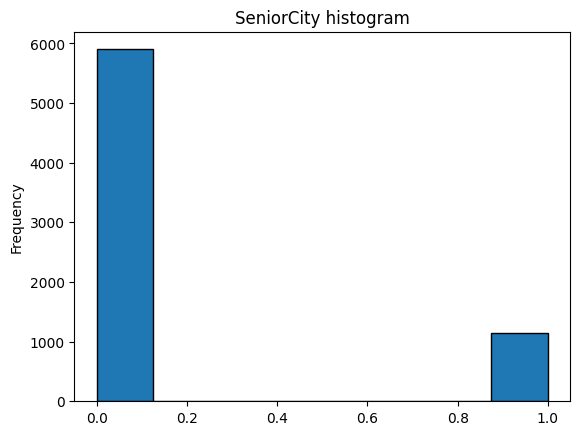

In [292]:
alpha_df[column].plot(
    kind="hist", bins=8, edgecolor="black", title=f"{column} histogram"
);

<Axes: title={'center': 'SeniorCity boxplot'}>

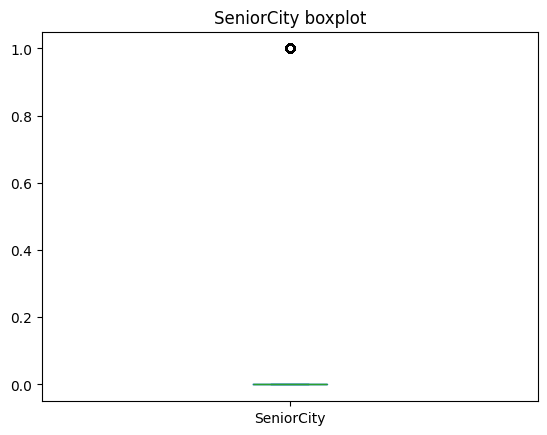

In [293]:
alpha_df[column].plot(kind="box", title=f"{column} boxplot")

# Listado de variables categoricas

In [294]:
categorical_columns = list(alpha_df.select_dtypes(include=["category"]).columns)
categorical_columns

['Class']

In [295]:
column = "Class"
alpha_df[column].describe()


count      5174
unique        1
top       Alpha
freq       5174
Name: Class, dtype: object

In [296]:
alpha_df[column].unique()

['Alpha', NaN]
Categories (2, object): ['Alpha' < 'Beta']

In [297]:
alpha_df[column].value_counts()

Class
Alpha    5174
Beta        0
Name: count, dtype: int64

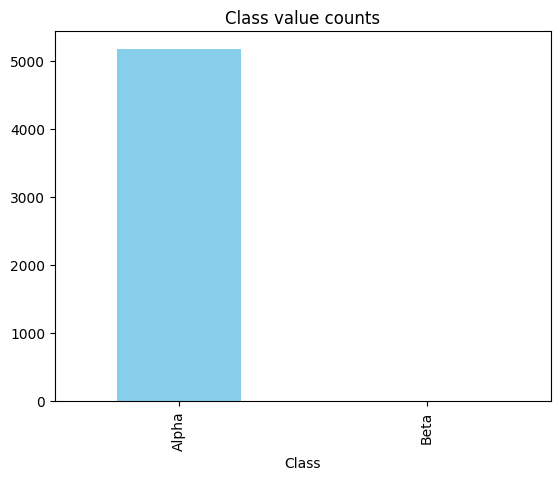

In [298]:
alpha_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts"
);

# Target vs Numerical Variables

In [299]:
print(alpha_df["Class"].isna().sum())


1869


In [300]:
# Reemplazar los NaN en la columna Class por 'Beta
alpha_df['Class'].fillna('Beta', inplace=True)

# Verifica que los NaN se hayan reemplazado
print(alpha_df['Class'].isna().sum())


0


<ipython-input-300-bf69a351c796>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alpha_df['Class'].fillna('Beta', inplace=True)


In [301]:
alpha_df.sample(5)

autoID  SeniorCity Partner Dependents Service1          Service2  \
2886  3170-GWYKC           0      No         No      Yes                No   
4629  6112-KTHFQ           0      No         No      Yes                No   
1242  0668-OGMHD           0     Yes         No       No  No phone service   
2923  4402-FTBXC           0      No         No      Yes                No   
5700  3312-ZWLGF           1     Yes         No      Yes               Yes   

                 Security         OnlineBackup     DeviceProtection  \
2886                  Yes                   No                  Yes   
4629  No internet service  No internet service  No internet service   
1242                  Yes                   No                   No   
2923                  Yes                   No                  Yes   
5700                   No                   No                   No   

              TechSupport        Contract PaperlessBilling  \
2886                  Yes  Month-to-month              Yes   
4629  No internet service  Month-to-month              Yes   
1242                   No  Month-to-month               No   
2923                   No  Month-to-month               No   
5700                  Yes  Month-to-month              Yes   

                  PaymentMethod  Charges   Demand  Class  
2886  Bank transfer (automatic)   104.95  6236.75  Alpha  
4629               Mailed check    19.30    279.3  Alpha  
1242           Electronic check    28.50   629.35  Alpha  
2923               Mailed check    89.80     4667  Alpha  
5700           Electronic check    79.30  2414.55  Alpha

<ipython-input-302-8bbbab37cfc7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_df.plot(


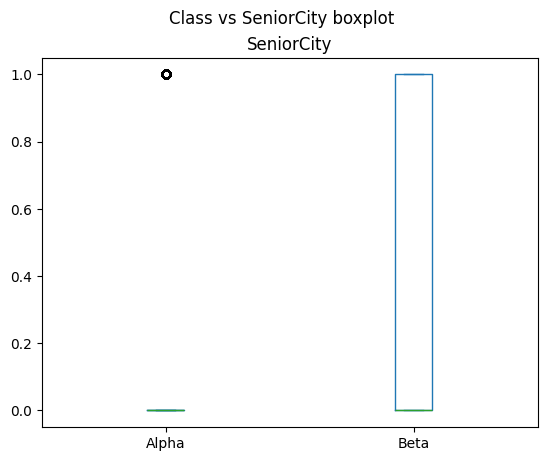

In [302]:
variable = "SeniorCity"
alpha_df.plot(
    kind="box",
    column=variable,
    by="Class",
    grid=False,
    title=f"Class vs {variable} boxplot",
);



<Axes: title={'center': 'Alpha vs Beta density plot for SeniorCity'}, ylabel='Density'>

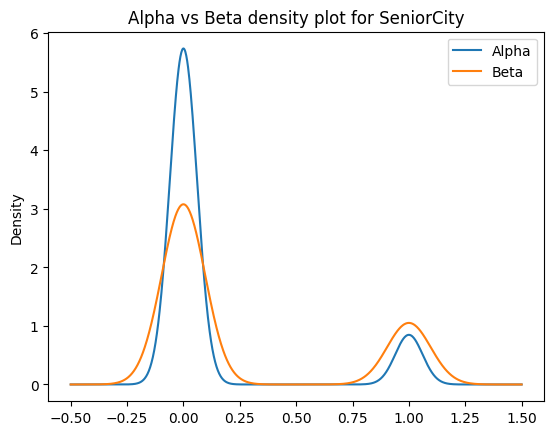

In [303]:

alpha_df[alpha_df['Class'] == 'Alpha'][variable].plot(
    kind="kde",
    label="Alpha",
    legend=True,
    title=f"Alpha vs Beta density plot for {variable}",
)

alpha_df[alpha_df['Class'] == 'Beta'][variable].plot(
    kind="kde",
    label="Beta",
    legend=True,
    xlabel=variable,
    ylabel="Density",
)

# Mostrar la gráfica


<ipython-input-304-7199f969c310>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_df.plot(


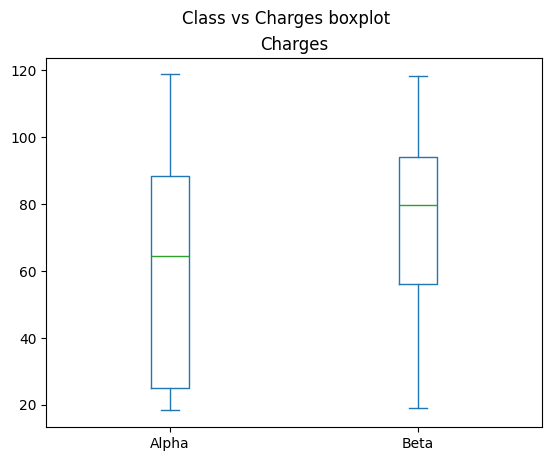

In [304]:
variable = "Charges"
alpha_df.plot(
    kind="box",
    column=variable,
    by="Class",
    grid=False,
    title=f"Class vs {variable} boxplot",
);

In [305]:
# Intentar convertir la columna "Demand" a numérica
try:
    alpha_df["Demand"] = pd.to_numeric(alpha_df["Demand"], errors="coerce")
    print("La columna 'Demand' se ha convertido correctamente en numérica.")
except Exception as e:
    print(f"Ocurrió un error al convertir la columna 'Demand': {e}")

# Verificar los tipos de datos
print(alpha_df.dtypes)

# Mostrar algunos datos para verificar
print(alpha_df["Demand"].head())


La columna 'Demand' se ha convertido correctamente en numérica.
autoID                object
SeniorCity             int64
Partner               object
Dependents            object
Service1              object
Service2              object
Security              object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
Charges              float64
Demand               float64
Class               category
dtype: object
0     29.85
1   1889.50
2    108.15
3   1840.75
4    151.65
Name: Demand, dtype: float64


In [306]:
alpha_df.sample(20)

autoID  SeniorCity Partner Dependents Service1          Service2  \
5196  0786-IVLAW           1      No         No      Yes               Yes   
2325  3097-PYWXL           0     Yes        Yes      Yes                No   
5242  5366-IJEQJ           0      No         No      Yes               Yes   
3381  8879-ZKJOF           0      No         No      Yes                No   
1754  3658-QQJYD           0      No         No      Yes                No   
125   4622-YNKIJ           0      No         No      Yes                No   
3582  6357-JJPQT           0      No         No      Yes                No   
6806  4933-BSAIP           0     Yes         No      Yes                No   
3786  0064-YIJGF           0     Yes        Yes      Yes               Yes   
4319  6333-YDVLT           0      No         No      Yes               Yes   
5926  1356-MKYSK           0      No         No      Yes                No   
3770  5821-MMEIL           0     Yes         No      Yes                No   
5561  5088-QZLRL           0      No         No      Yes                No   
6693  7895-VONWT           0      No         No       No  No phone service   
6458  9644-UMGQA           0     Yes        Yes      Yes                No   
1232  1689-MRZQR           0     Yes        Yes      Yes                No   
4799  4182-BGSIQ           0     Yes        Yes      Yes                No   
3642  2107-FBPTK           1      No         No      Yes               Yes   
4828  8350-NYMVI           0      No         No       No  No phone service   
5159  5928-QLDHB           0      No         No      Yes               Yes   

                 Security         OnlineBackup     DeviceProtection  \
5196                   No                  Yes                  Yes   
2325  No internet service  No internet service  No internet service   
5242                   No                   No                  Yes   
3381                  Yes                   No                  Yes   
1754                  Yes                  Yes                   No   
125                   Yes                   No                   No   
3582                   No                   No                   No   
6806  No internet service  No internet service  No internet service   
3786                   No                   No                   No   
4319                  Yes                   No                  Yes   
5926                  Yes                   No                  Yes   
3770  No internet service  No internet service  No internet service   
5561  No internet service  No internet service  No internet service   
6693                   No                   No                  Yes   
6458                  Yes                   No                   No   
1232                   No                   No                   No   
4799  No internet service  No internet service  No internet service   
3642                   No                  Yes                  Yes   
4828                   No                  Yes                  Yes   
5159                   No                   No                   No   

              TechSupport        Contract PaperlessBilling  \
5196                   No        One year               No   
2325  No internet service  Month-to-month              Yes   
5242                   No  Month-to-month              Yes   
3381                  Yes        One year              Yes   
1754                   No        One year              Yes   
125                   Yes        Two year              Yes   
3582                   No  Month-to-month              Yes   
6806  No internet service        Two year               No   
3786                   No  Month-to-month              Yes   
4319                  Yes        One year              Yes   
5926                  Yes  Month-to-month               No   
3770  No internet service        Two year               No   
5561  No internet service  Month-to-month               No   
6693       

# Target vs variables categoricas


In [307]:
# Convertir columnas 'object' a 'category'
categorical_columns = [
    'autoID', 'Partner', 'Dependents', 'Service1', 'Service2', 'Security',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Demand'
]

for col in categorical_columns:
    alpha_df[col] = alpha_df[col].astype('category')

# Verifica los tipos de datos después de la conversión
print(alpha_df.dtypes)


autoID              category
SeniorCity             int64
Partner             category
Dependents          category
Service1            category
Service2            category
Security            category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges              float64
Demand              category
Class               category
dtype: object


In [308]:
alpha_df.sample(5)




autoID  SeniorCity Partner Dependents Service1 Service2  \
2657  3301-LSLWQ           0      No         No      Yes      Yes   
2881  4003-OCTMP           0     Yes         No      Yes       No   
5539  4632-PAOYU           0     Yes        Yes      Yes       No   
4751  8785-EPNCG           0      No         No      Yes      Yes   
1337  6265-FRMTQ           0      No         No      Yes       No   

                 Security         OnlineBackup     DeviceProtection  \
2657                  Yes                   No                   No   
2881                  Yes                   No                   No   
5539  No internet service  No internet service  No internet service   
4751  No internet service  No internet service  No internet service   
1337  No internet service  No internet service  No internet service   

              TechSupport        Contract PaperlessBilling  \
2657                   No  Month-to-month              Yes   
2881                  Yes        One year              Yes   
5539  No internet service        One year               No   
4751  No internet service  Month-to-month               No   
1337  No internet service        Two year               No   

                  PaymentMethod  Charges  Demand  Class  
2657           Electronic check    66.10 1912.15  Alpha  
2881           Electronic check    64.00 1910.75  Alpha  
5539               Mailed check    19.95  433.50  Alpha  
4751    Credit card (automatic)    23.15  245.20   Beta  
1337  Bank transfer (automatic)    20.40  609.10  Alpha

In [309]:
# Obtener las columnas de tipo category
categorical_columns = alpha_df.select_dtypes(include=['category']).columns

# Mostrar las columnas categóricas
print("Variables categóricas (tipo 'category'):")
print(categorical_columns)

Variables categóricas (tipo 'category'):
Index(['autoID', 'Partner', 'Dependents', 'Service1', 'Service2', 'Security',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Demand', 'Class'],
      dtype='object')


In [310]:
column = "Contract"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs Contract Heatmap")
)

In [311]:


contract_df = alpha_df.groupby('Contract', observed=True).agg({"Class": "value_counts"})

#  calculamos el promedio de contratos por cada clase:
contract_counts = alpha_df.groupby(['Contract', 'Class']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada clase en cada tipo de contrato
contract_percentages = contract_counts.div(contract_counts.sum(axis=1), axis=0) * 100

# Mostrar los resultados
print(contract_percentages)



Class           Alpha  Beta
Contract                   
Month-to-month  57.29 42.71
One year        88.73 11.27
Two year        97.17  2.83


<ipython-input-311-77c1bb3bd105>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_counts = alpha_df.groupby(['Contract', 'Class']).size().unstack(fill_value=0)


se observa que la clase Alpha tiene un porcentaje mucho mayor en contratos a largo plazo (1 o 2 años), se puede interpretar que esta clase tiene una mayor fidelidad o preferencia por compromisos de largo plazo, mientras que la clase Beta prefiere contratos más flexibles mes a mes.

Esto también podría ser útil para estrategias de marketing o para ofrecer mejores condiciones a cada clase según sus preferencias contractuales.

**Class vs Partner**

In [312]:
column = "Partner"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

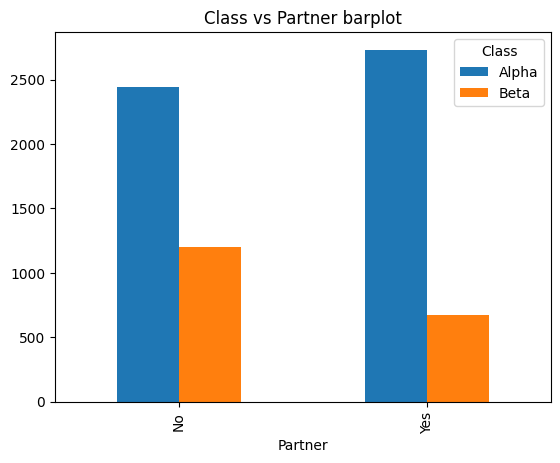

In [313]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs Dependents**

In [314]:
column = "Dependents"


pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)






Class       Alpha  Beta   All
Dependents                   
No           3390  1543  4933
Yes          1784   326  2110
All          5174  1869  7043

In [315]:
column = "Dependents"


result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


print(result)






Class       Alpha  Beta
Dependents             
No          68.72 31.28
Yes         84.55 15.45


<ipython-input-315-5ae562b6e6d8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


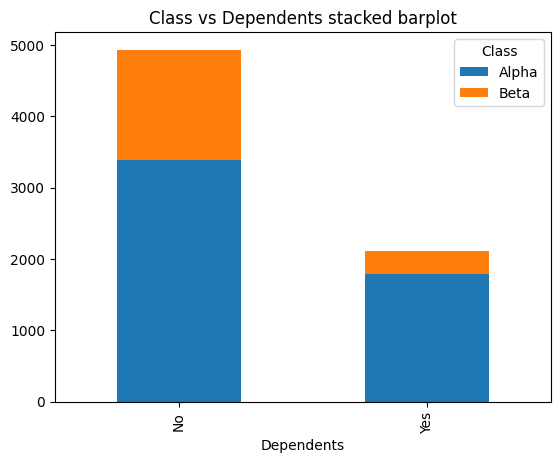

In [316]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);


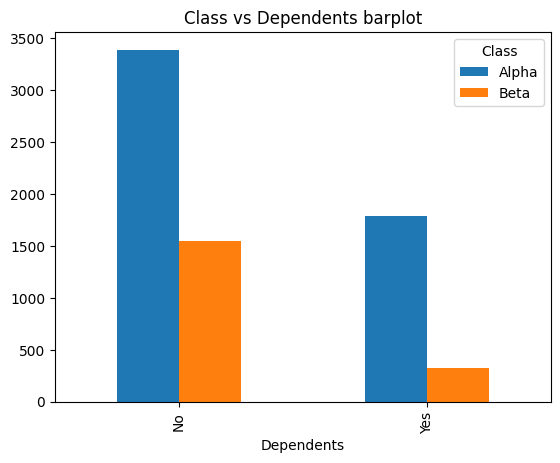

In [317]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs Service1**

In [318]:
column = "Service1"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [319]:
column = "Service1"


result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


print(result)


Class     Alpha  Beta
Service1             
No        75.07 24.93
Yes       73.29 26.71


<ipython-input-319-eda9180f1c74>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


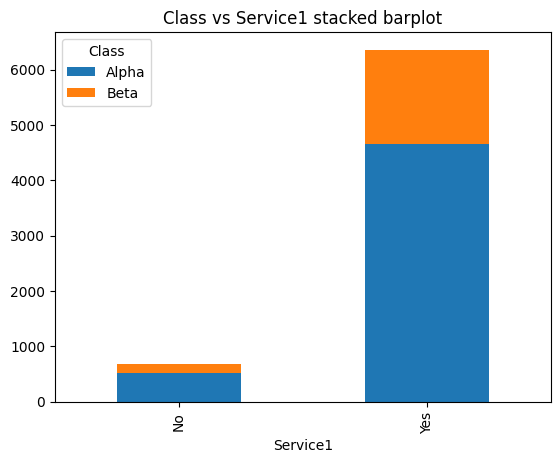

In [320]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);


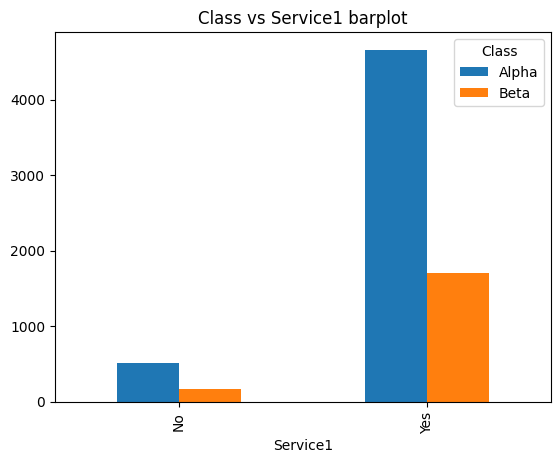

In [321]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs Service2**

In [322]:
column = "Service2"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [323]:
column = "Service2"


result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


print(result)


Class             Alpha  Beta
Service2                     
No                74.96 25.04
No phone service  75.07 24.93
Yes               71.39 28.61


<ipython-input-323-80e3bdec2362>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


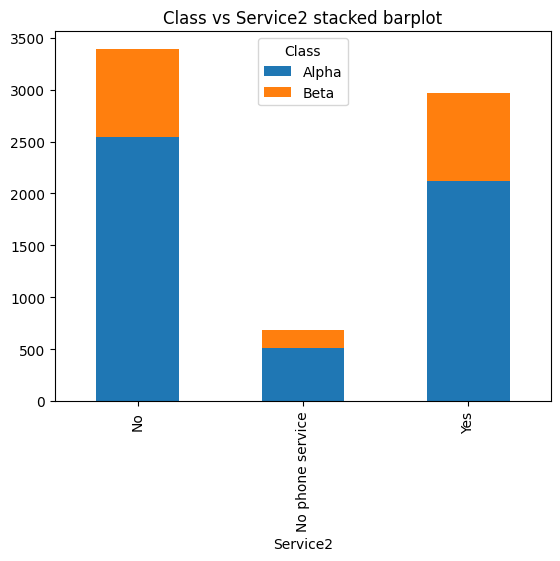

In [324]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);

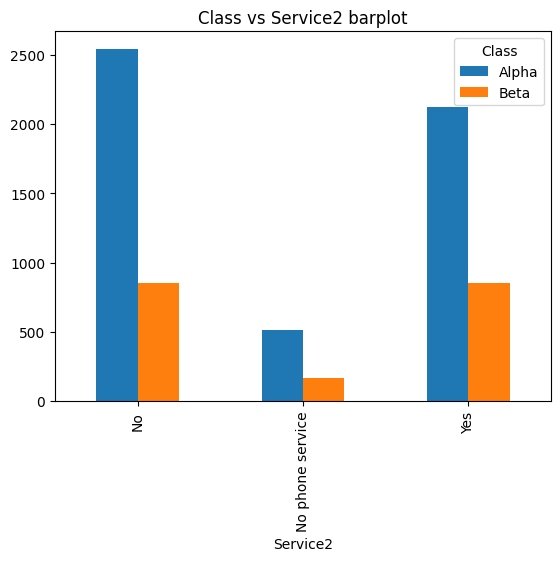

In [325]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**

```
# This is formatted as code
```

**Class vs Security**

In [326]:
column = "Security"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [327]:
column = "Security"
result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100
print(result)

Class                Alpha  Beta
Security                        
No                   58.23 41.77
No internet service  92.60  7.40
Yes                  85.39 14.61


<ipython-input-327-272beea0943a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


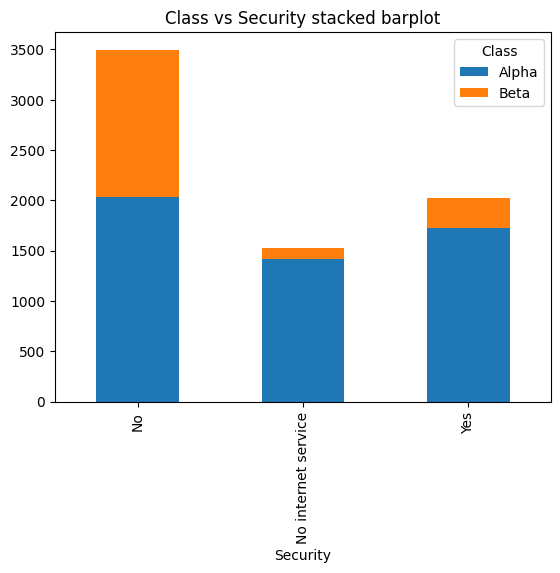

In [328]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);

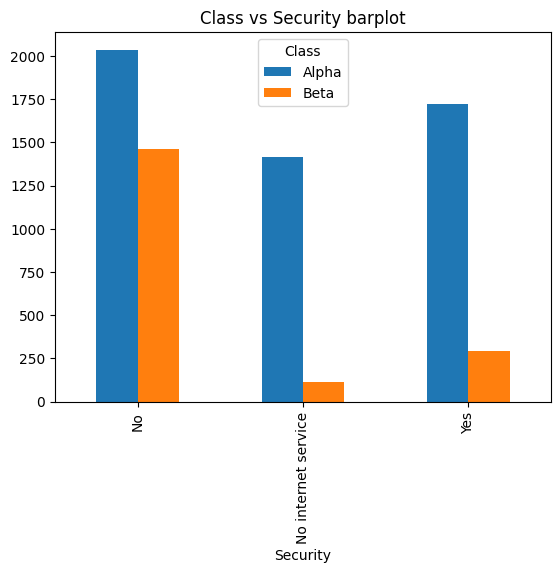

In [329]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs OnlineBackup**

In [330]:
column = "OnlineBackup"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [331]:
column = "OnlineBackup"
result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100
print(result)

Class                Alpha  Beta
OnlineBackup                    
No                   60.07 39.93
No internet service  92.60  7.40
Yes                  78.47 21.53


<ipython-input-331-07db5c0ae5ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


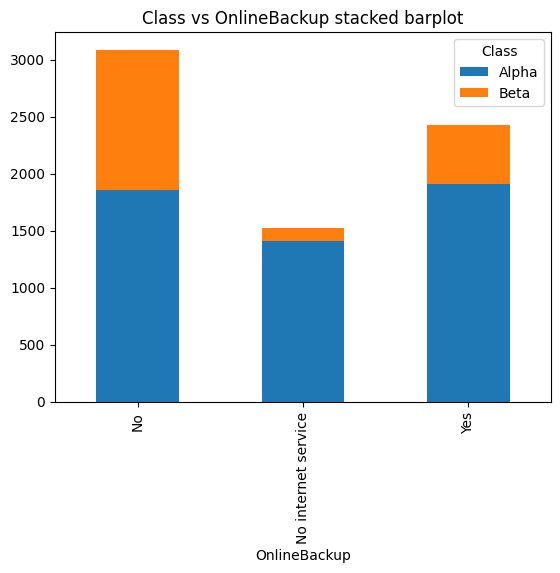

In [332]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);

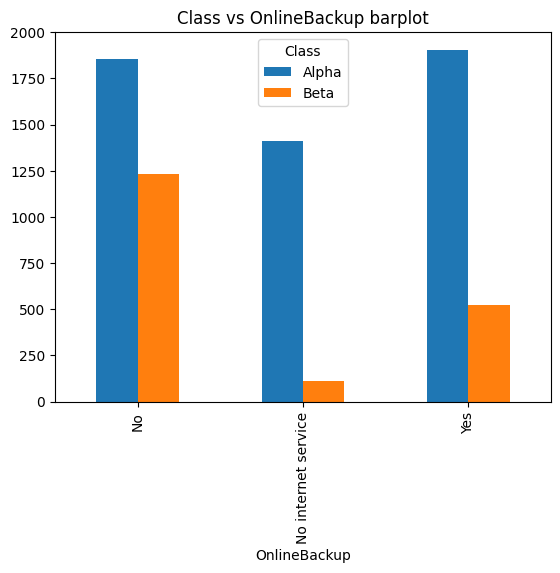

In [333]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs TechSupport**

In [334]:
column = "TechSupport"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [335]:
column = "TechSupport"
result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100
print(result)

Class                Alpha  Beta
TechSupport                     
No                   58.36 41.64
No internet service  92.60  7.40
Yes                  84.83 15.17


<ipython-input-335-1c4efc71f8b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


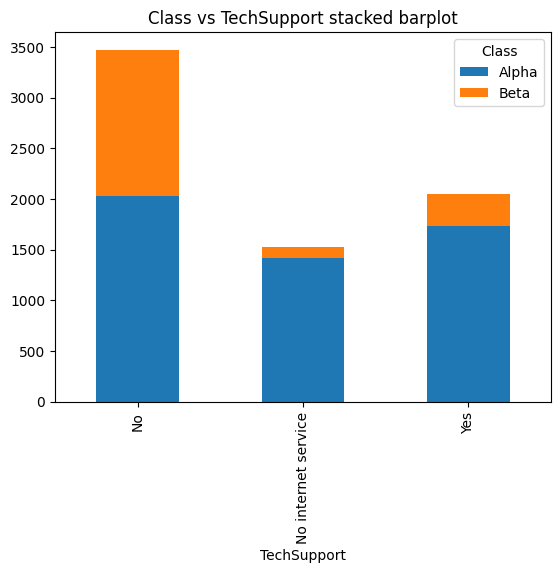

In [336]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);

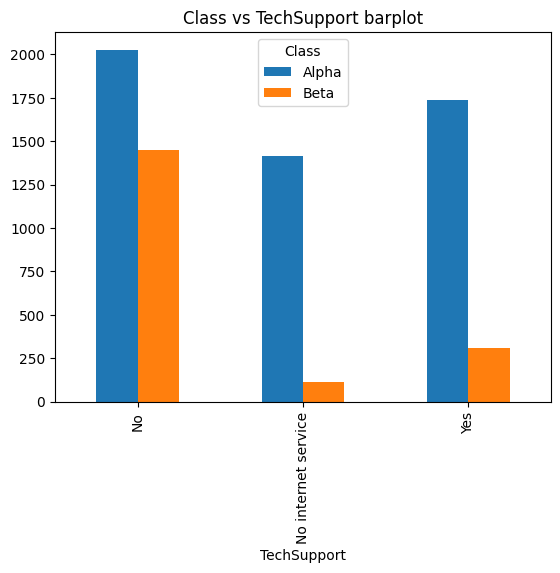

In [337]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Class vs PaymentMethod**

In [338]:
column = "PaymentMethod"

(
    pd.crosstab(alpha_df[column], alpha_df["Class"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Class vs pclass Heatmap")
)

In [339]:
column = "PaymentMethod"
result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100
print(result)

Class                      Alpha  Beta
PaymentMethod                         
Bank transfer (automatic)  83.29 16.71
Credit card (automatic)    84.76 15.24
Electronic check           54.71 45.29
Mailed check               80.89 19.11


<ipython-input-339-a89bd61d5f09>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = alpha_df.groupby(column)["Class"].value_counts(normalize=True).unstack() * 100


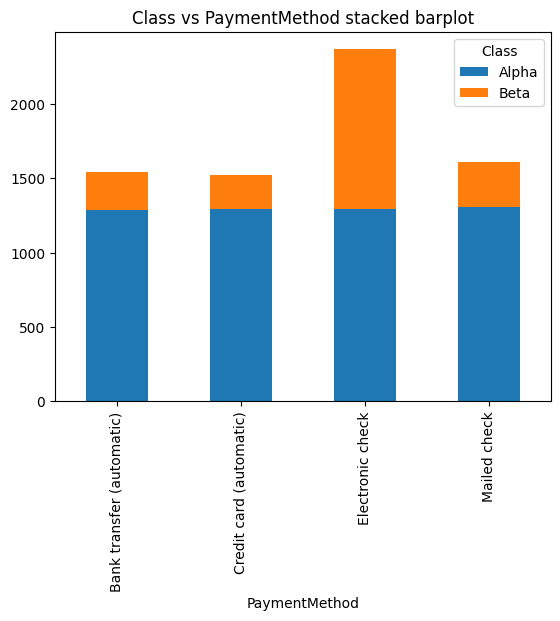

In [340]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar", stacked=True, title=f"Class vs {column} stacked barplot"
    )
);

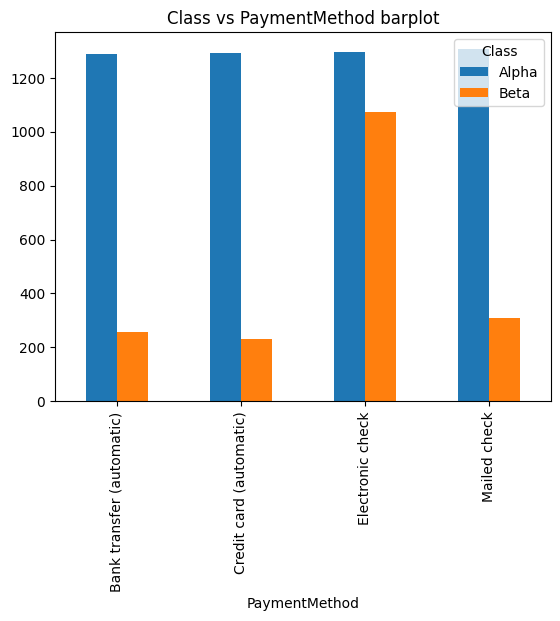

In [341]:
(
    pd.crosstab(alpha_df[column], alpha_df["Class"]).plot(
        kind="bar",
        title=f"Class vs {column} barplot",
    )
);

**Numerical vs Numerical Variables**

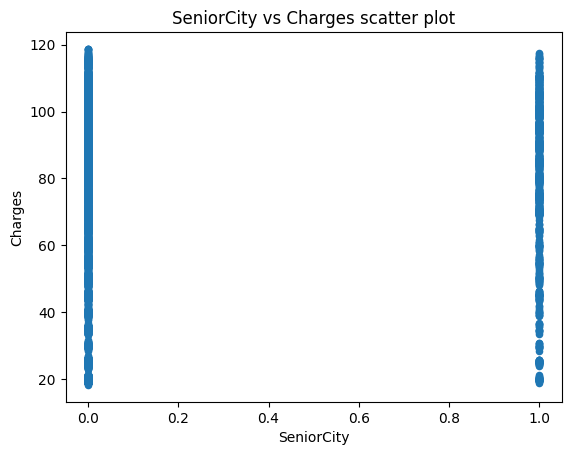

In [342]:
# scatter plot of SeniorCity vs Charges

alpha_df.plot(
    kind="scatter",
    x="SeniorCity",
    y="Charges",
    title="SeniorCity vs Charges scatter plot",
);

In [343]:

seniorcity_distribution = alpha_df.groupby("Class")["SeniorCity"].value_counts().unstack(fill_value=0)

print(seniorcity_distribution)



SeniorCity     0    1
Class                
Alpha       4508  666
Beta        1393  476


<ipython-input-343-4a4363f72877>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniorcity_distribution = alpha_df.groupby("Class")["SeniorCity"].value_counts().unstack(fill_value=0)


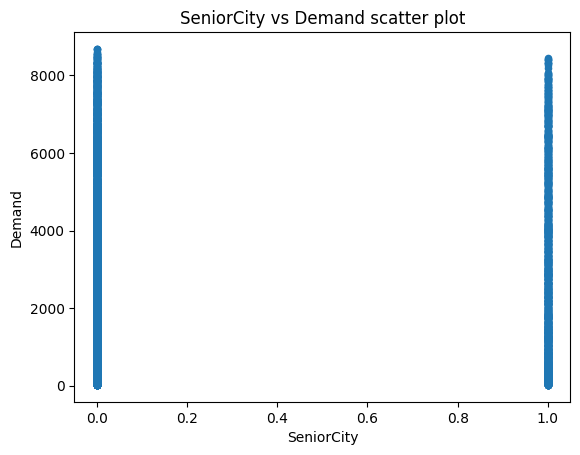

In [344]:
# scatter plot of SeniorCity vs Demand

alpha_df.plot(
    kind="scatter",
    x="SeniorCity",
    y="Demand",
    title="SeniorCity vs Demand scatter plot",
);


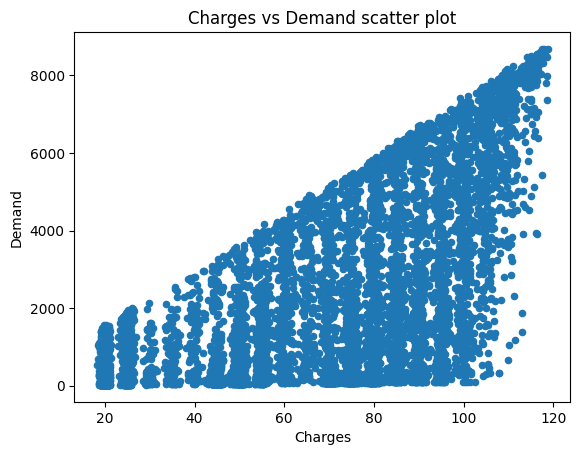

In [345]:
# scatter plot of Charges vs Demand

alpha_df	.plot(
    kind="scatter",
    x="Charges",
    y="Demand",
    title="Charges vs Demand scatter plot",
);


**Categorical vs Categorical Variables**


In [346]:
#Partner vs Dependents
column_1 = "Partner"
column_2 = "Dependents"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

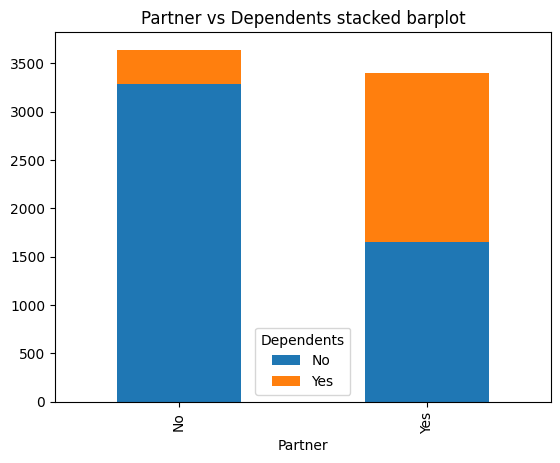

In [347]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

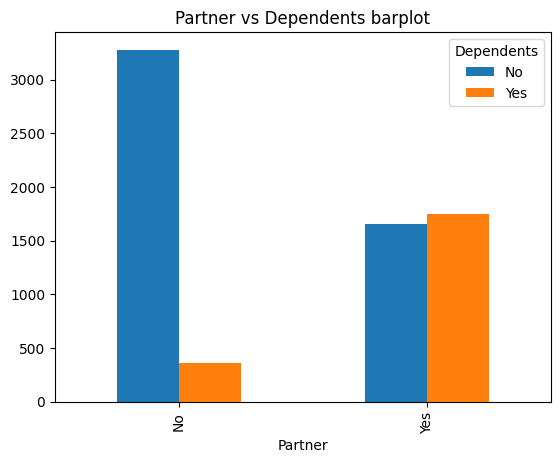

In [348]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs Service1**

In [349]:
column_1 = "Partner"
column_2 = "Service1"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

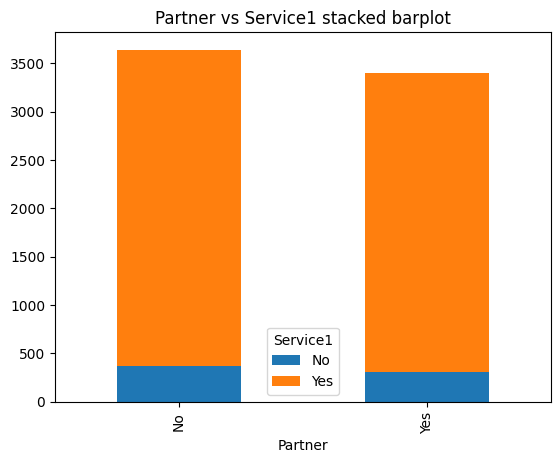

In [350]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

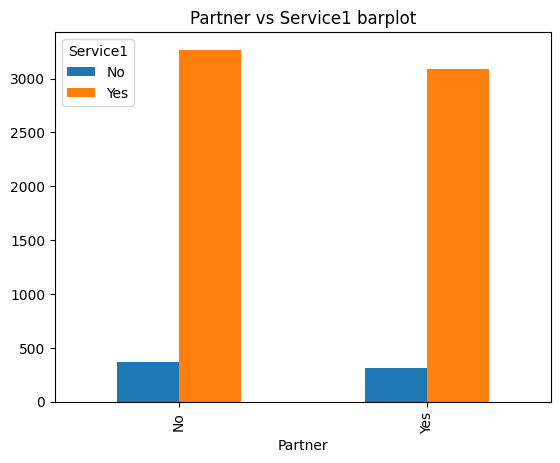

In [351]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs Service1**

In [352]:
column_1 = "Partner"
column_2 = "Service2"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

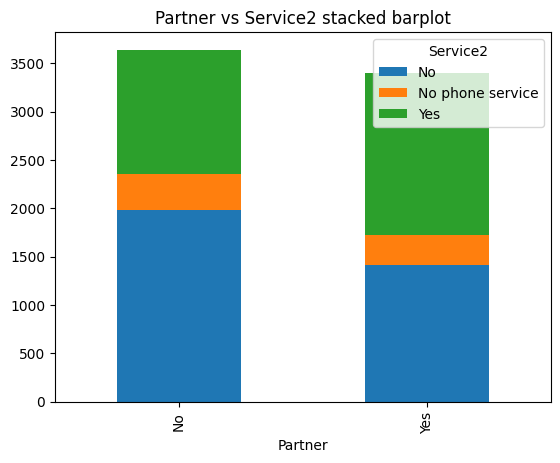

In [353]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

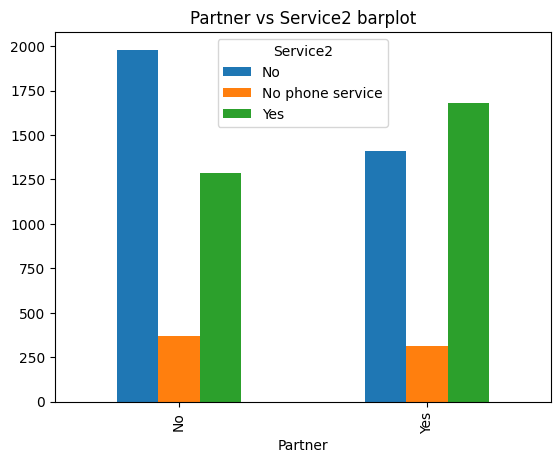

In [354]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs 'OnlineBackup'**

In [355]:
column_1 = "Partner"
column_2 = "OnlineBackup"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

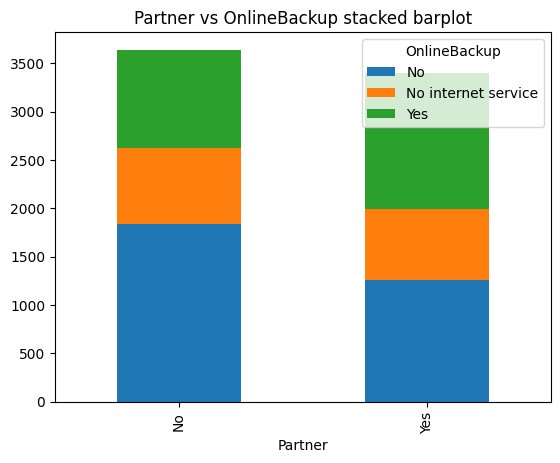

In [356]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

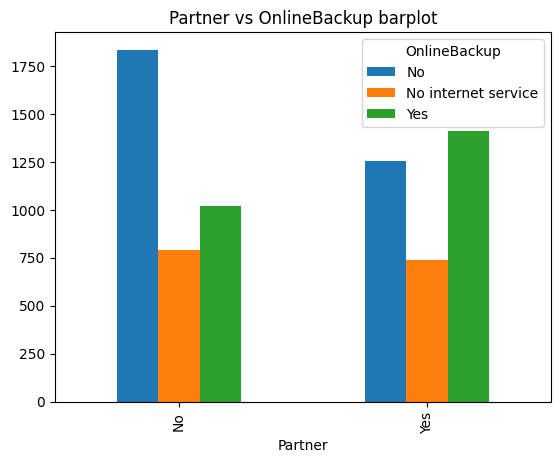

In [357]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs DeviceProtection**

In [358]:
column_1 = "Partner"
column_2 = "DeviceProtection"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

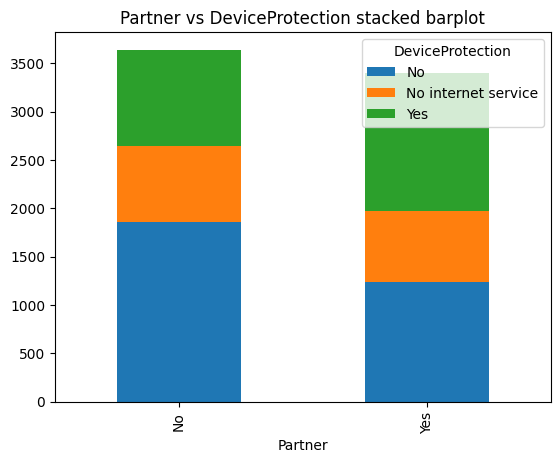

In [359]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

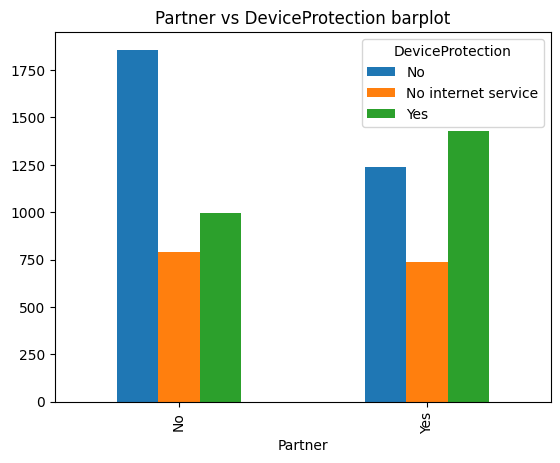

In [360]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs TechSupport**

In [361]:
column_1 = "Partner"
column_2 = "TechSupport"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

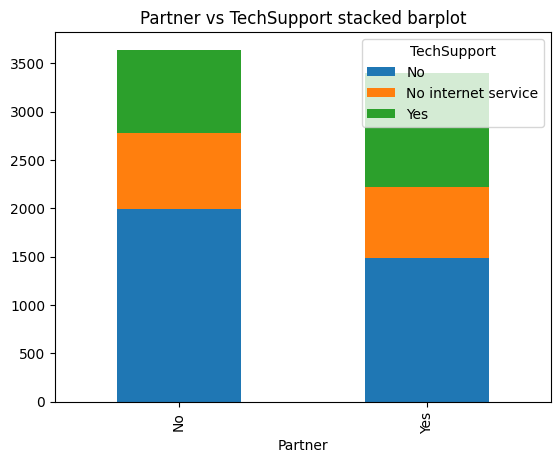

In [362]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

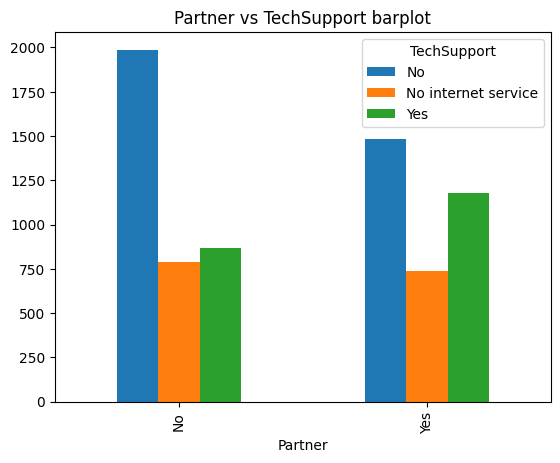

In [363]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs Security**

In [364]:
column_1 = "Partner"
column_2 = "Security"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

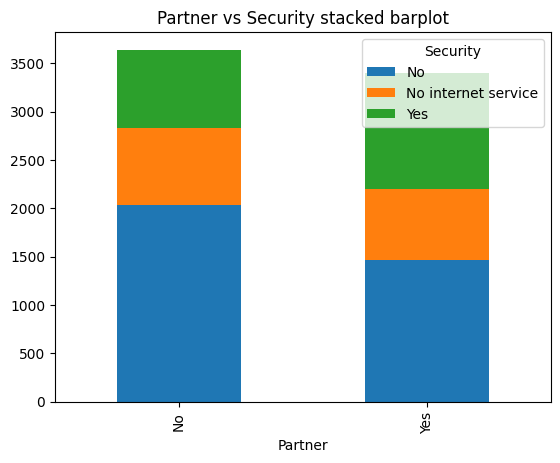

In [365]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

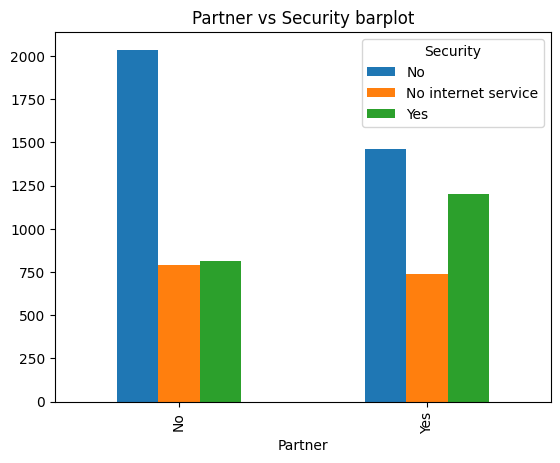

In [366]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs Contract**

In [367]:
column_1 = "Partner"
column_2 = "Contract"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

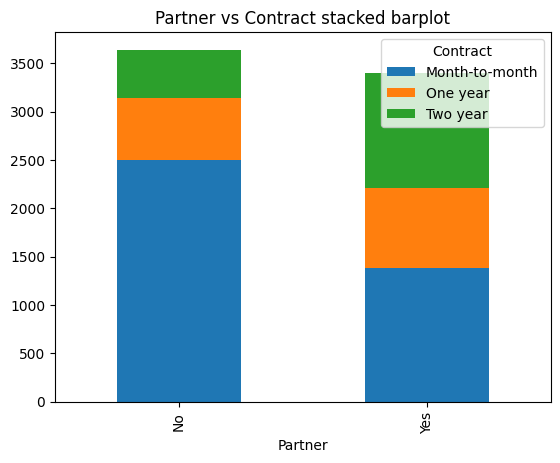

In [368]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

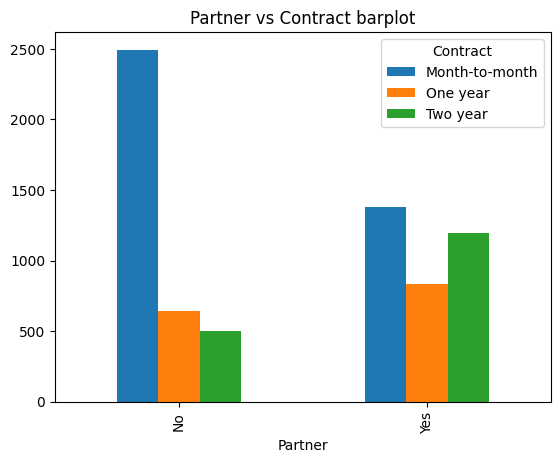

In [369]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

**Partner vs PaymentMethod**

In [370]:
column_1 = "Partner"
column_2 = "PaymentMethod"

(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)


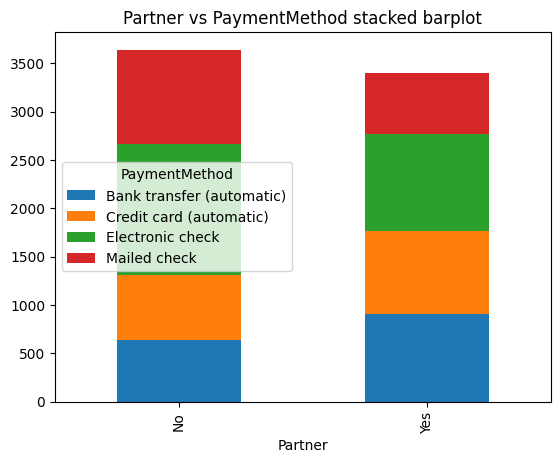

In [371]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

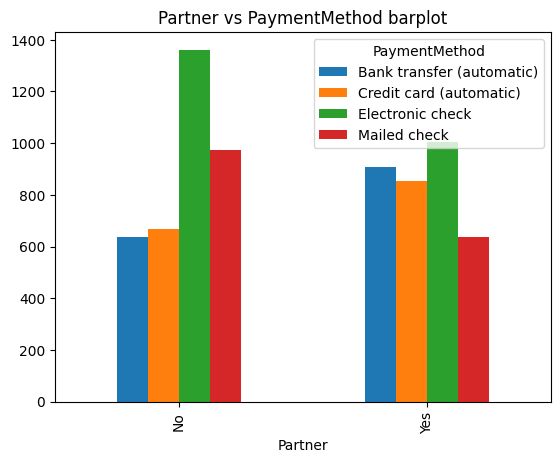

In [372]:
(
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

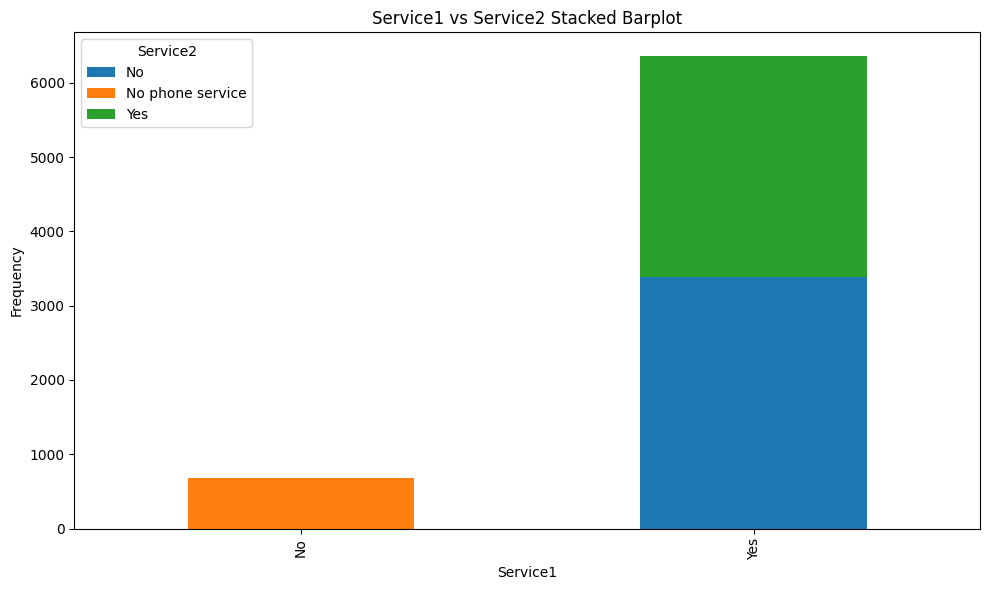

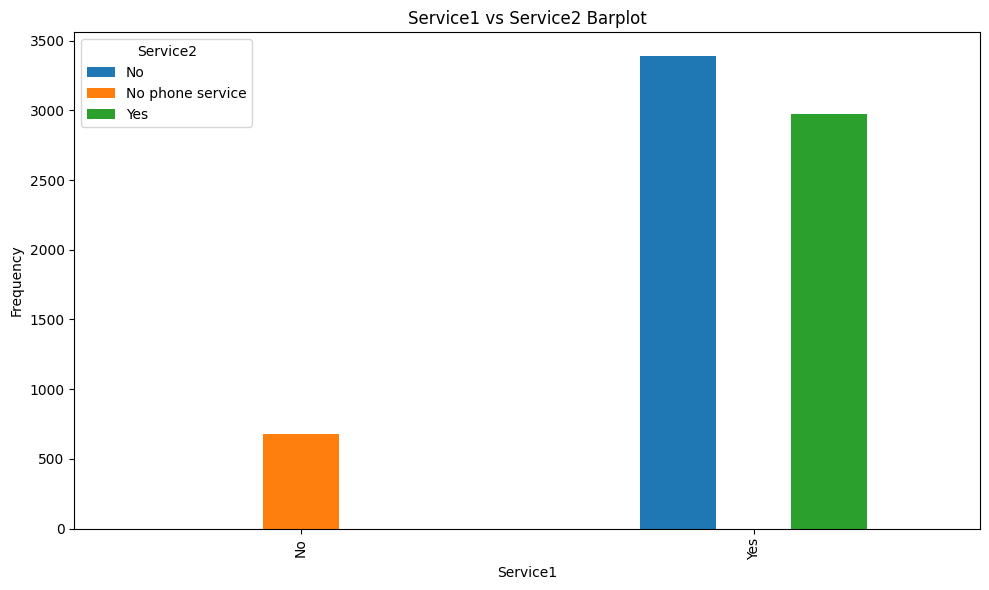

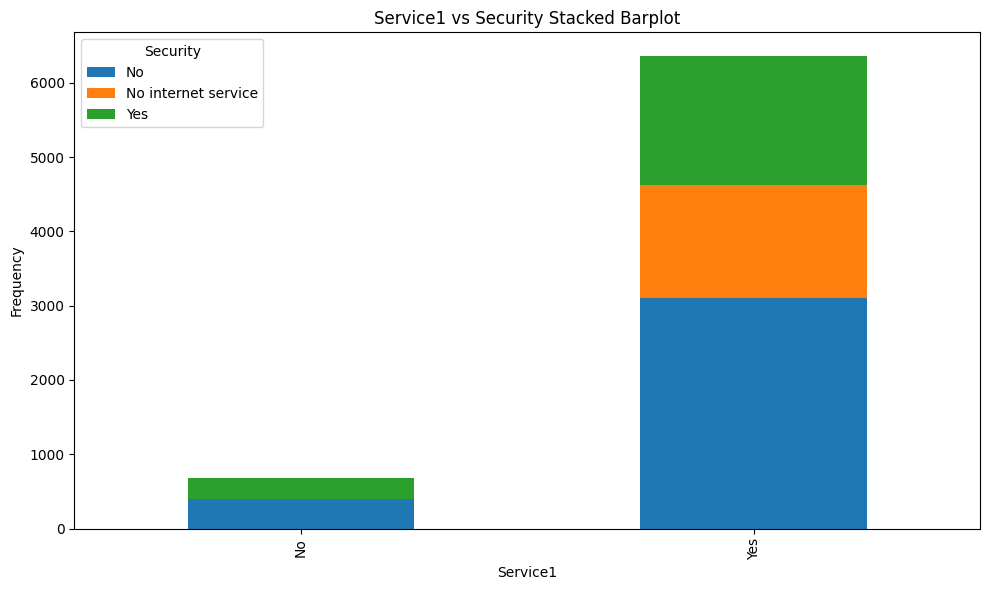

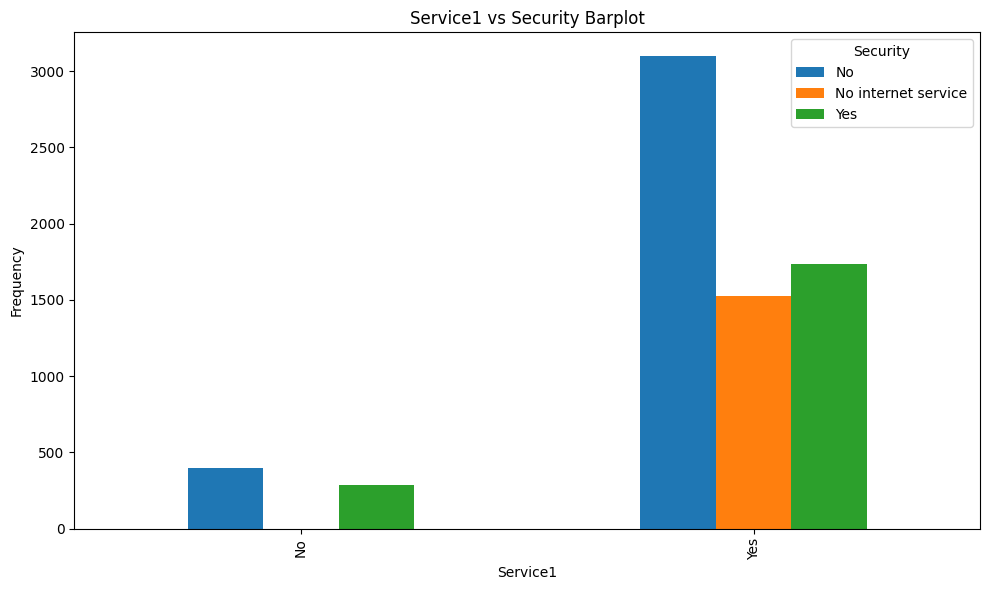

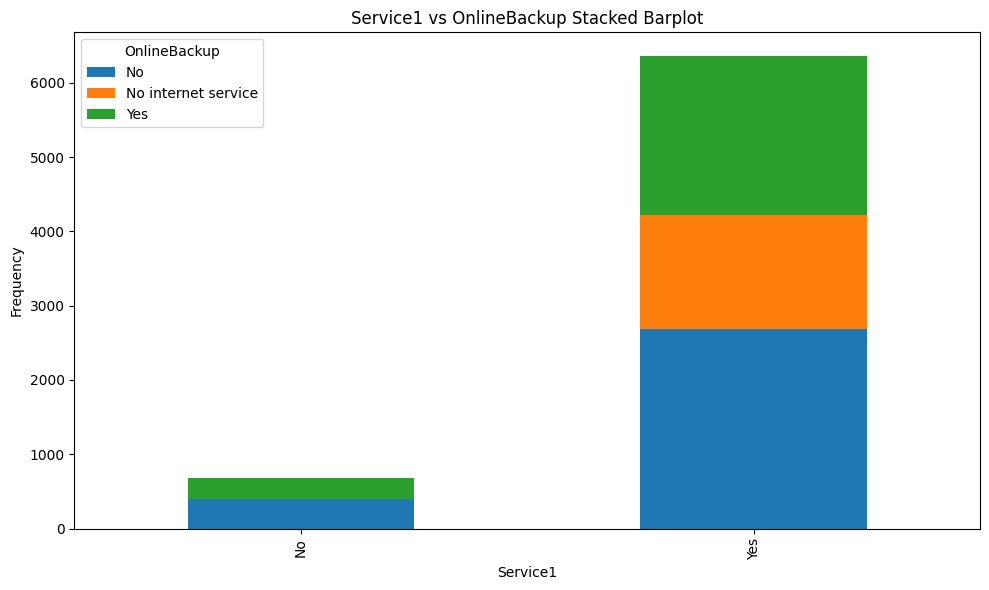

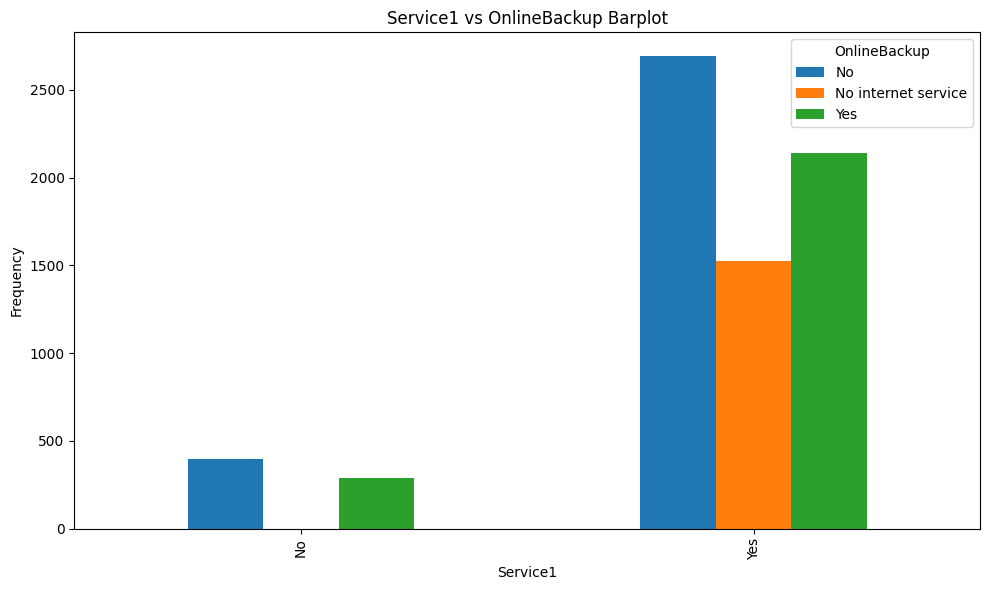

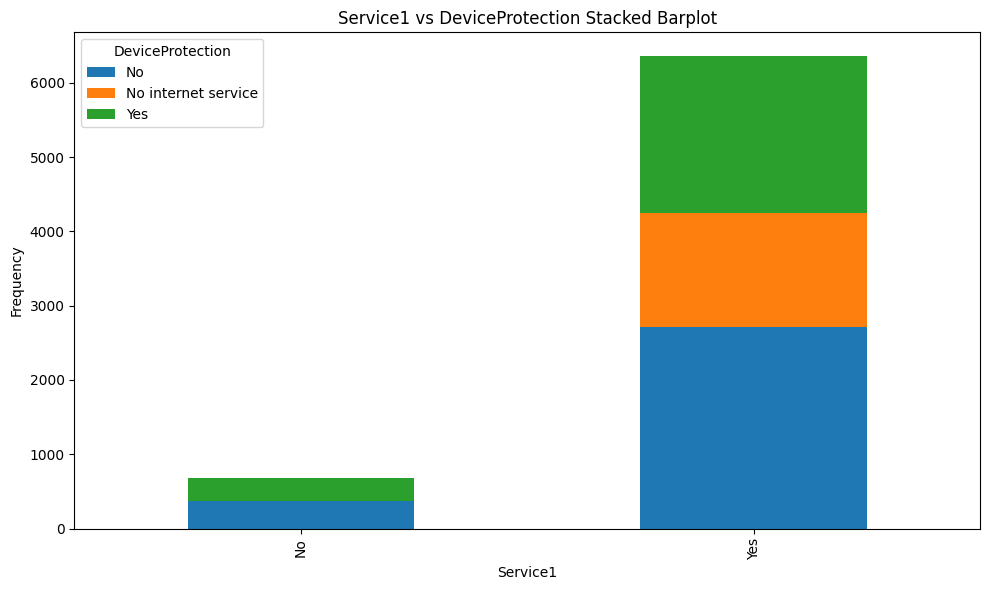

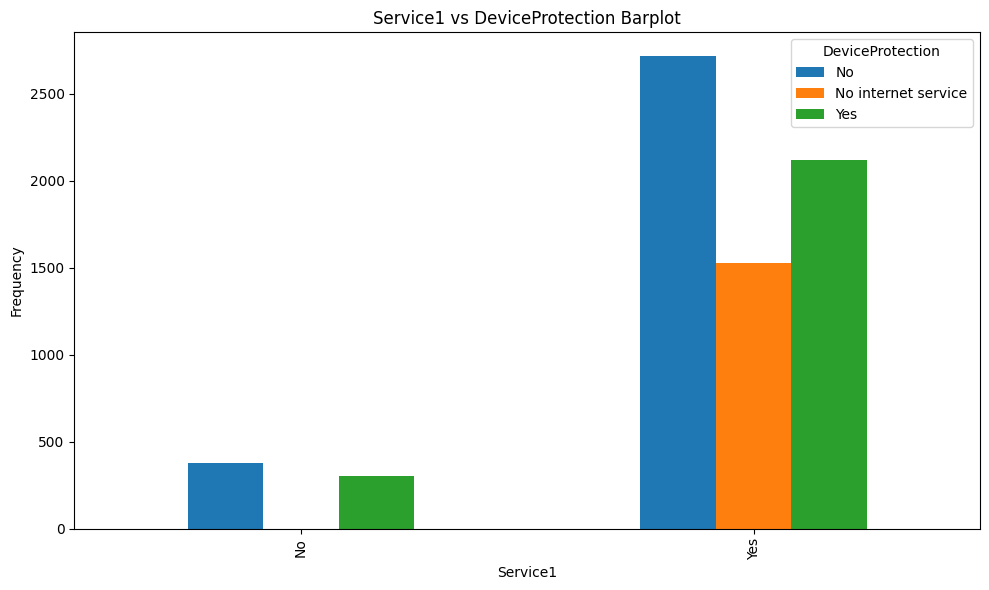

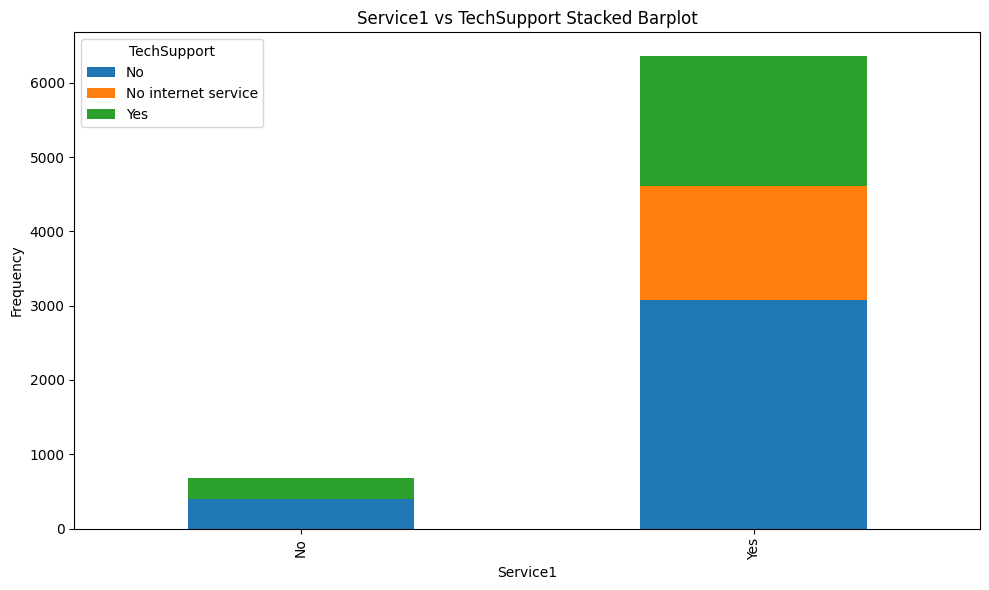

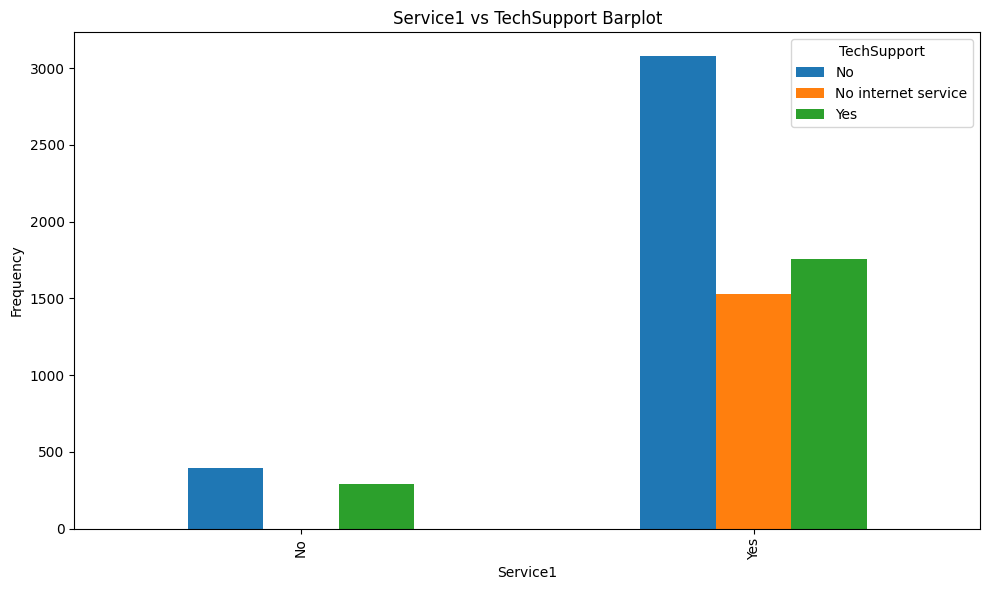

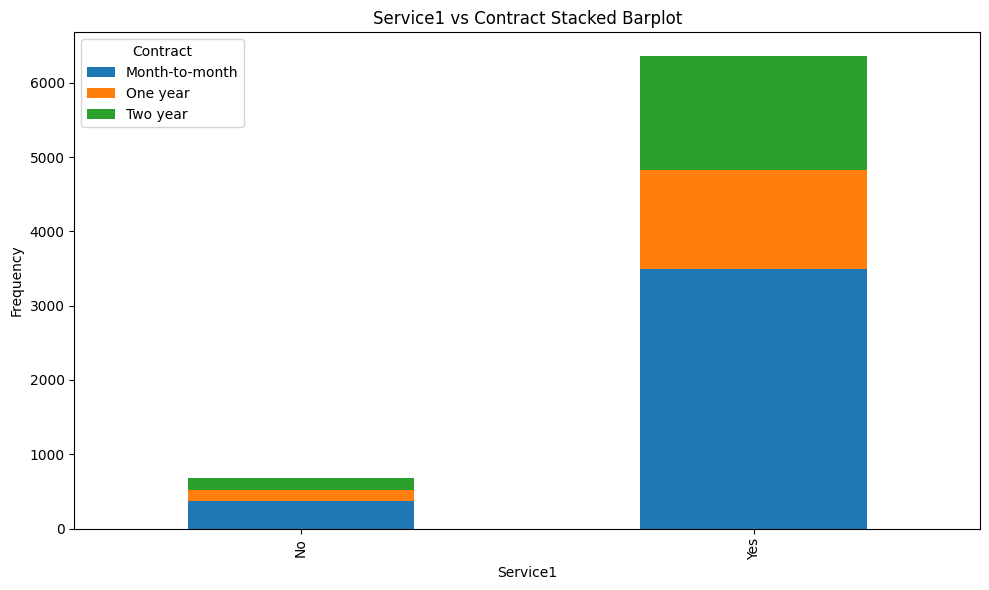

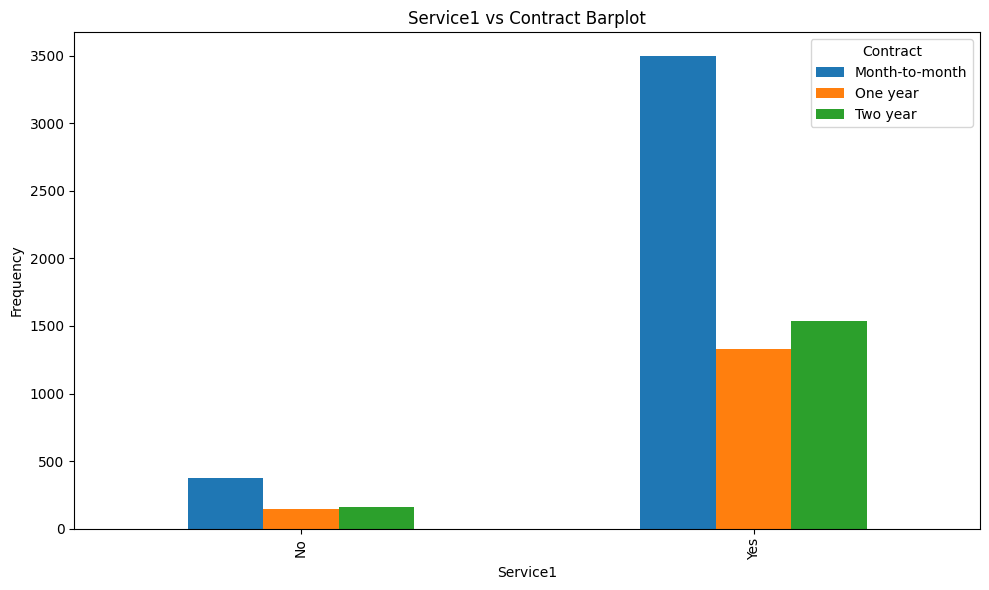

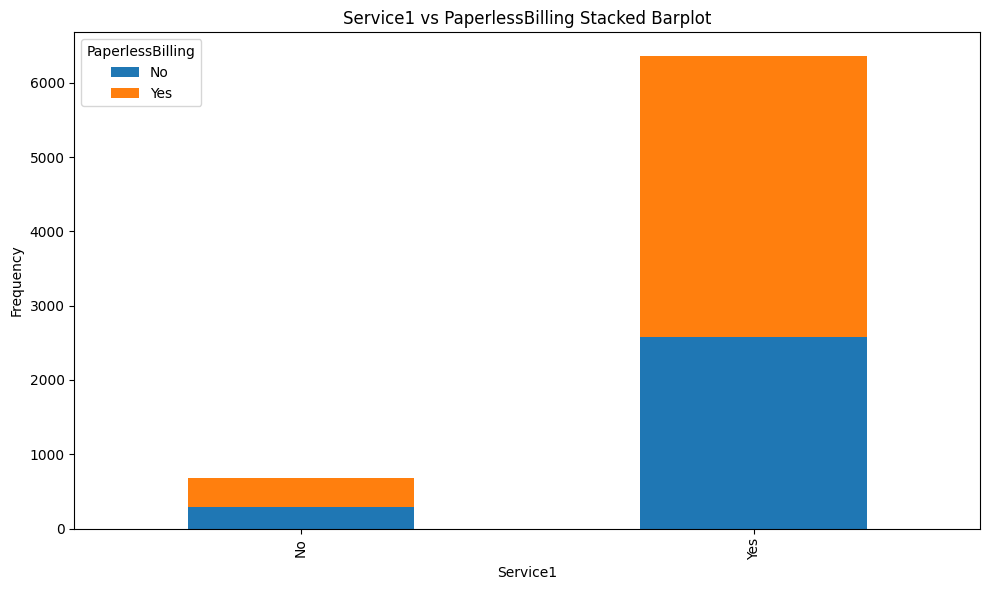

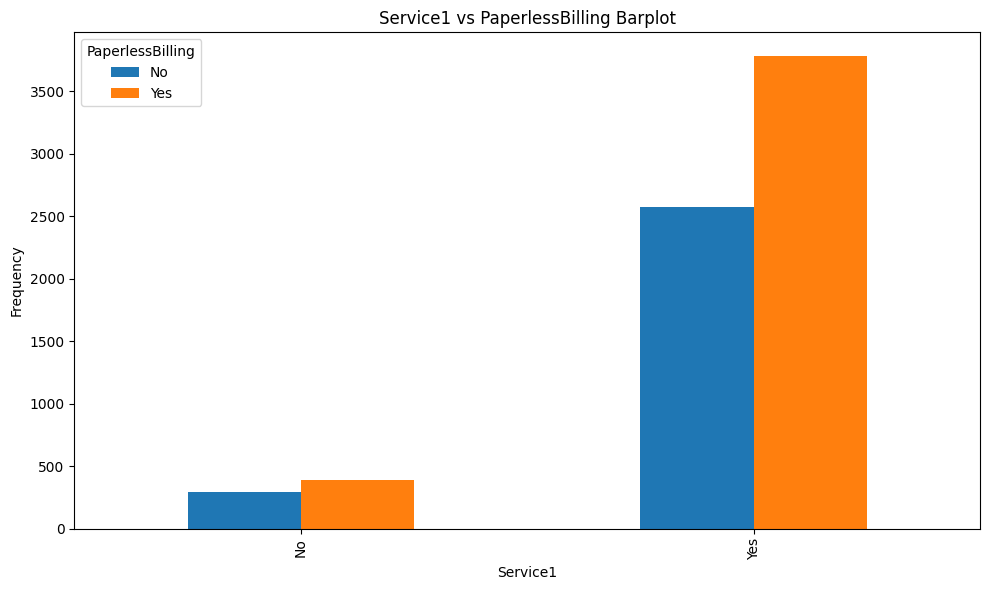

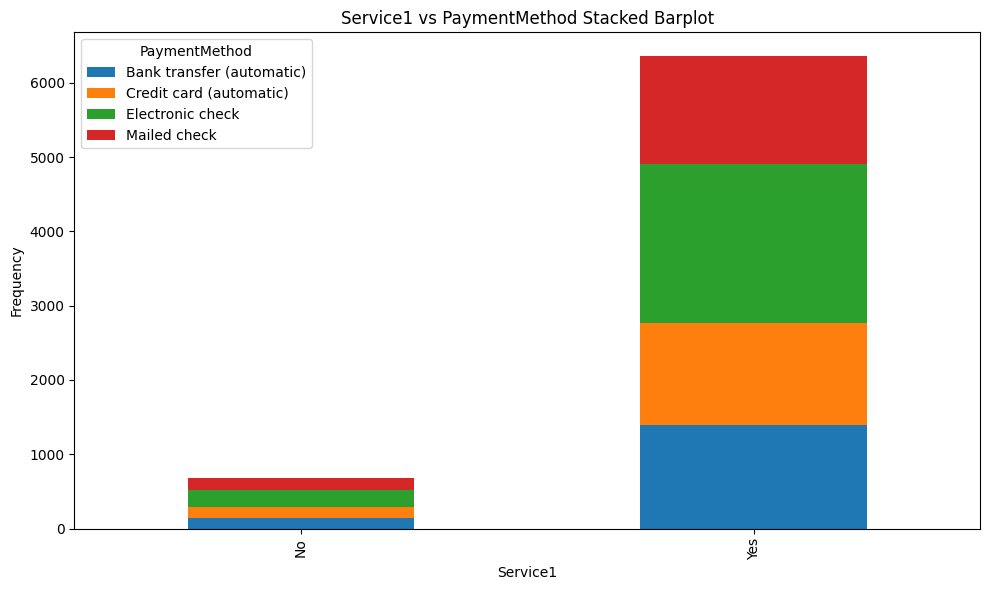

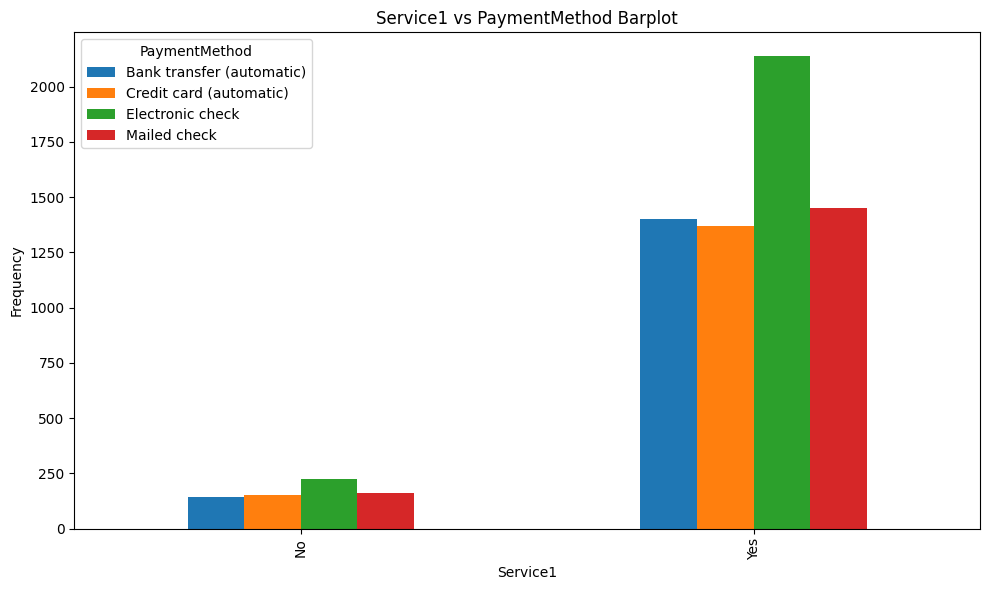

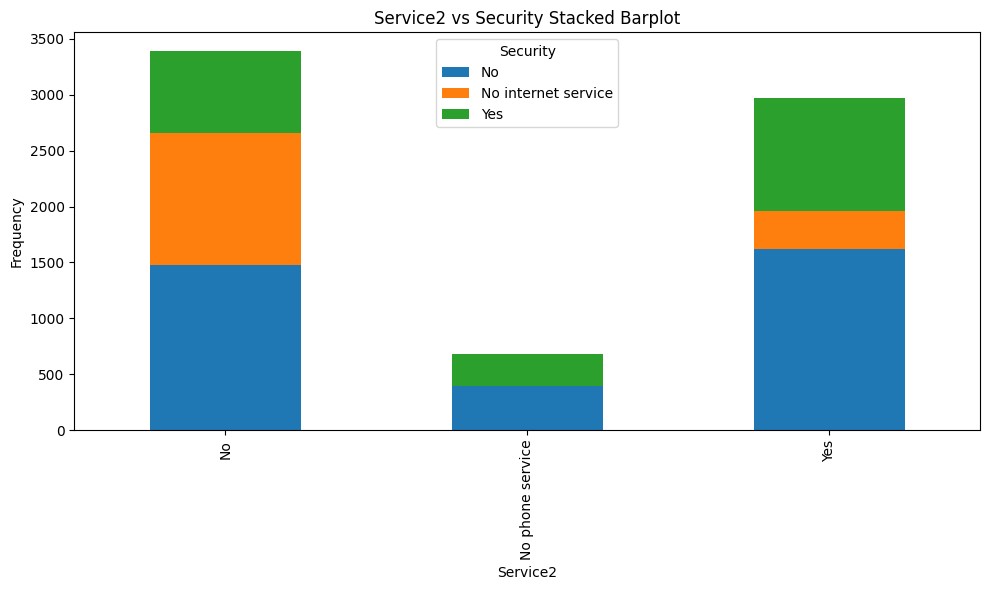

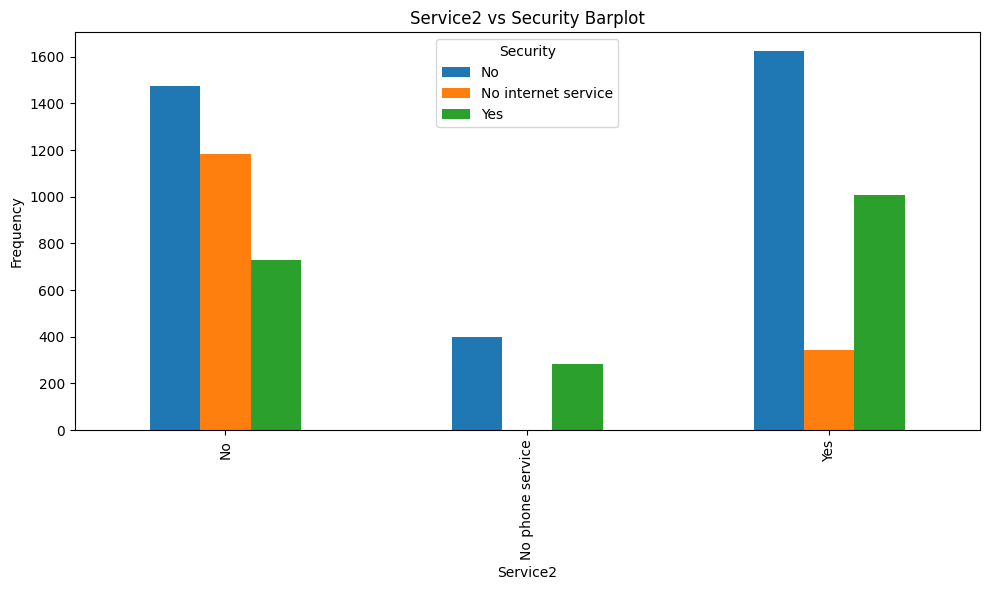

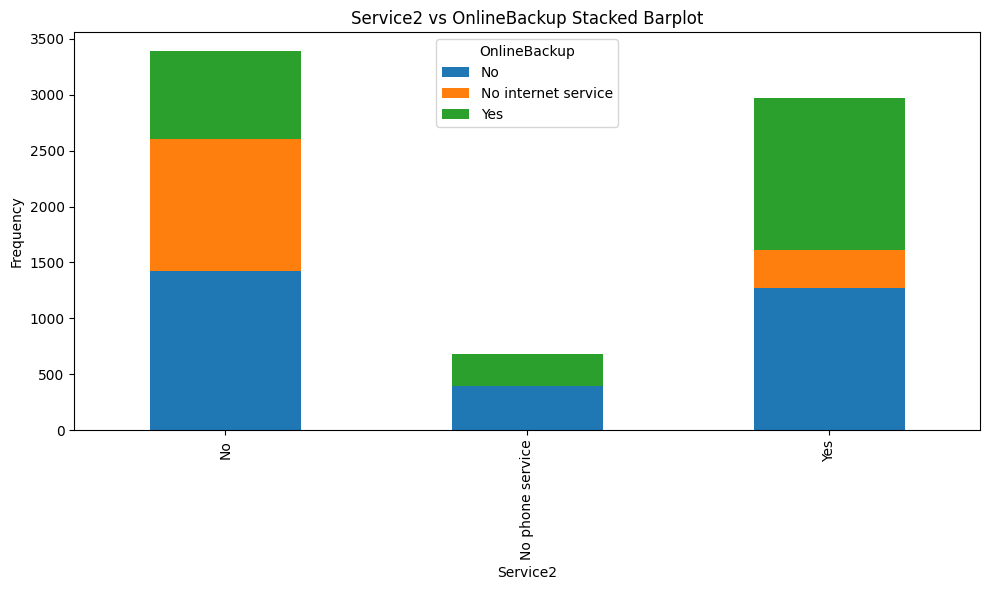

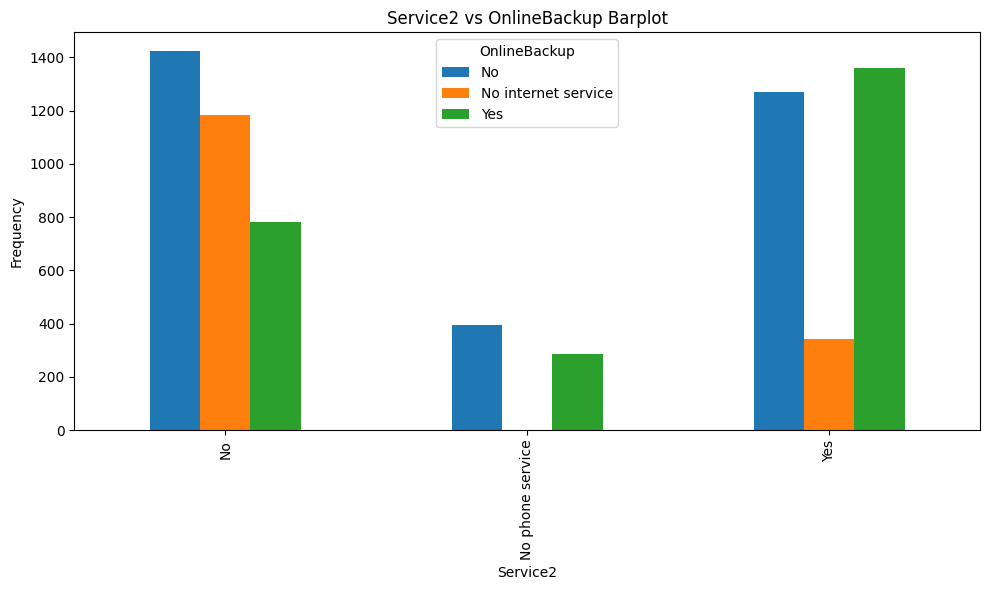

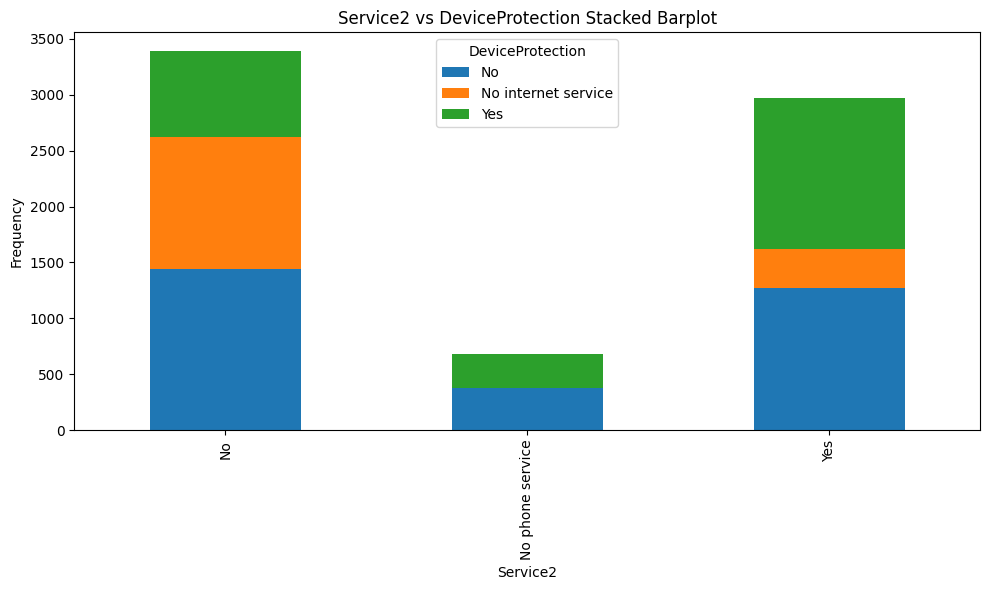

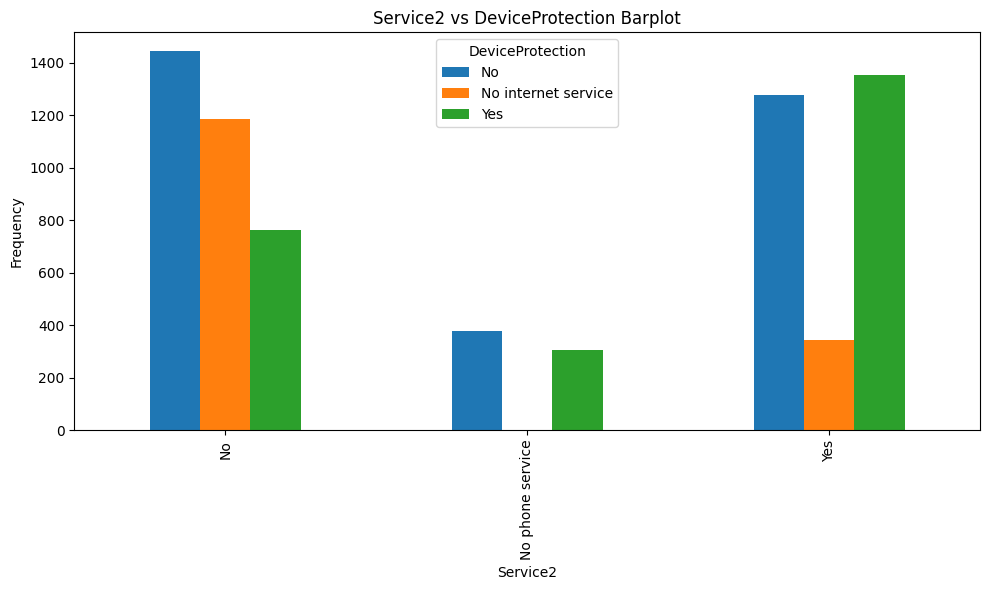

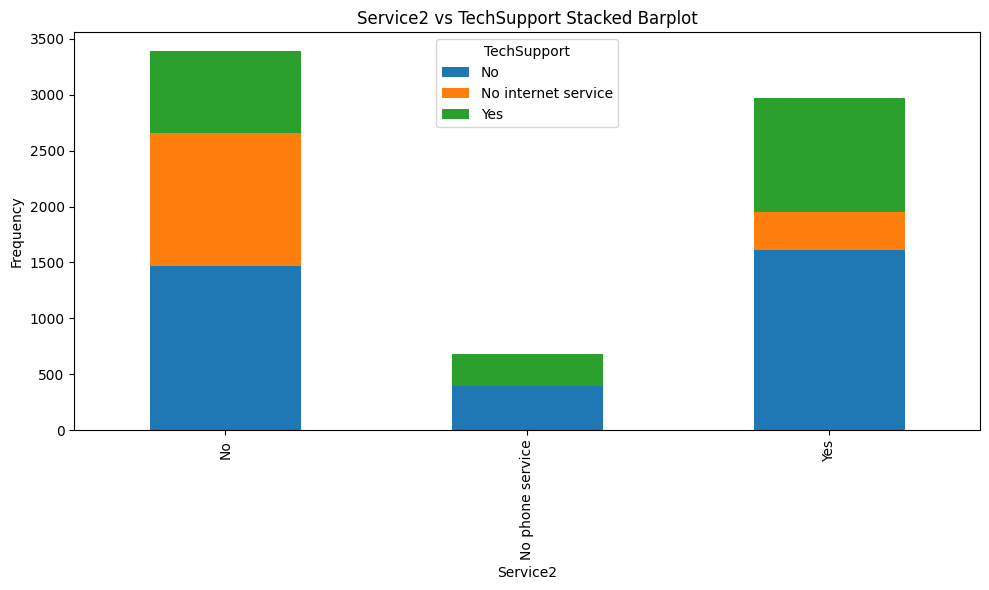

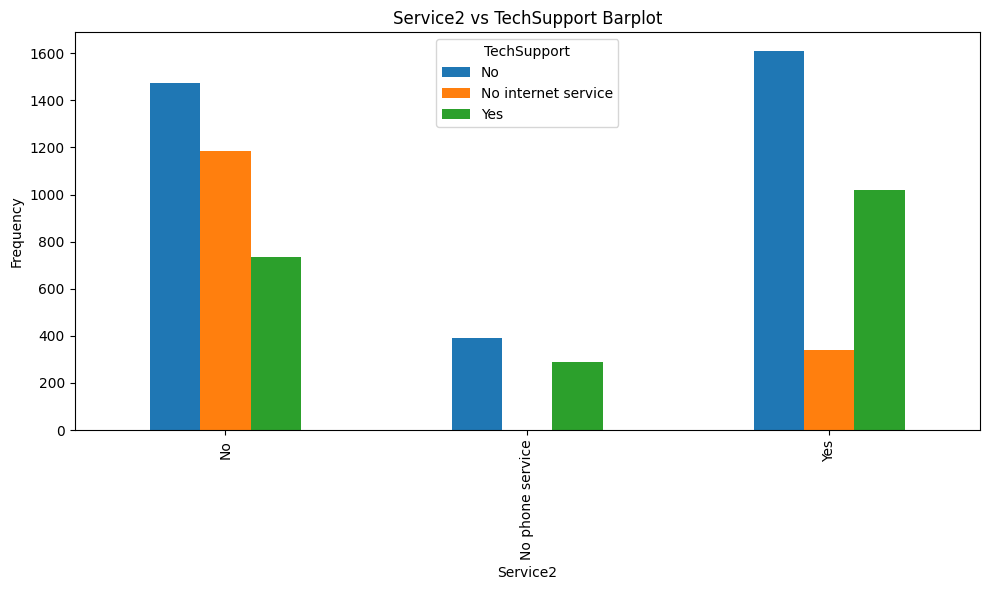

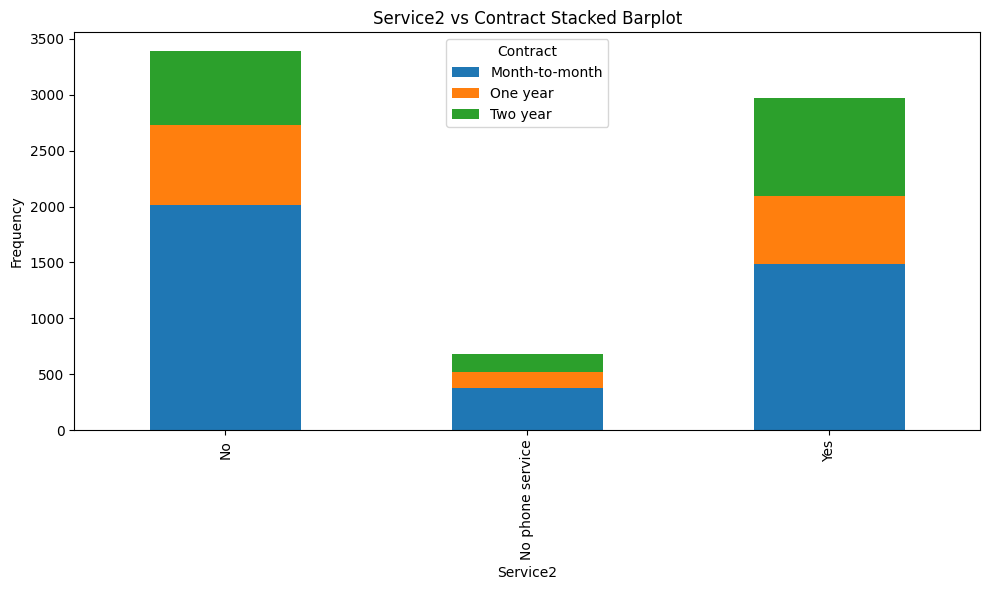

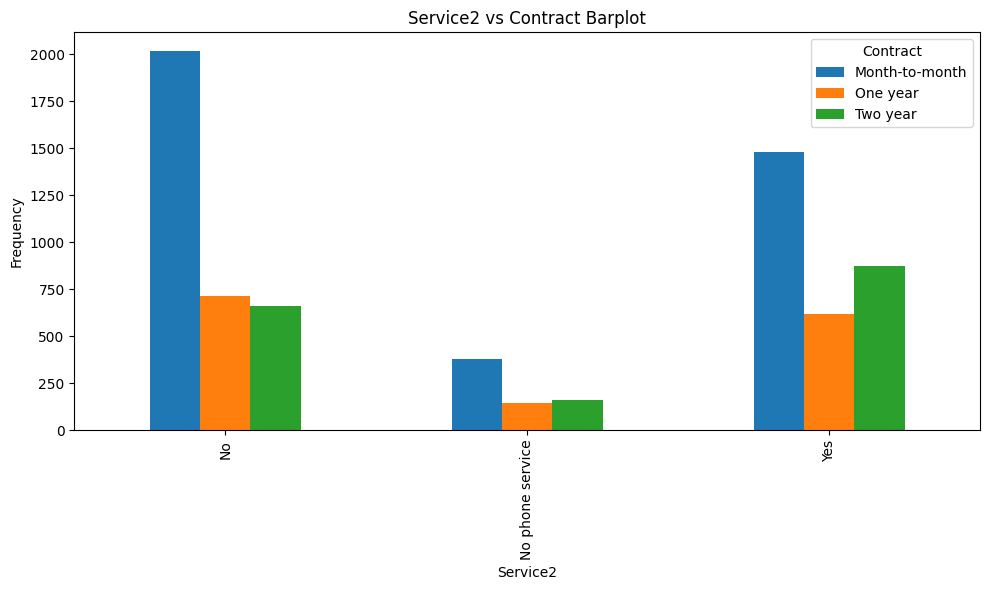

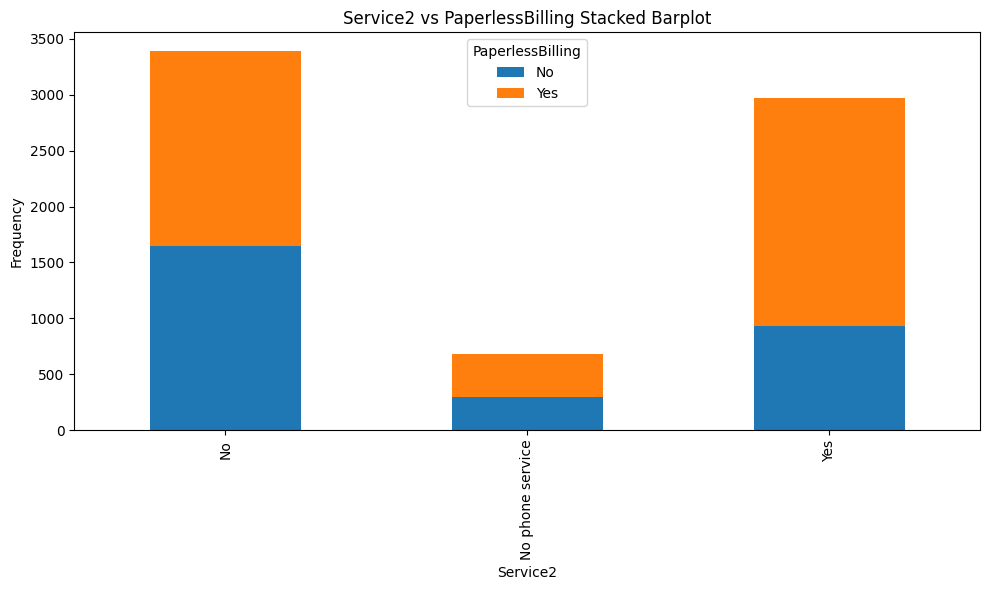

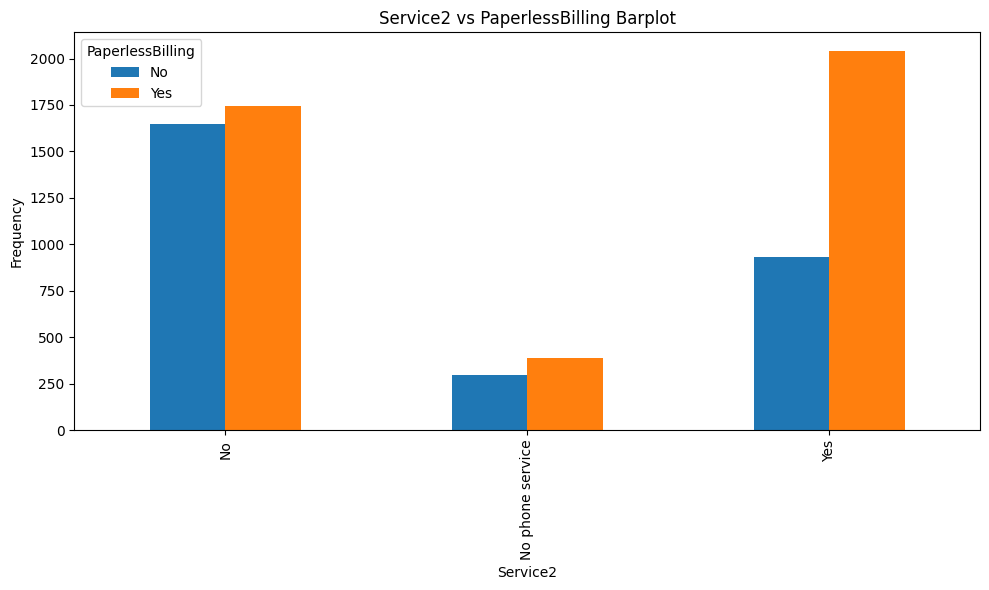

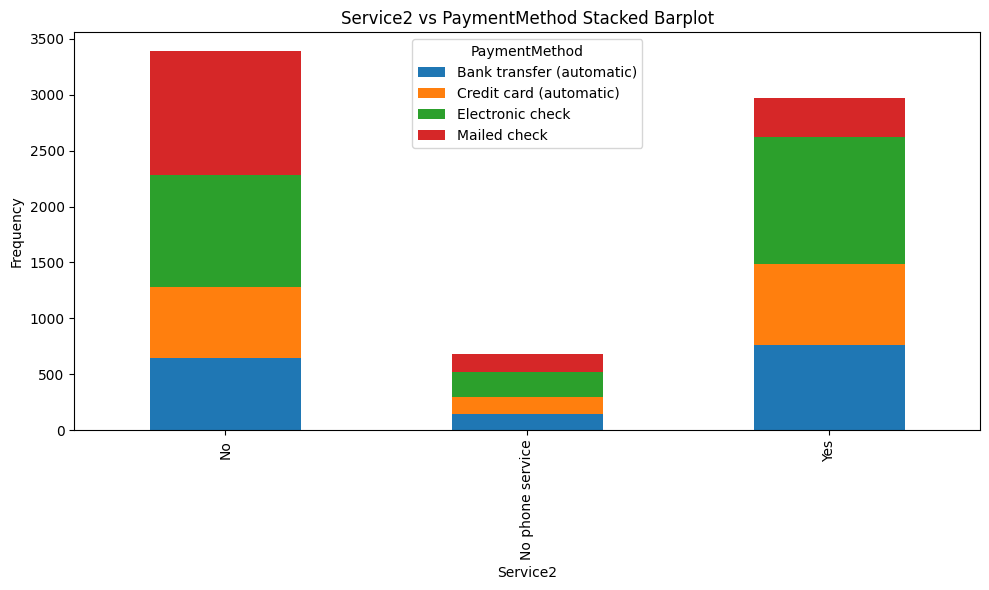

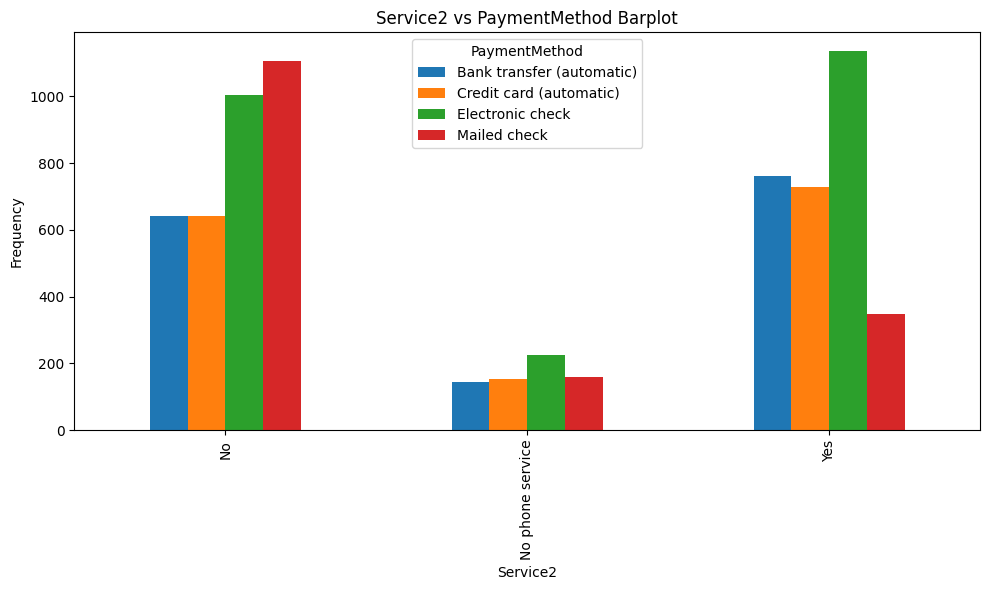

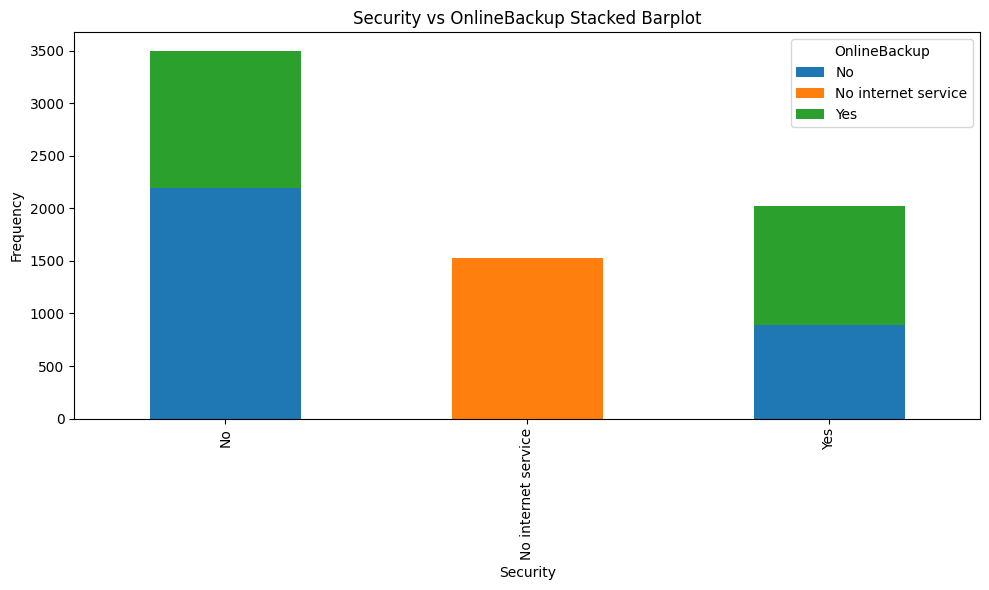

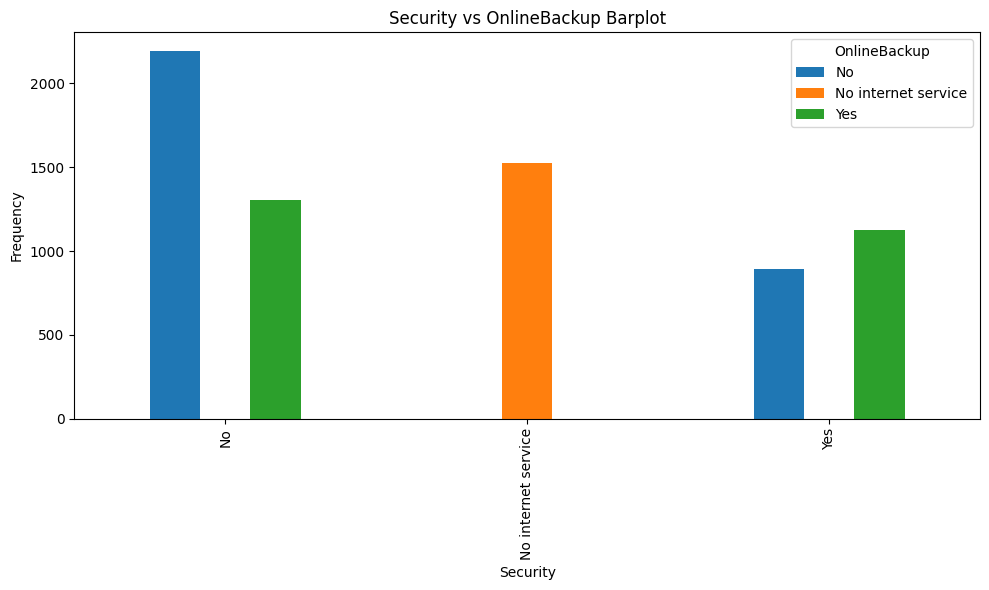

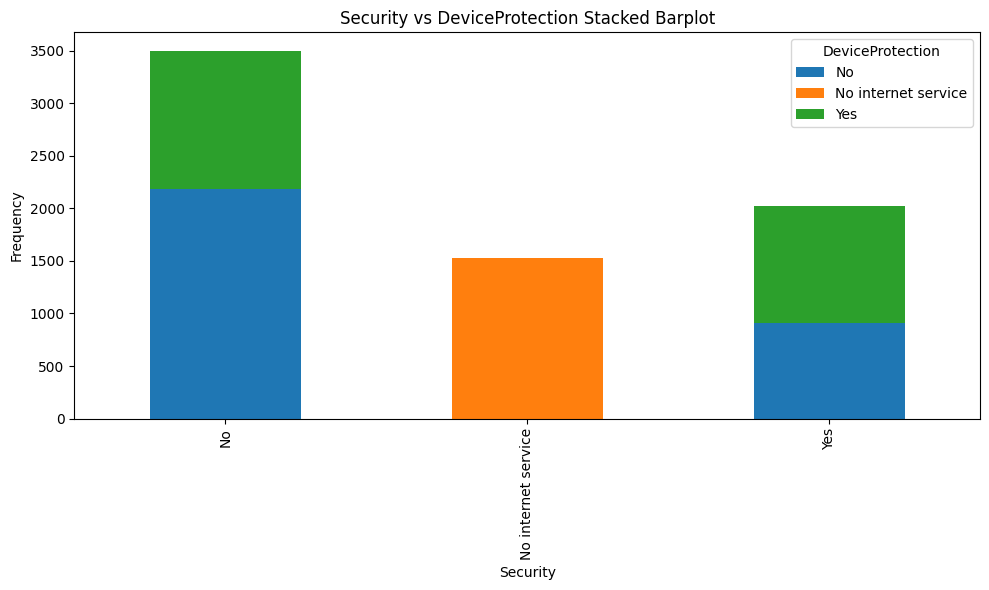

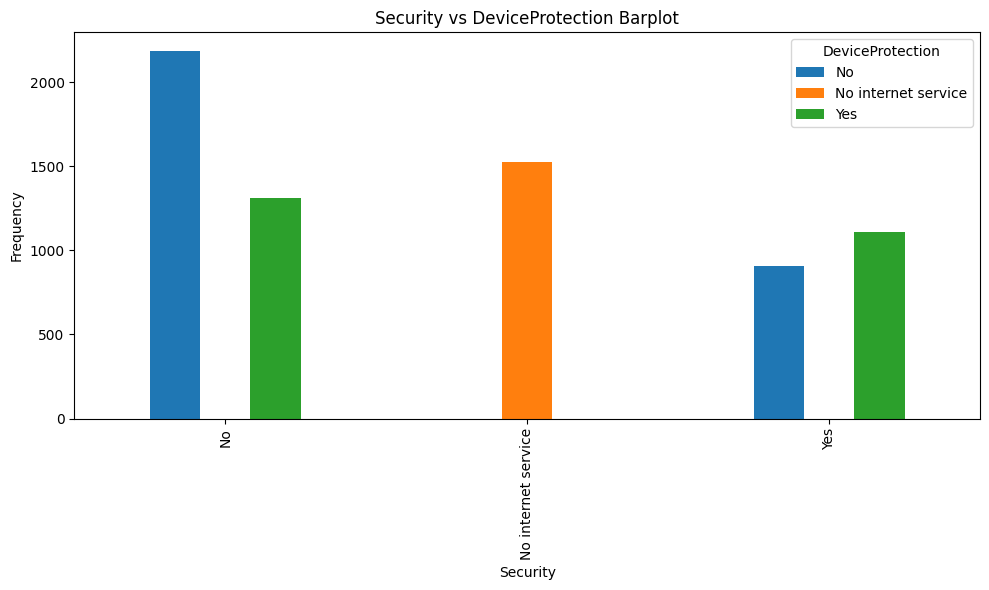

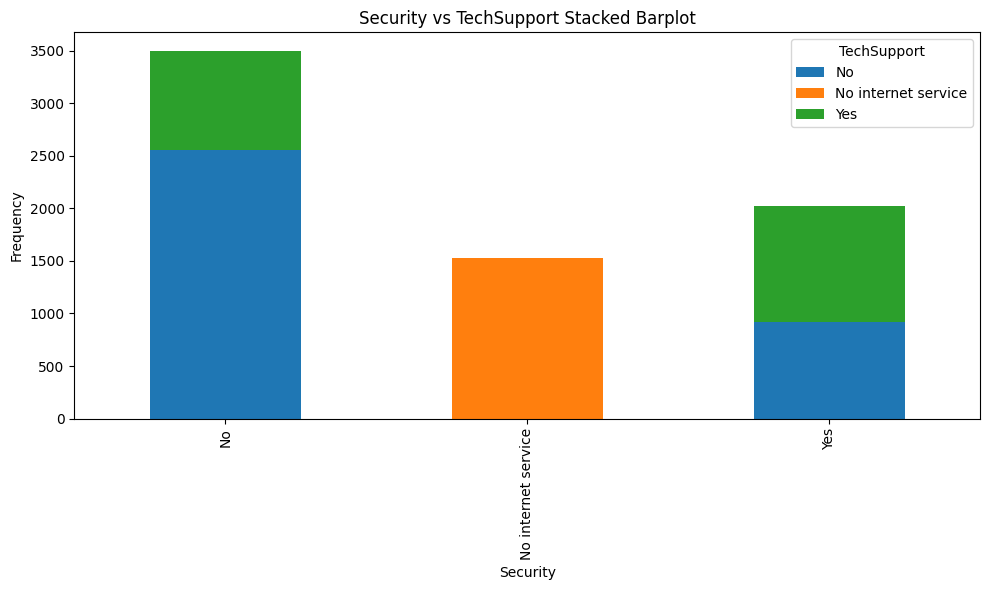

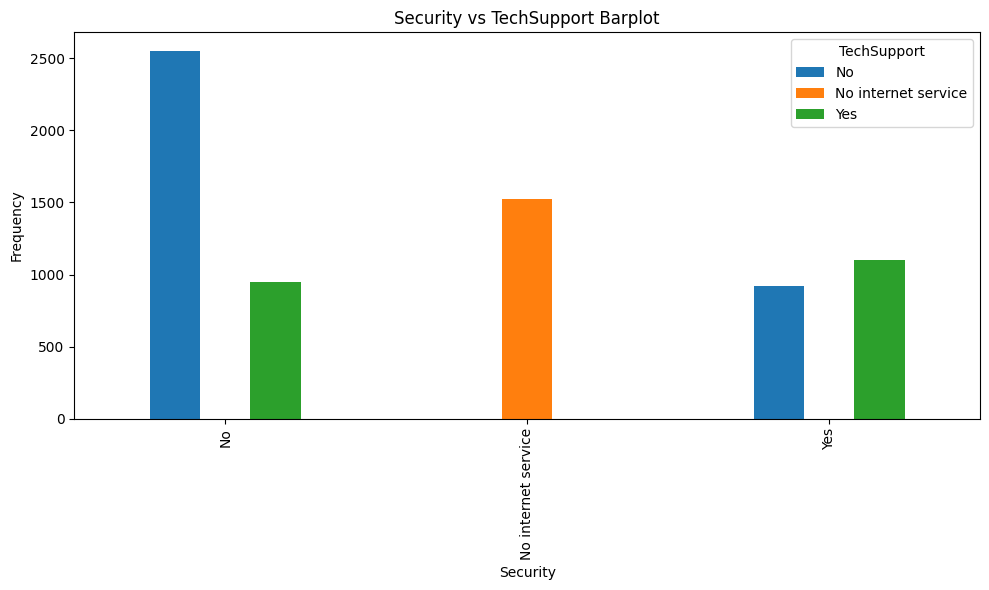

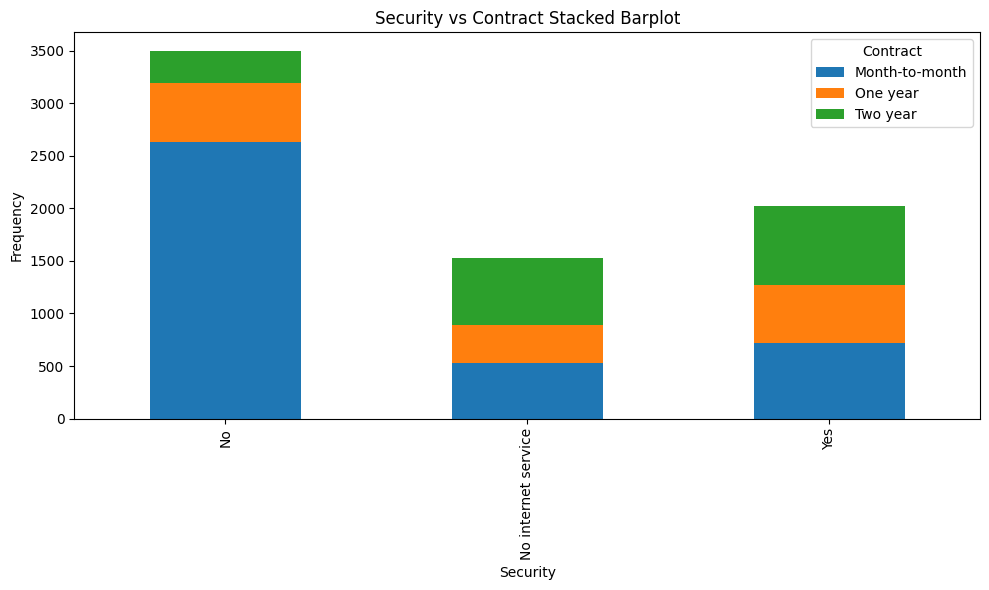

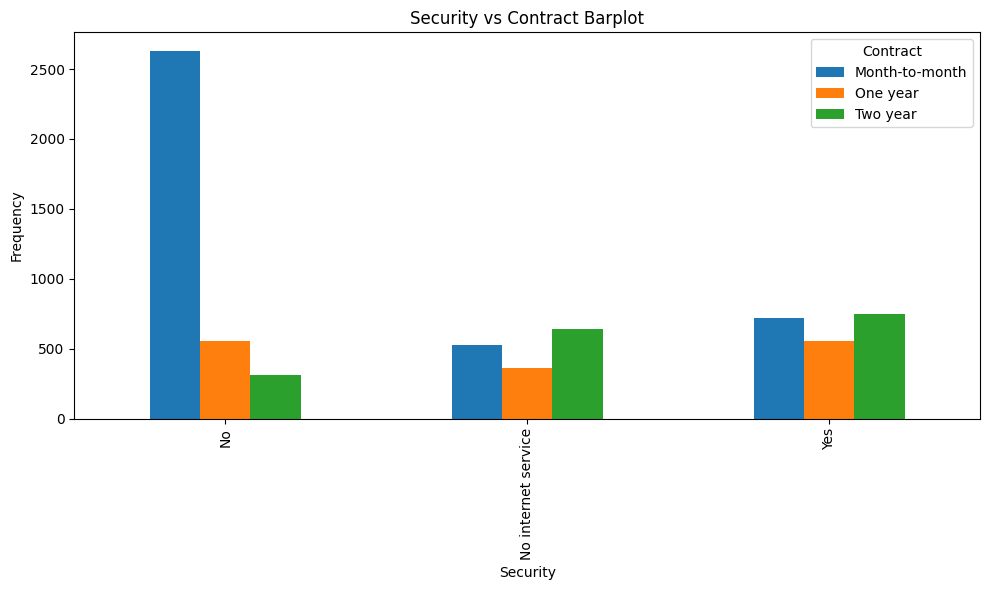

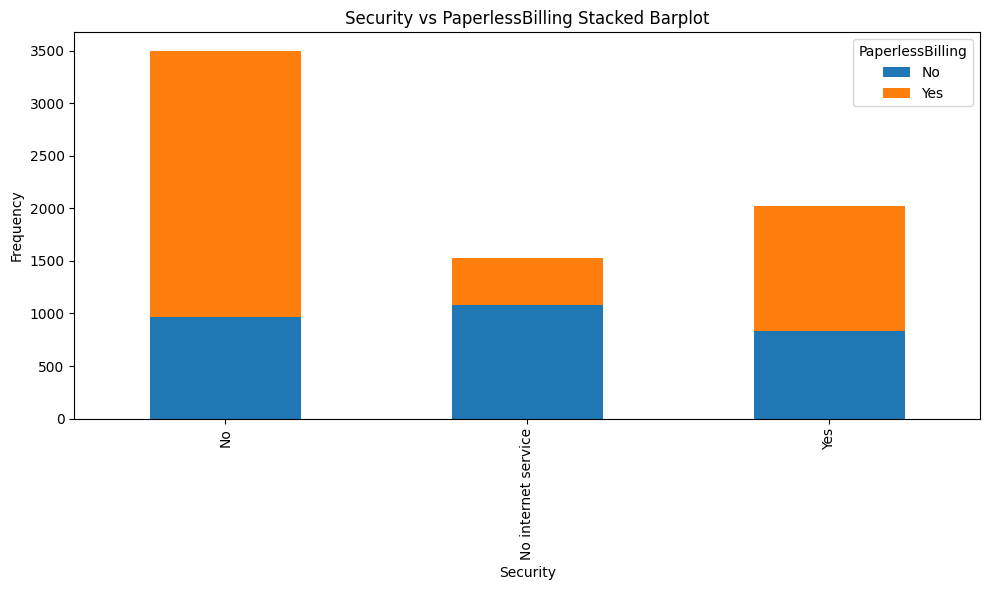

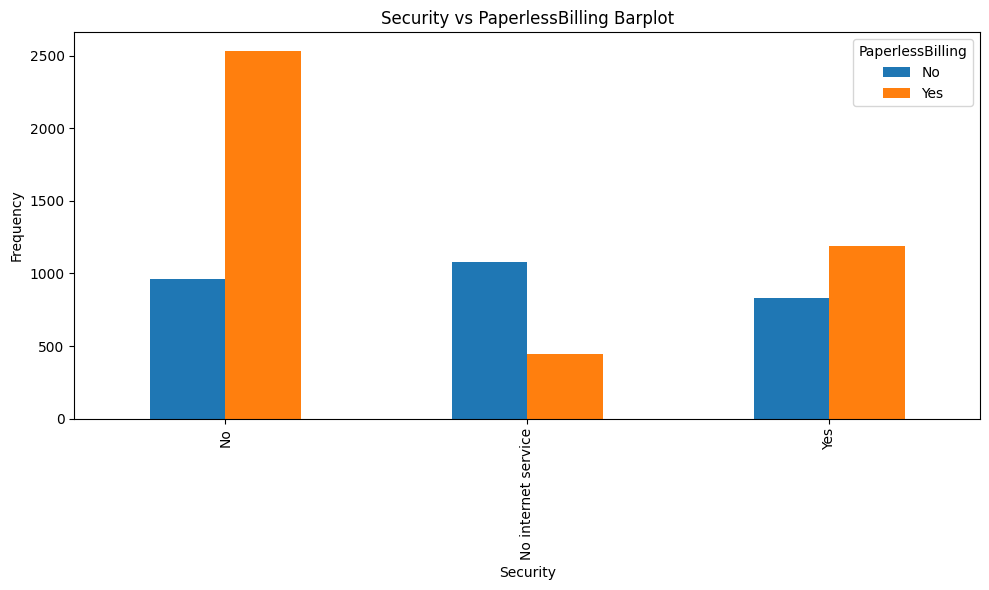

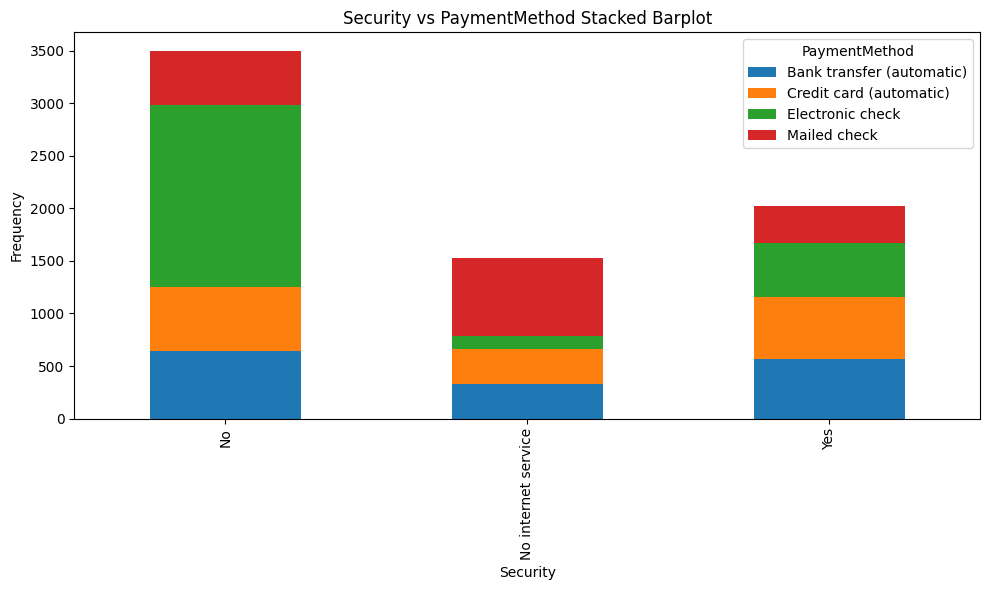

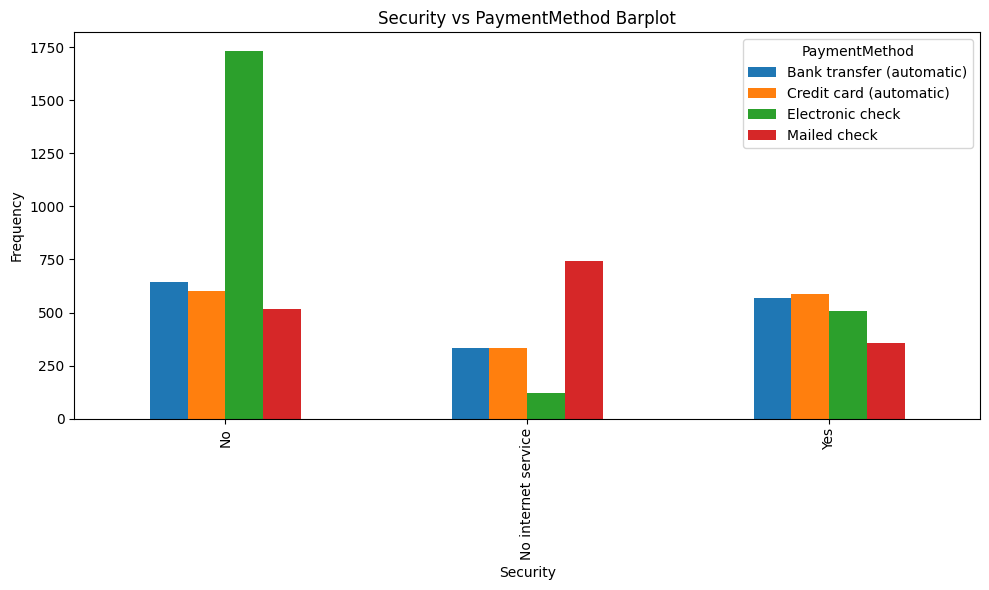

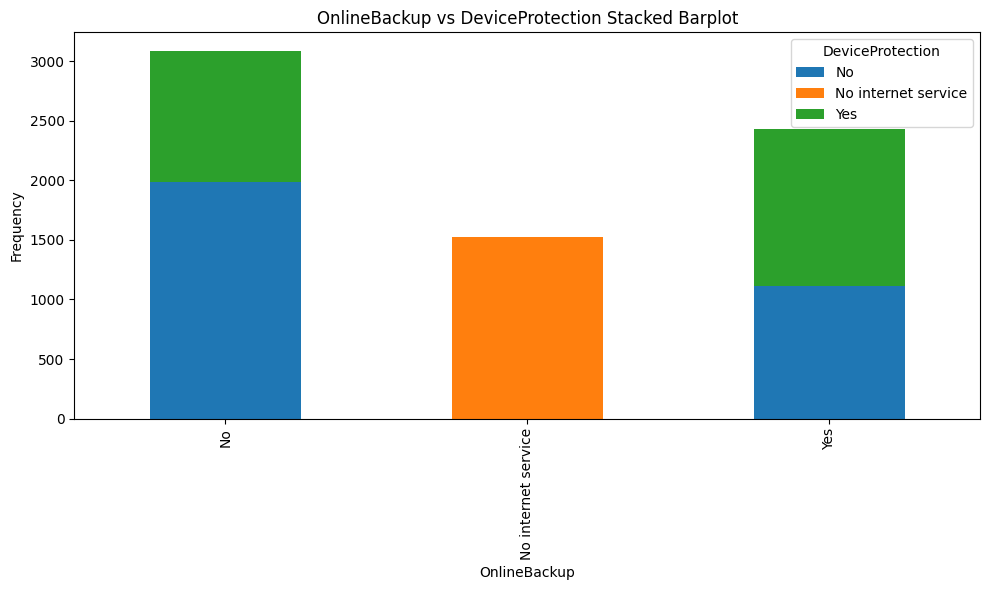

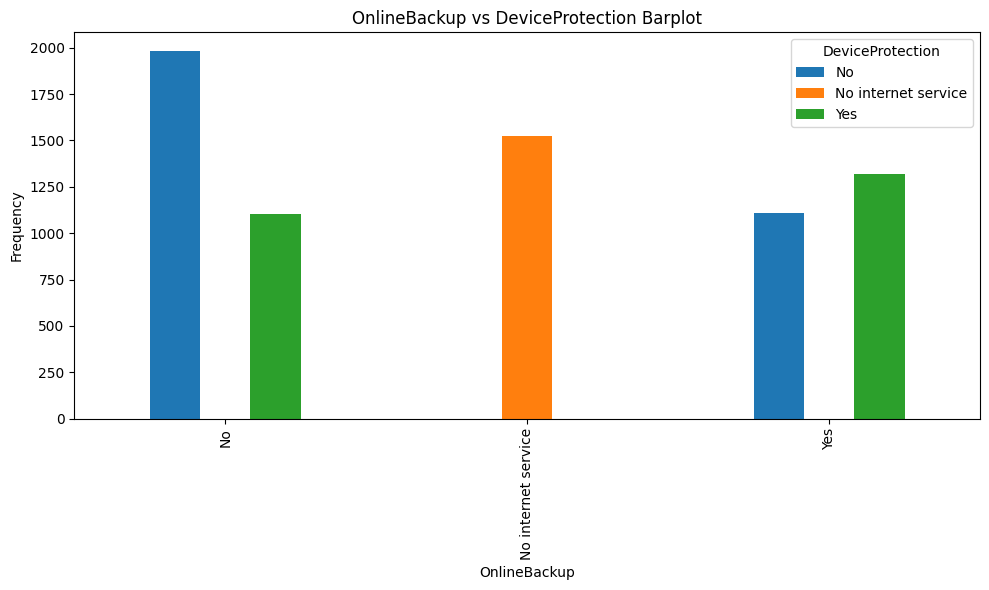

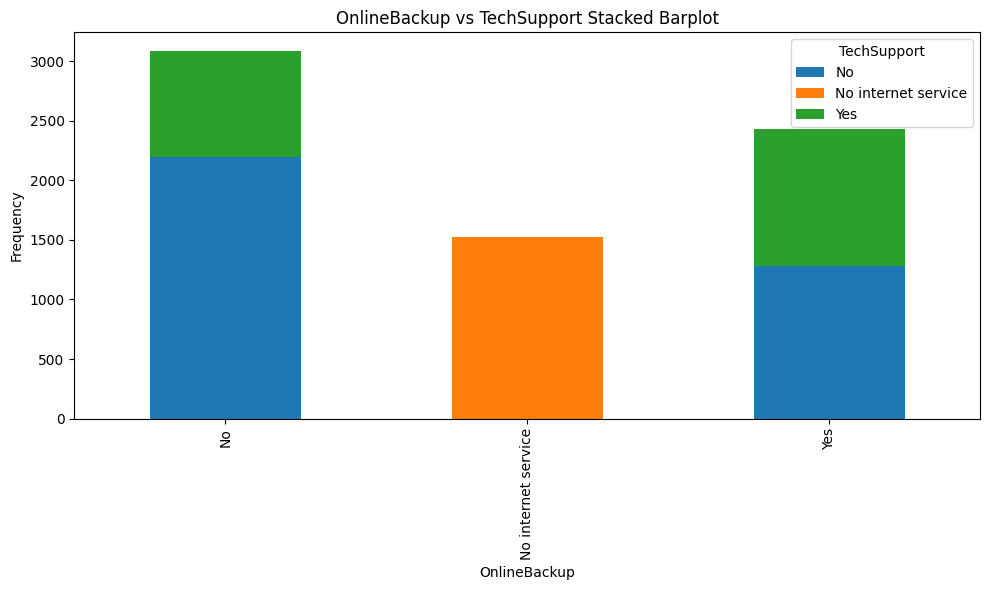

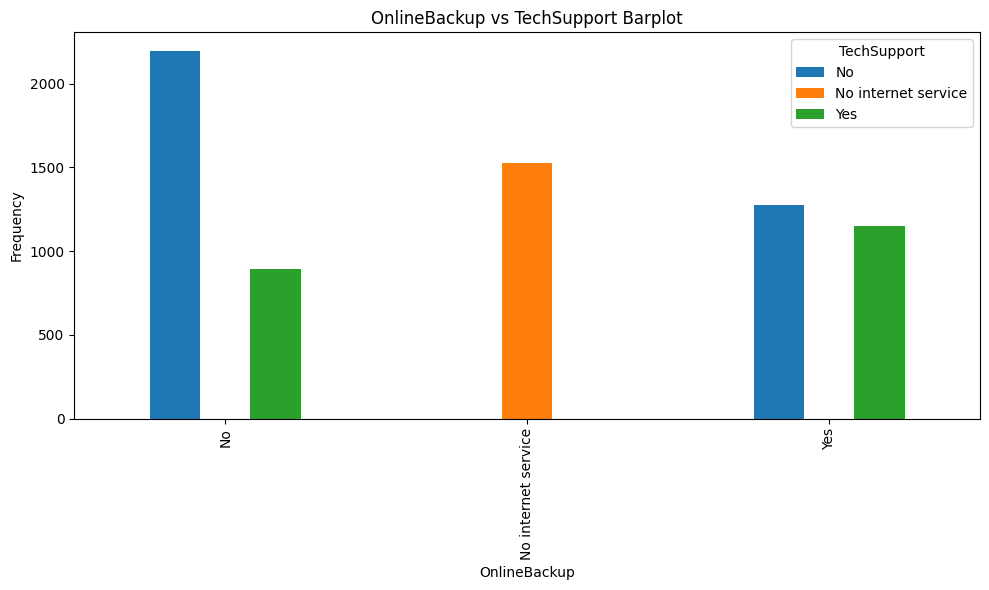

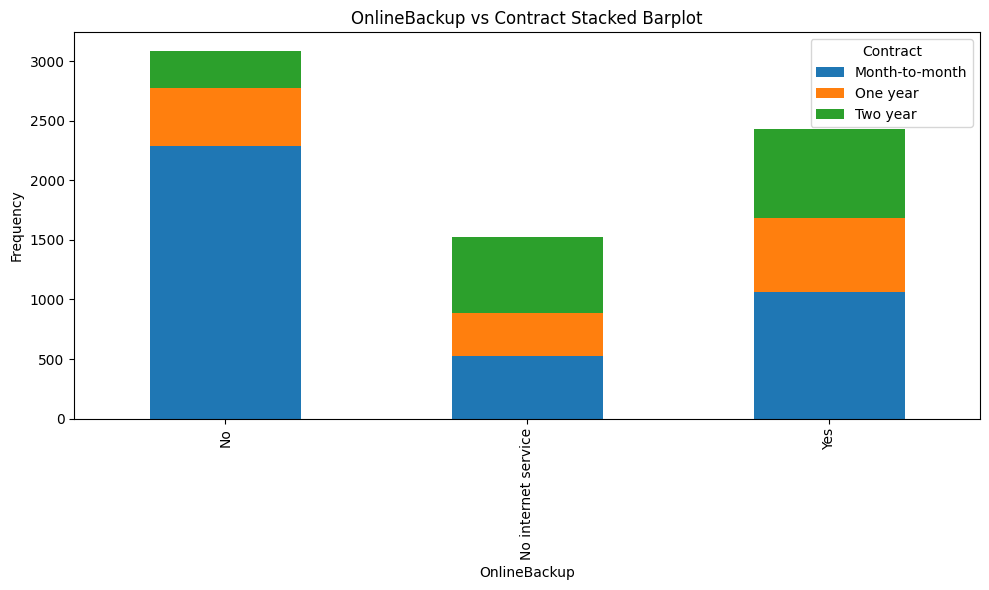

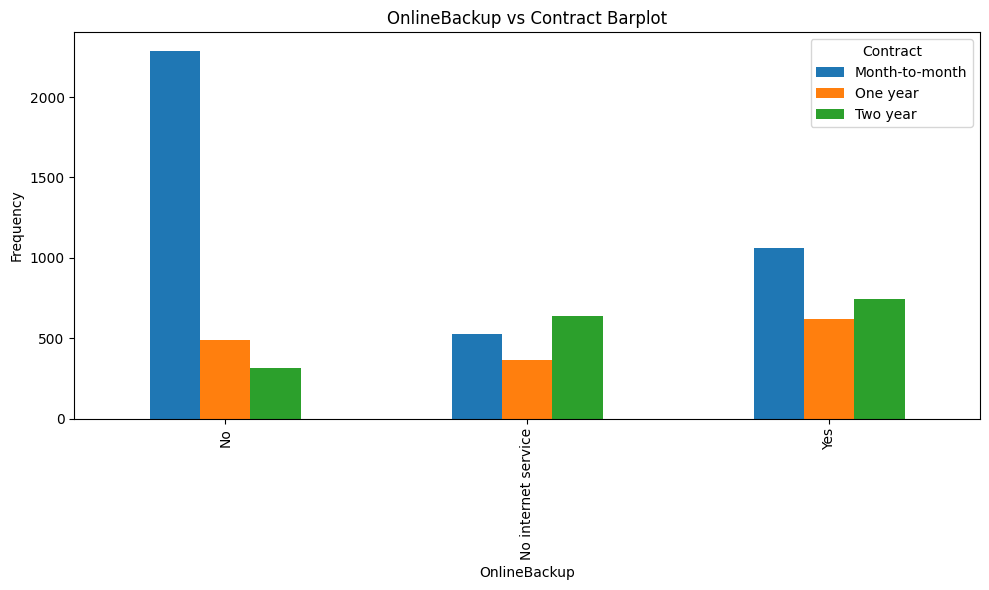

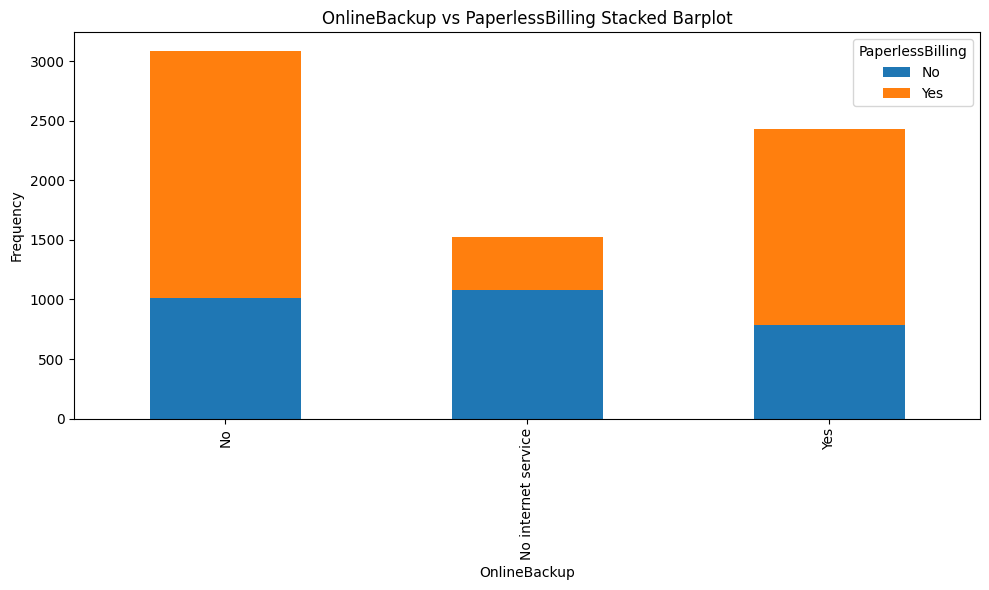

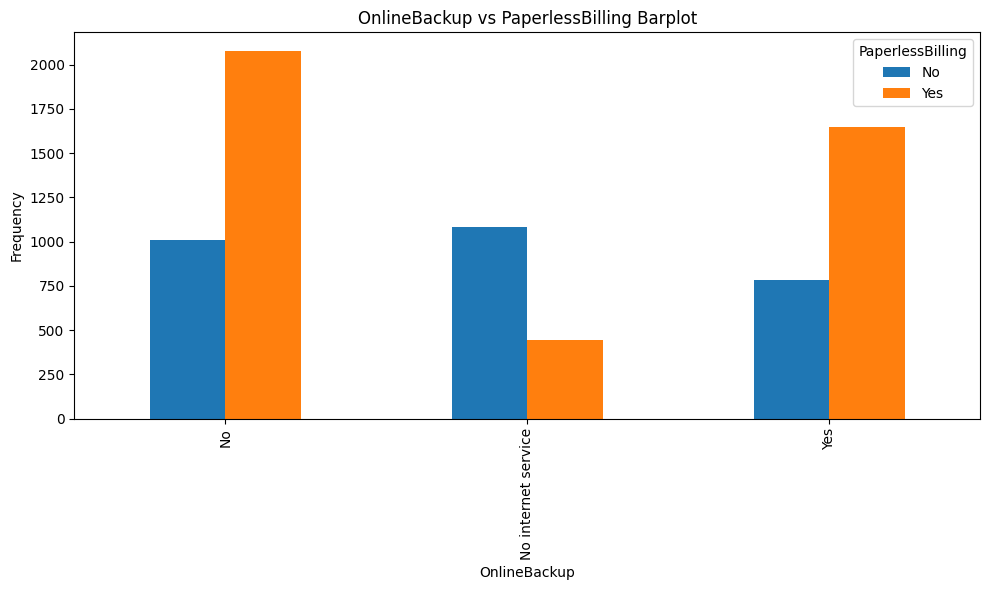

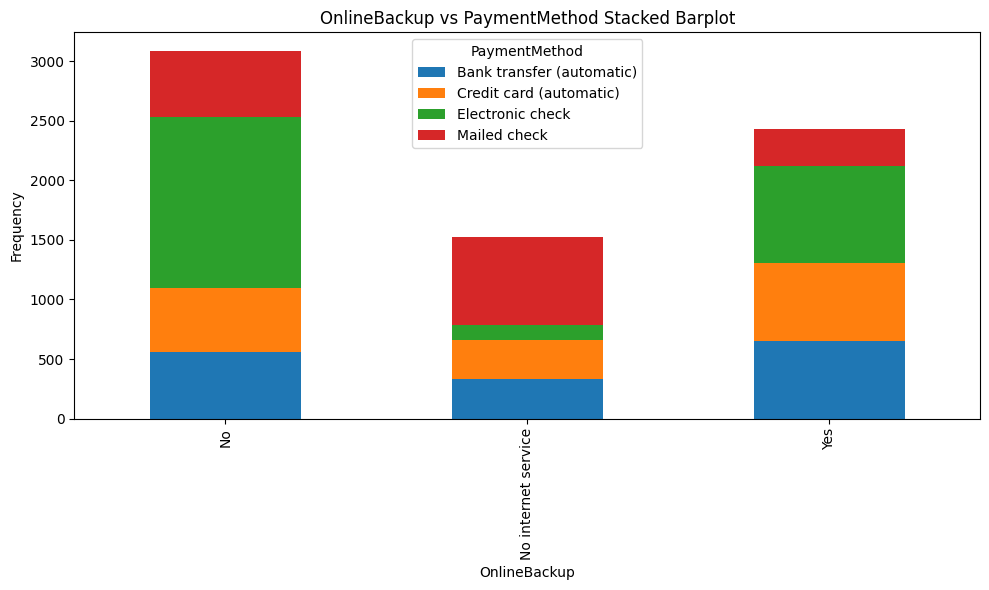

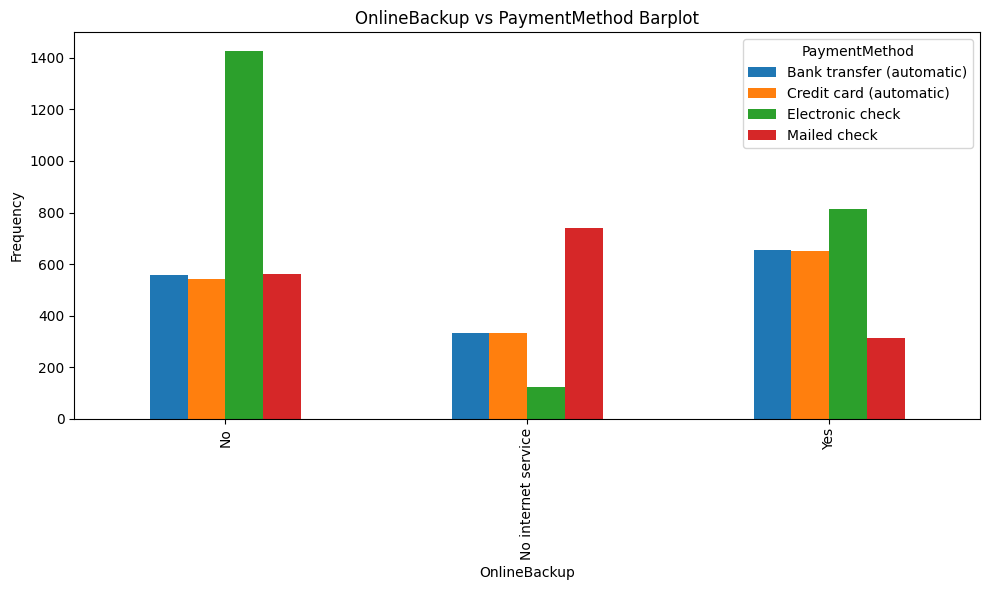

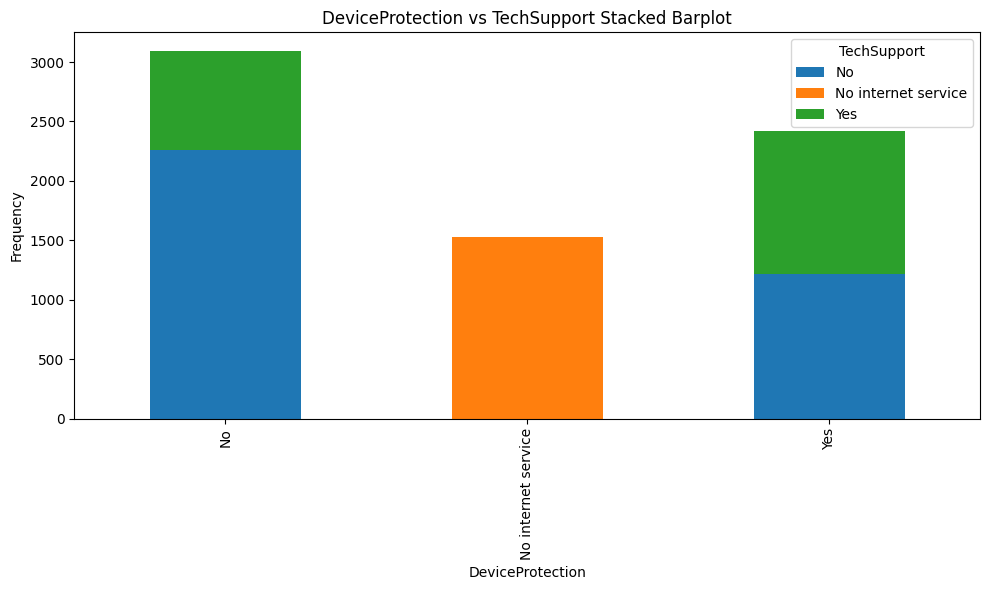

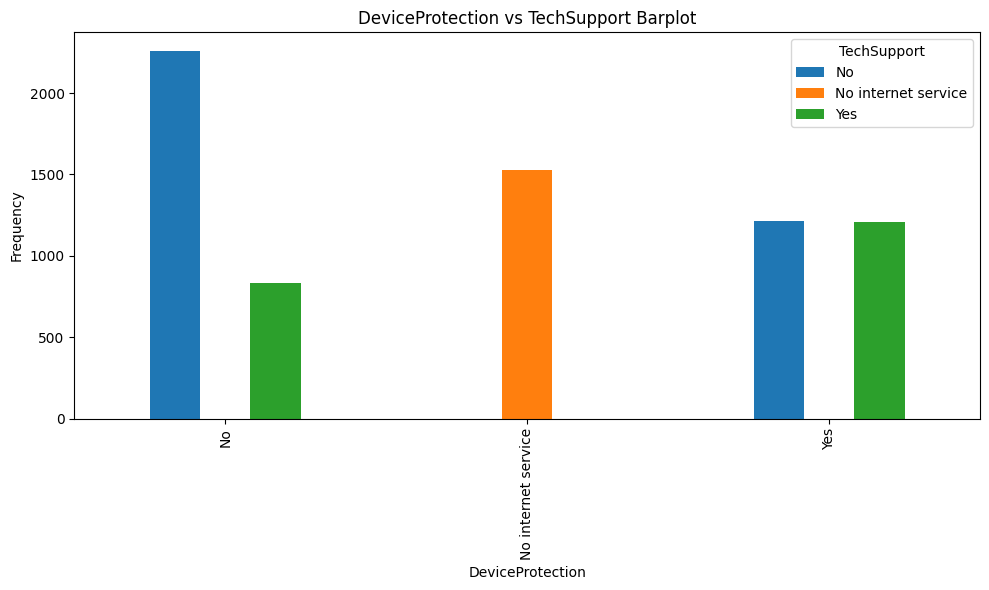

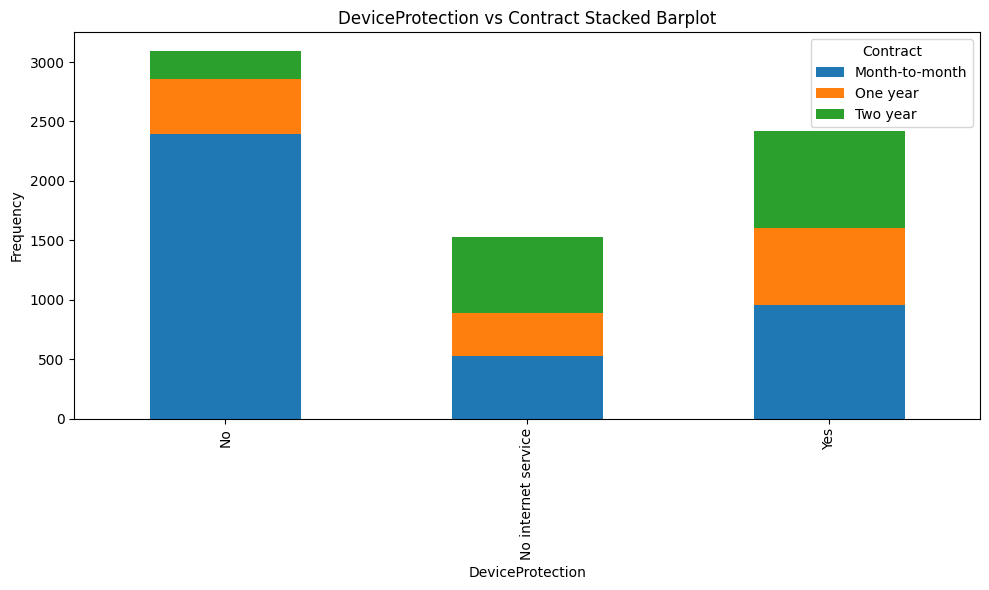

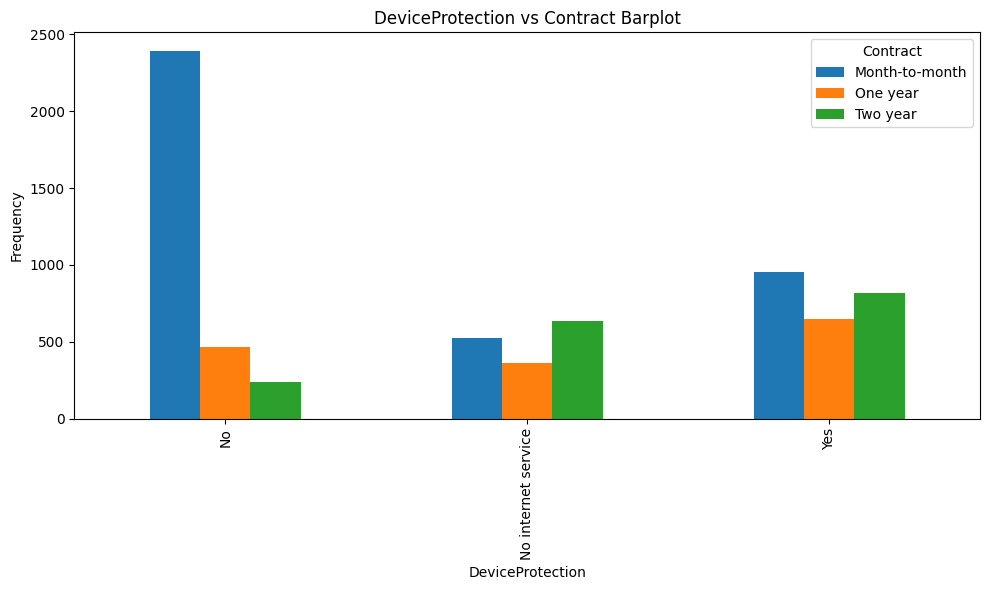

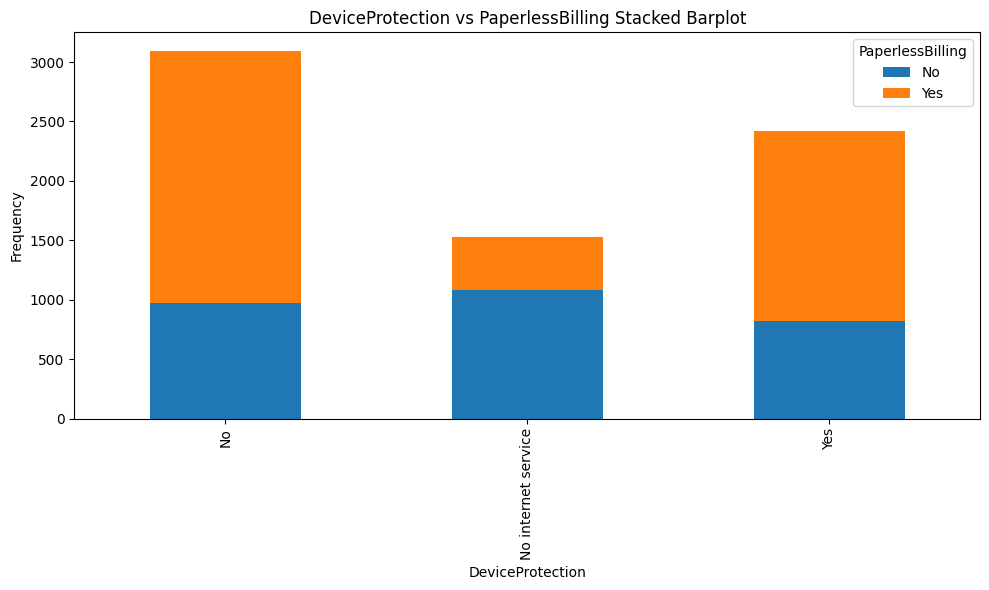

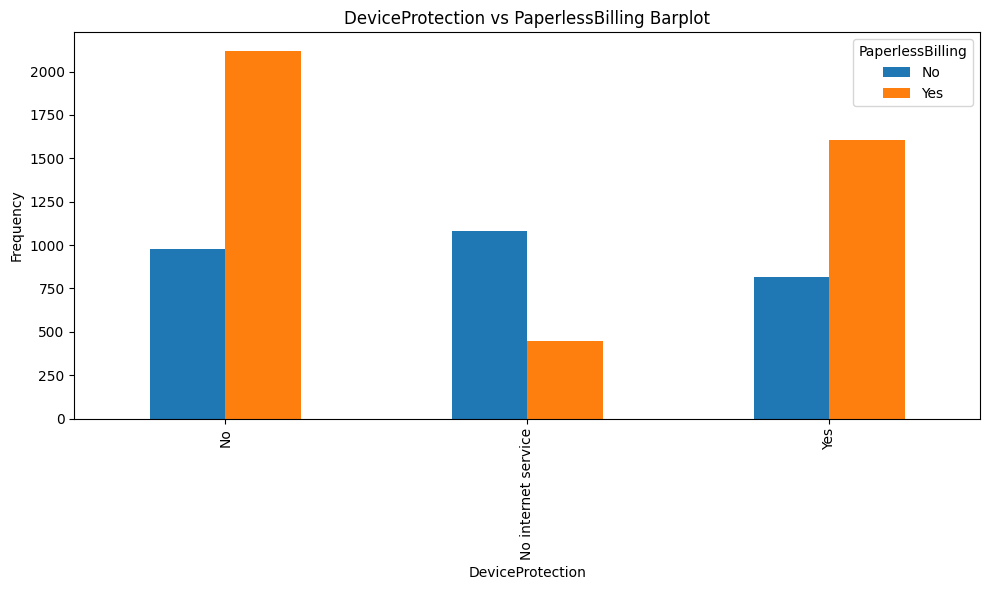

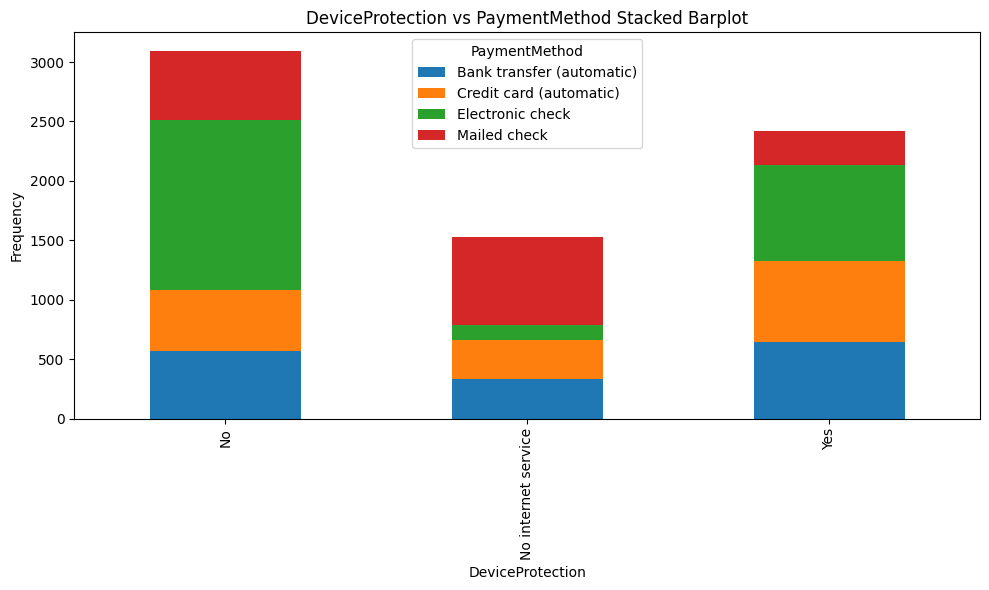

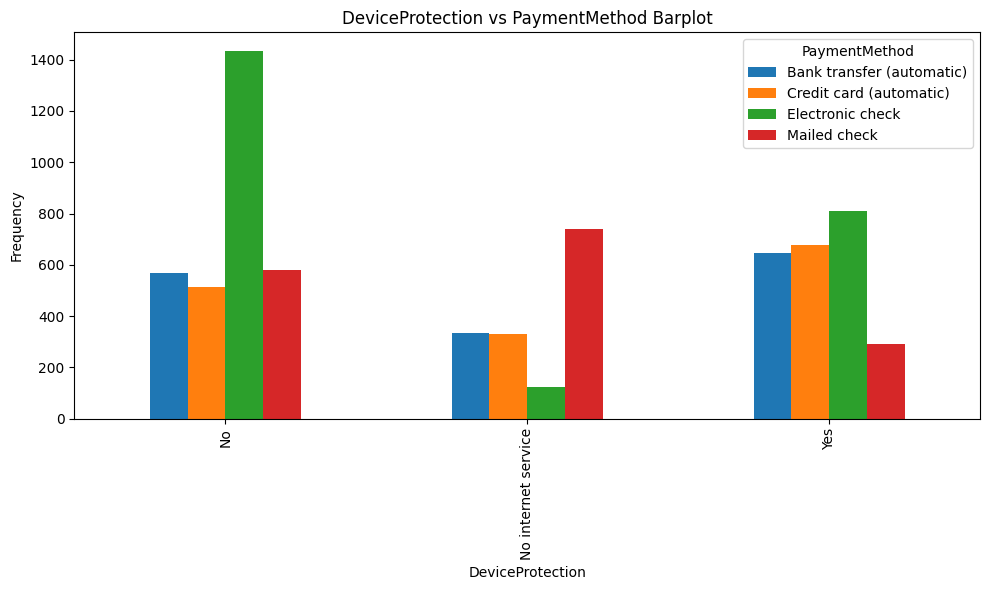

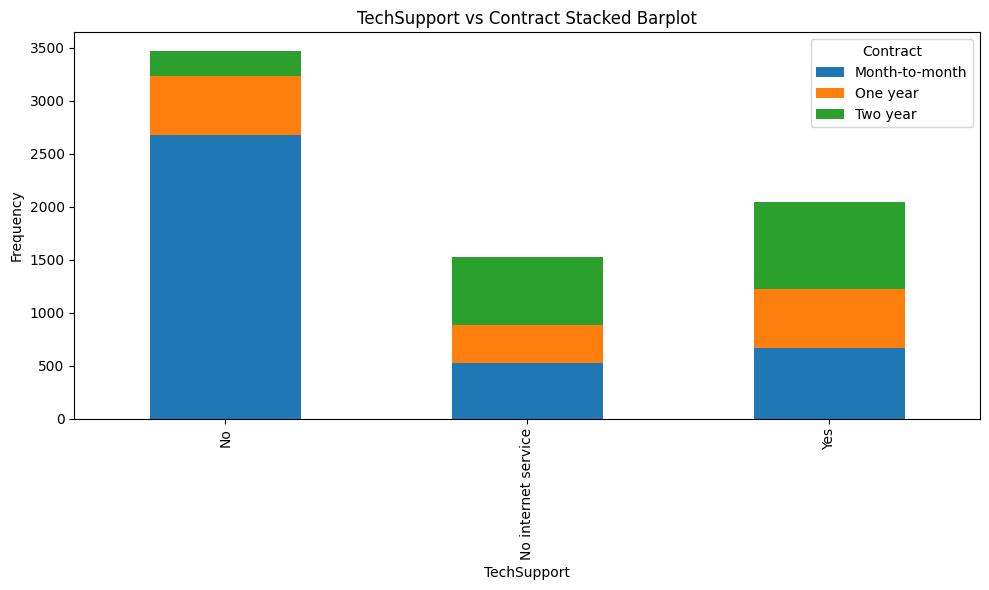

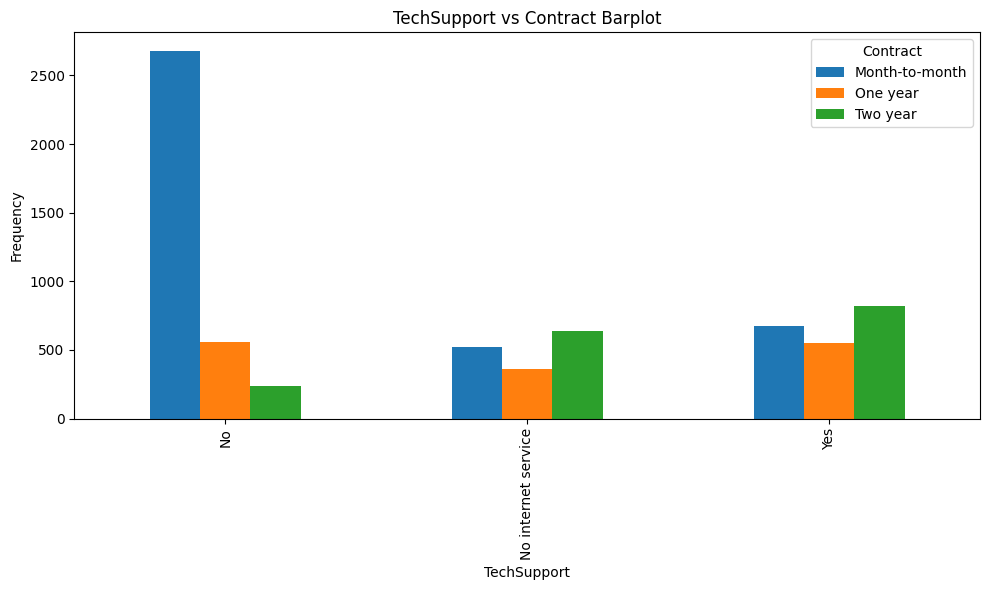

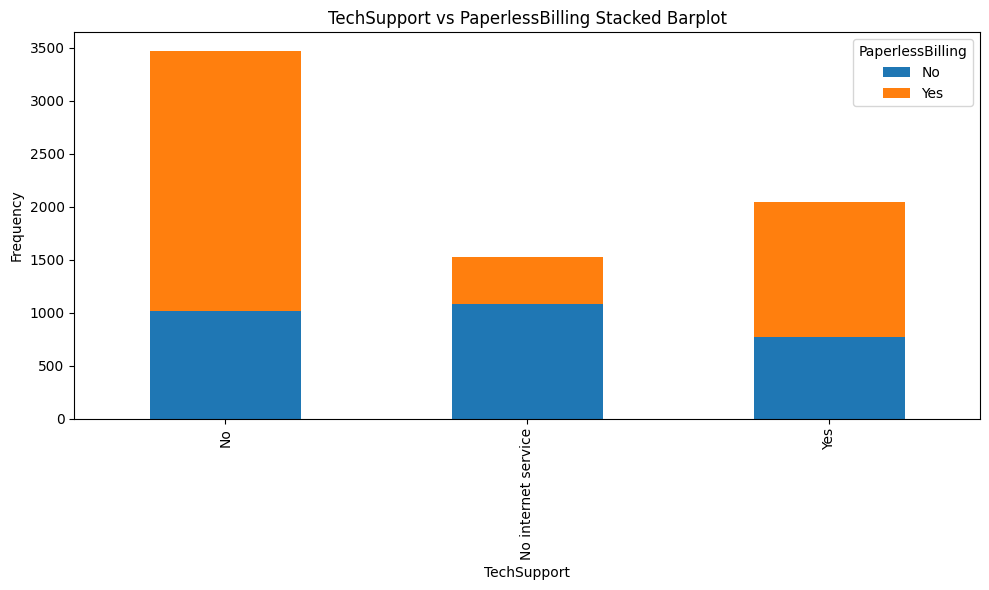

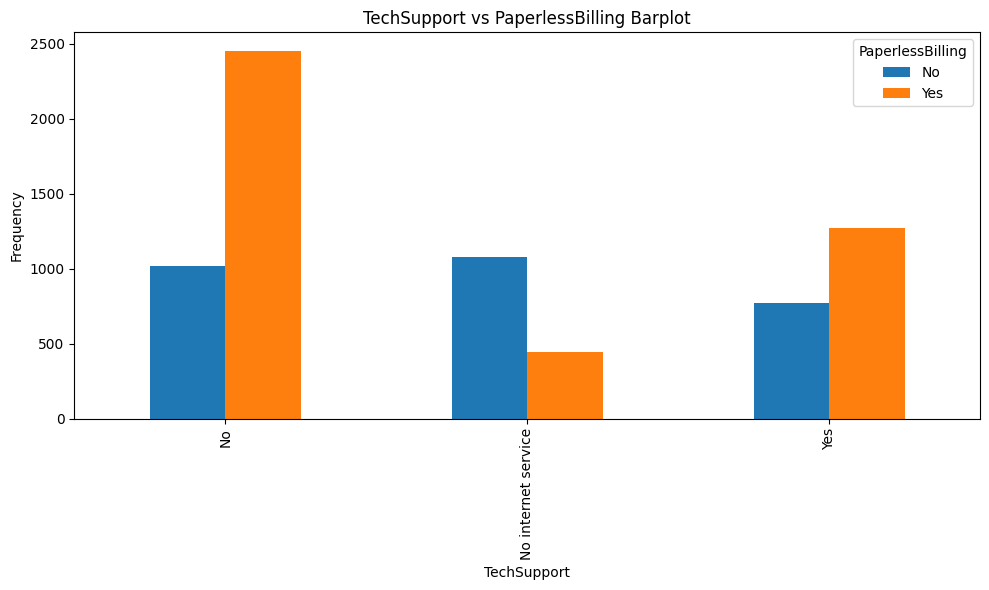

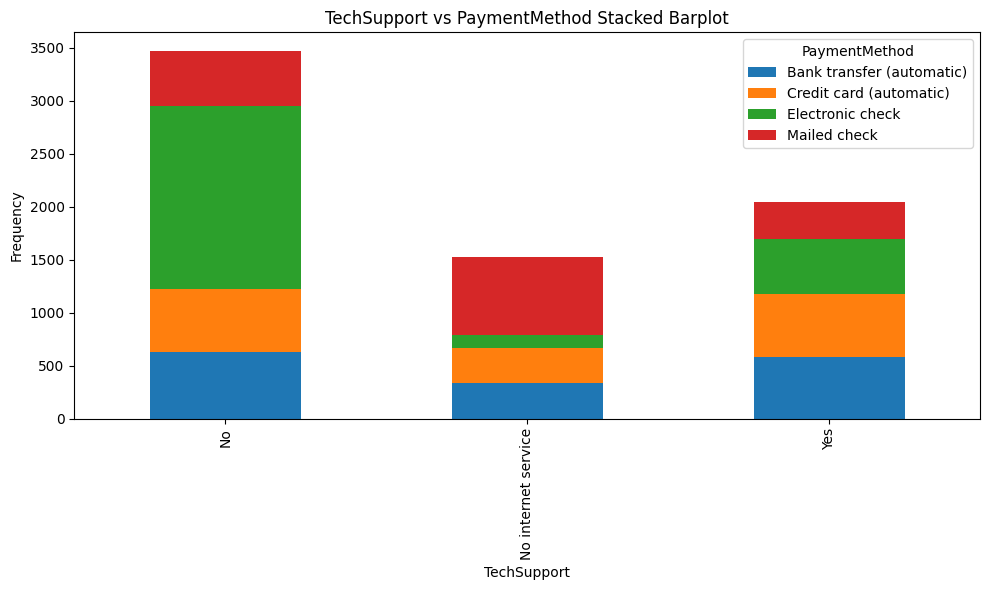

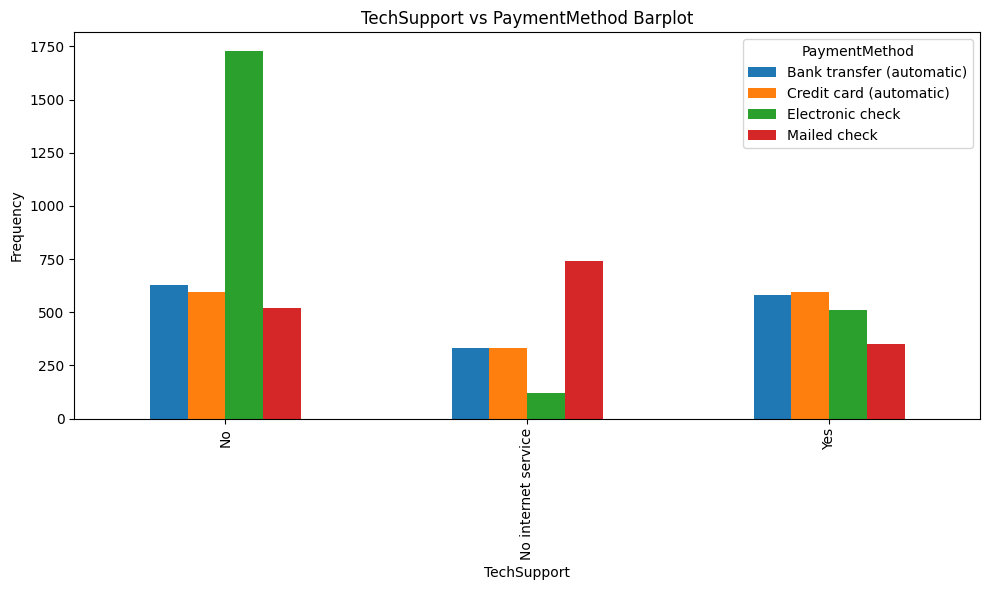

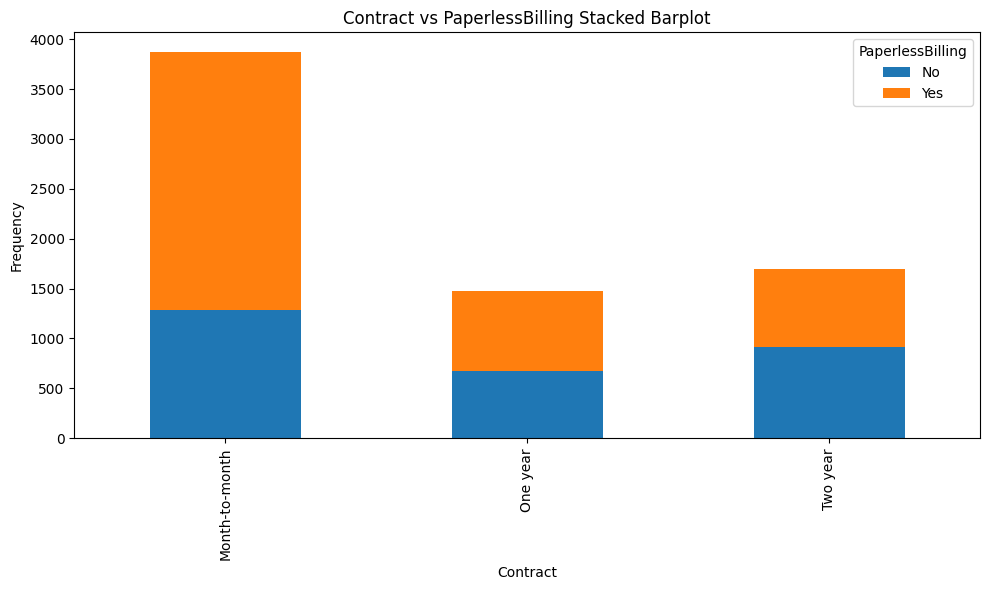

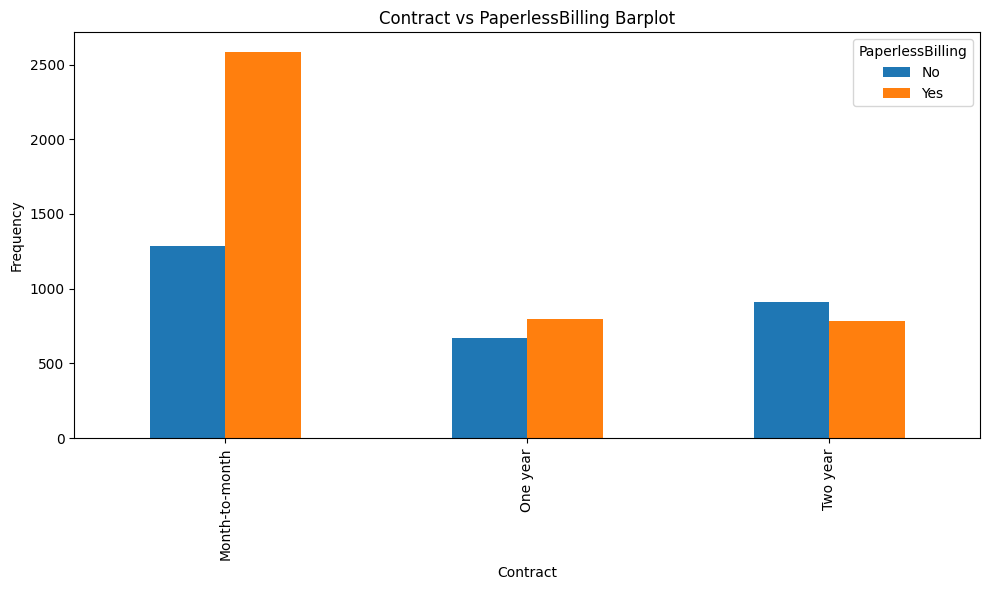

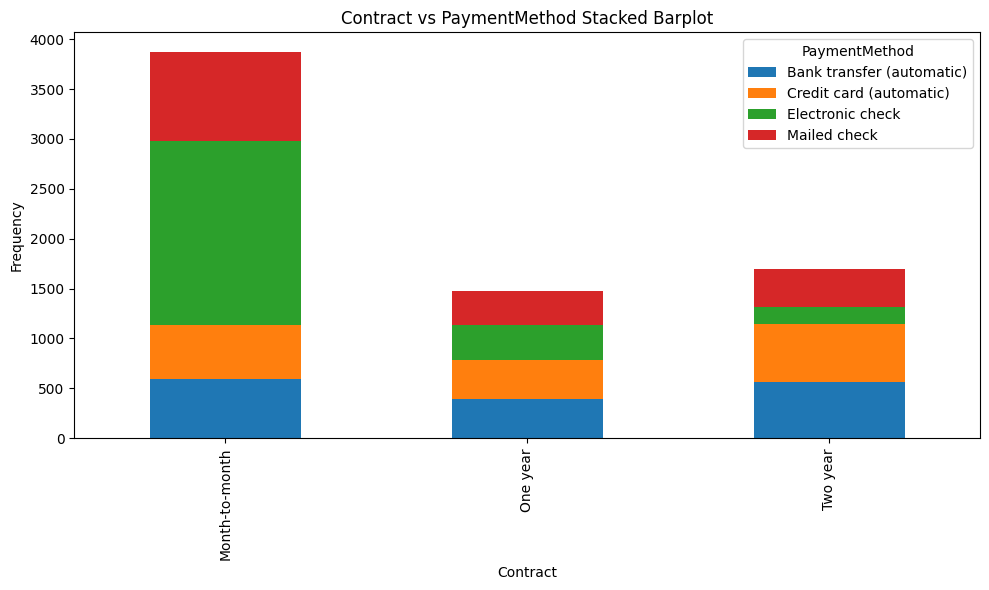

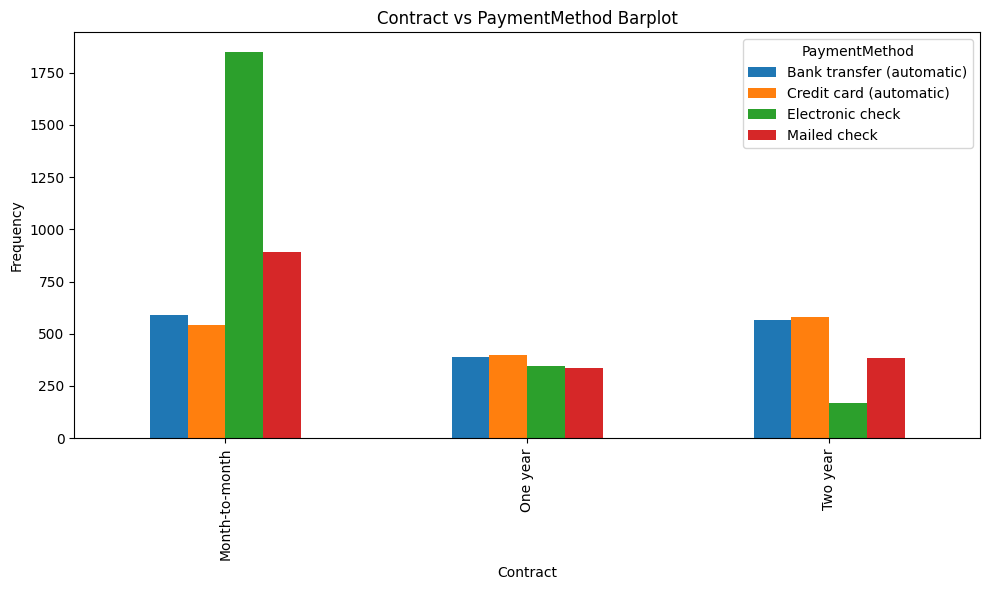

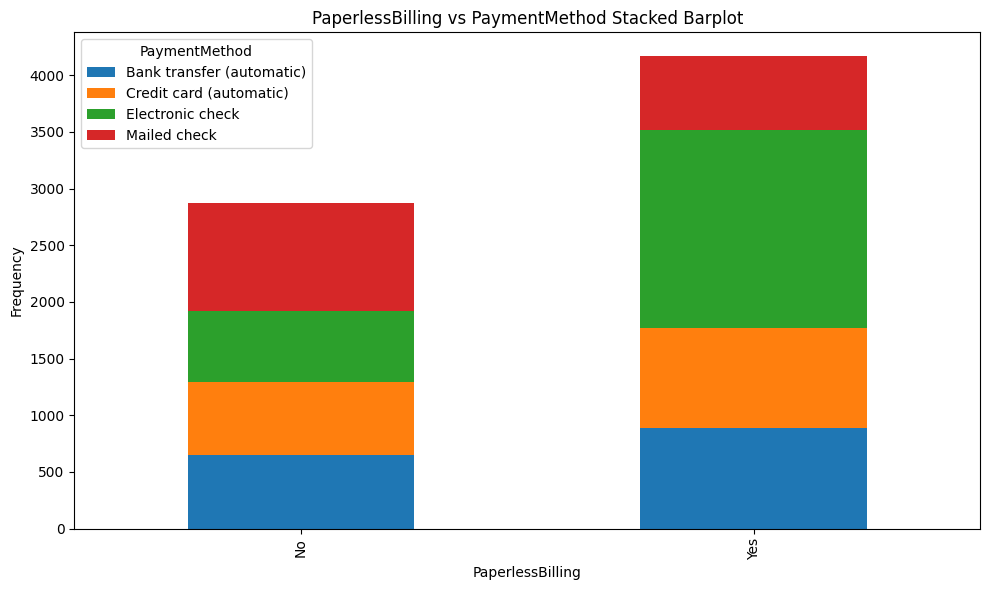

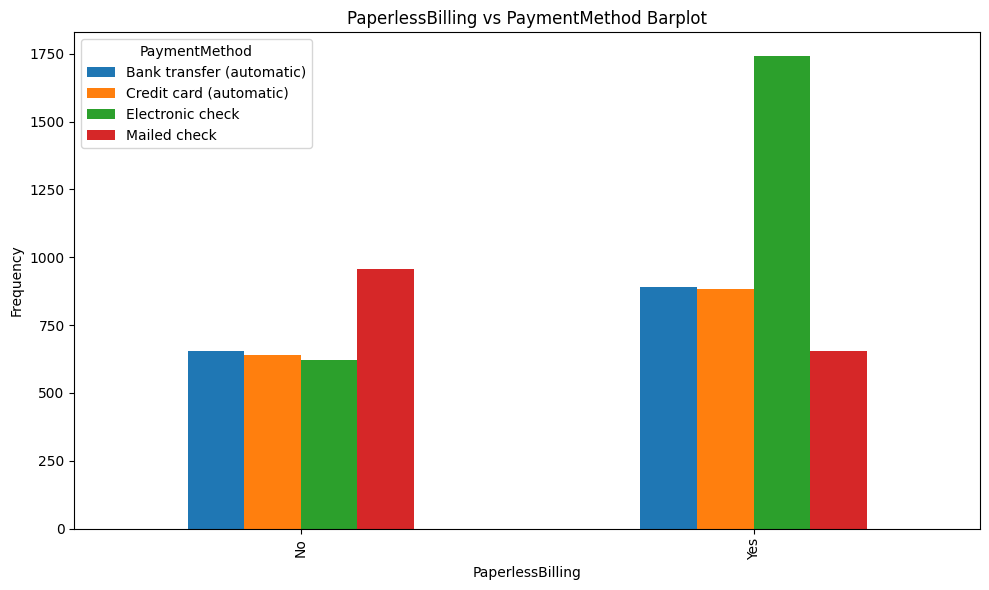

In [373]:
import matplotlib.pyplot as plt
from itertools import combinations


# Lista de variables categóricas
categorical_vars = [
    "Service1", "Service2", "Security", "OnlineBackup",
    "DeviceProtection", "TechSupport", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

# Generar todas las combinaciones de dos variables categóricas
combinations_vars = combinations(categorical_vars, 2)

for column_1, column_2 in combinations_vars:
    # Grafico 1: Heatmap
    display(
        pd.crosstab(alpha_df[column_1], alpha_df[column_2], margins=True)
        .style.background_gradient(cmap="coolwarm")
        .set_caption(f"{column_1} vs {column_2} Heatmap")
    )

    # Grafico 2: Stacked Barplot
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        stacked=True,
        figsize=(10, 6),
        title=f"{column_1} vs {column_2} Stacked Barplot"
    )
    plt.xlabel(column_1)
    plt.ylabel("Frequency")

    # Ajustar el espacio entre las gráficas
    plt.tight_layout()  # Ajuste automático del espacio entre las gráficas
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajuste del espacio entre las subgráficas
    plt.show()

    # Grafico 3: Barplot
    pd.crosstab(alpha_df[column_1], alpha_df[column_2]).plot(
        kind="bar",
        figsize=(10, 6),
        title=f"{column_1} vs {column_2} Barplot"
    )
    plt.xlabel(column_1)
    plt.ylabel("Frequency")

    # Ajuste del espacio entre las gráficas
    plt.tight_layout()  # Ajuste automático del espacio entre las gráficas
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajuste del espacio entre las subgráficas
    plt.show()



**Categorical vs Numerical Variables**

<ipython-input-374-313bd7370ade>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_df.plot(


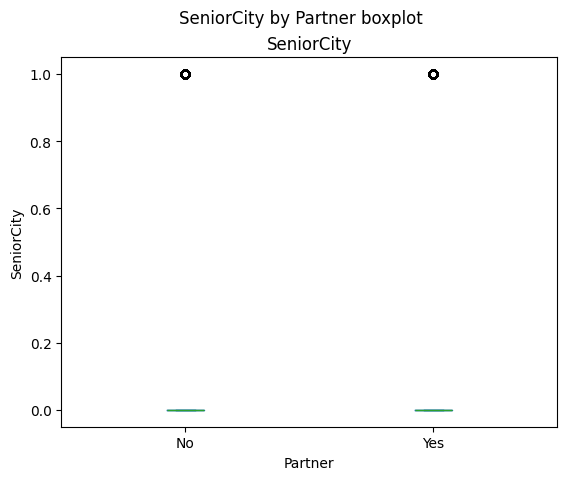

In [374]:
column_cat = "Partner"
column_num = "SeniorCity"

alpha_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

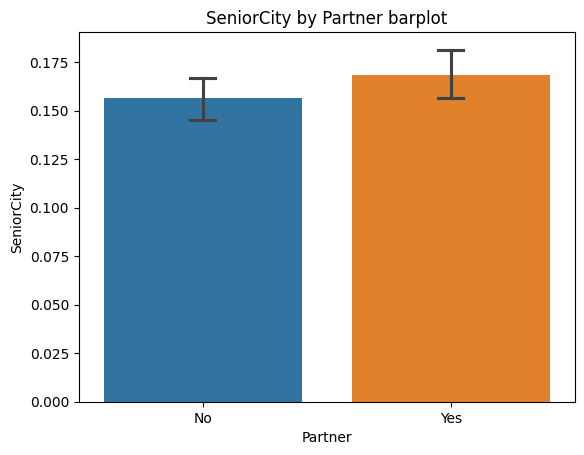

In [375]:
sns.barplot(
    data=alpha_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

**Partner vs Charges**

<ipython-input-376-26735e583f4c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_df.plot(


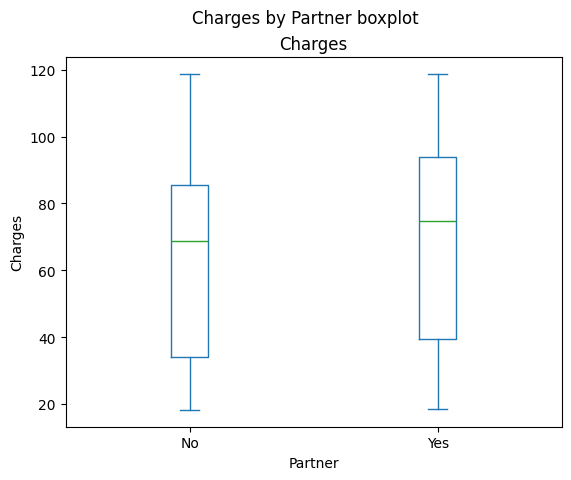

In [376]:
column_cat = "Partner"
column_num = "Charges"

alpha_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

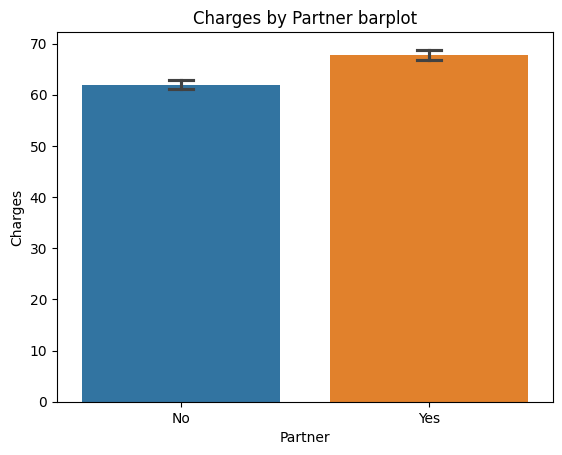

In [377]:
sns.barplot(
    data=alpha_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

**Partner vs Demand**

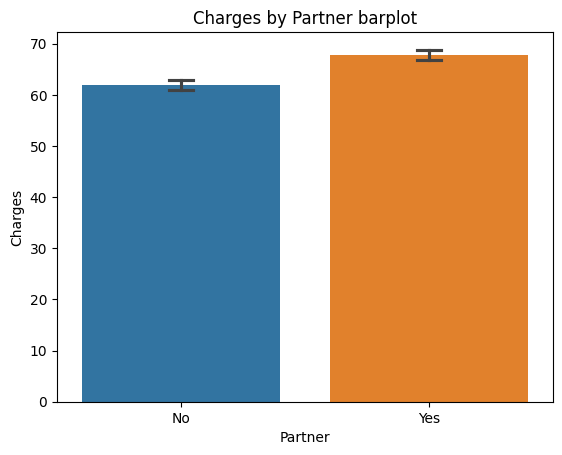

In [378]:
sns.barplot(
    data=alpha_df,
    x=column_cat,
    y=column_num,
    errorbar="ci",
    capsize=0.1,
    hue=column_cat,
).set_title(f"{column_num} by {column_cat} barplot");

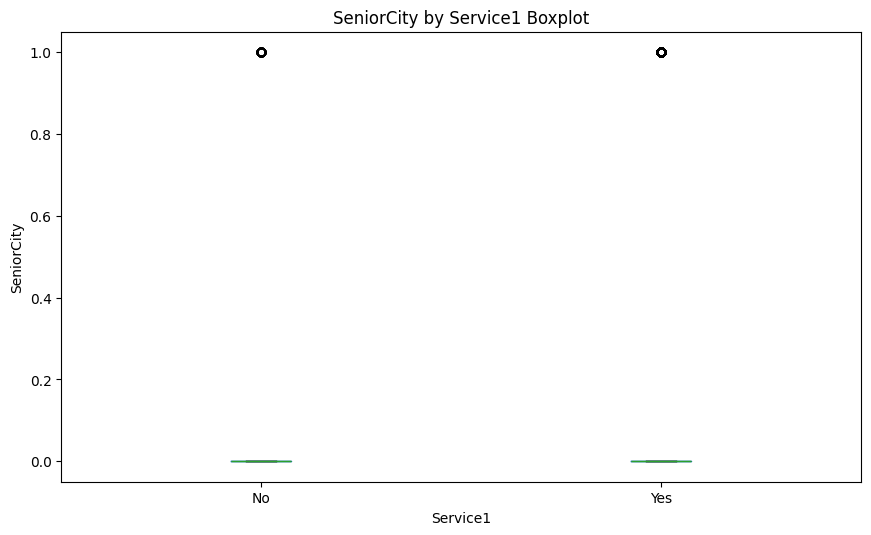

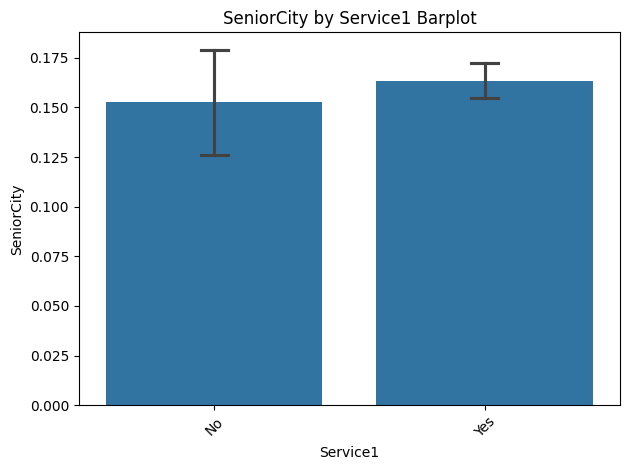

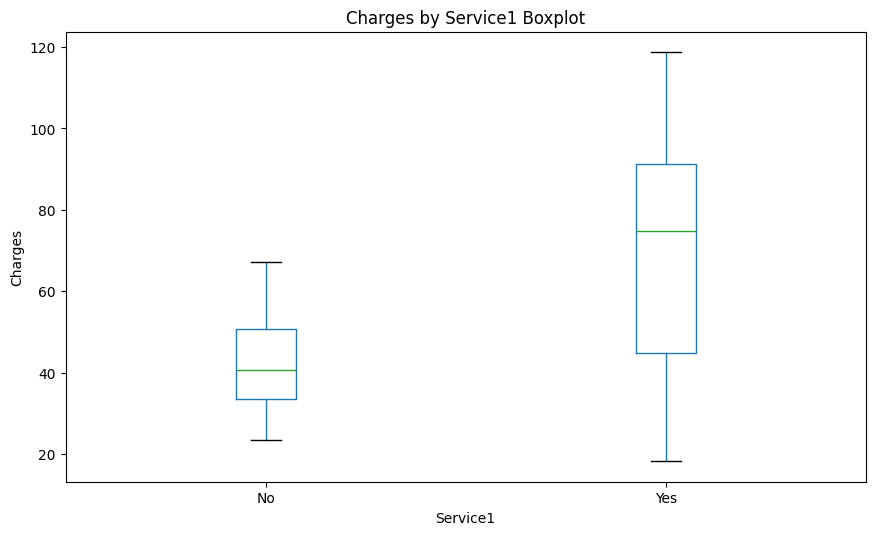

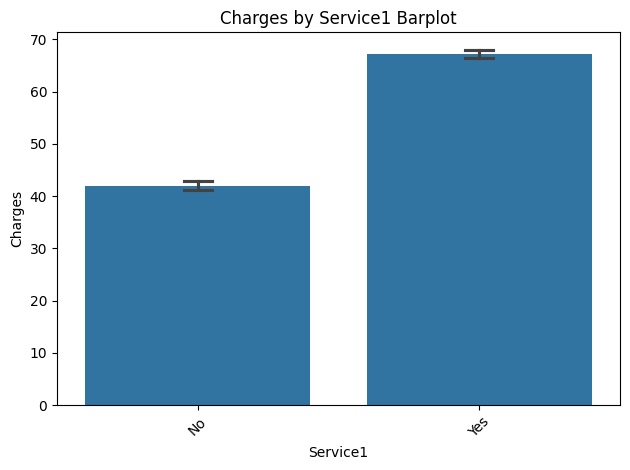

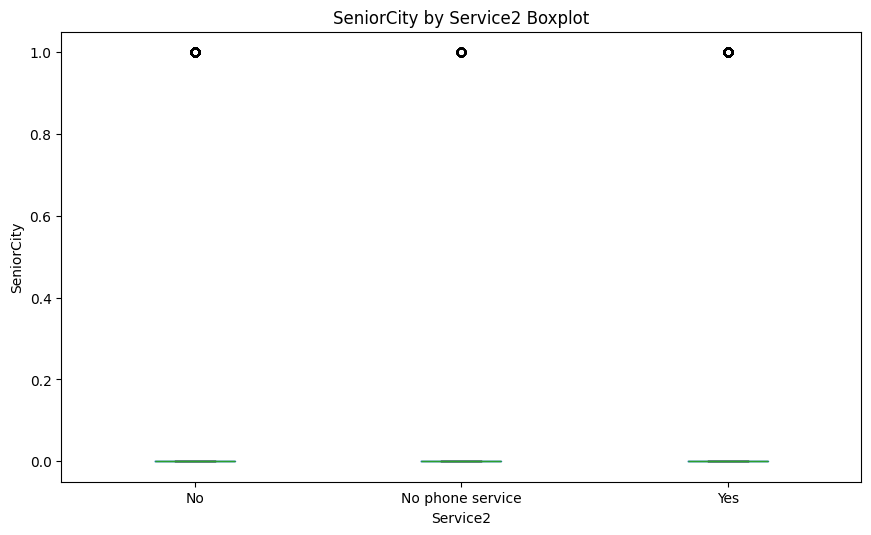

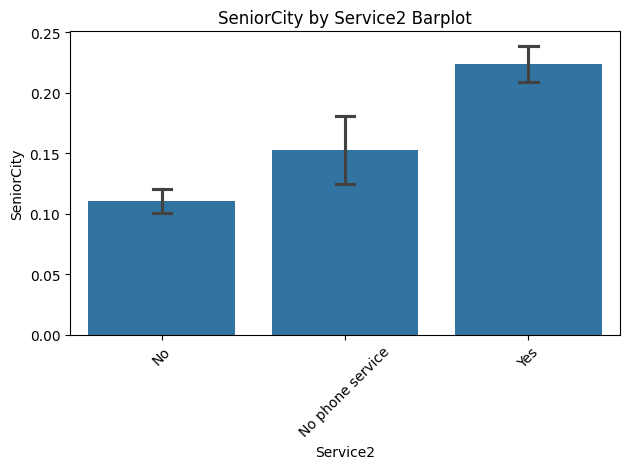

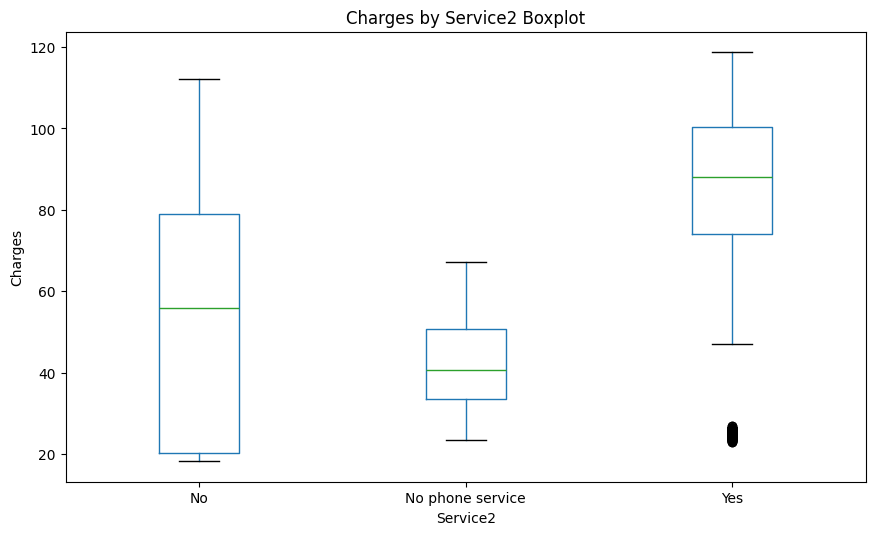

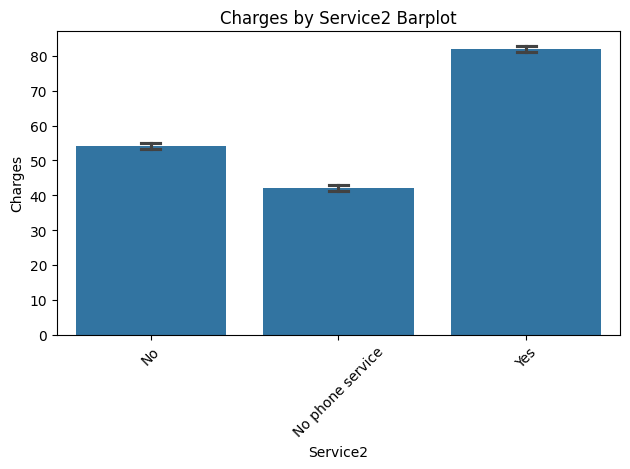

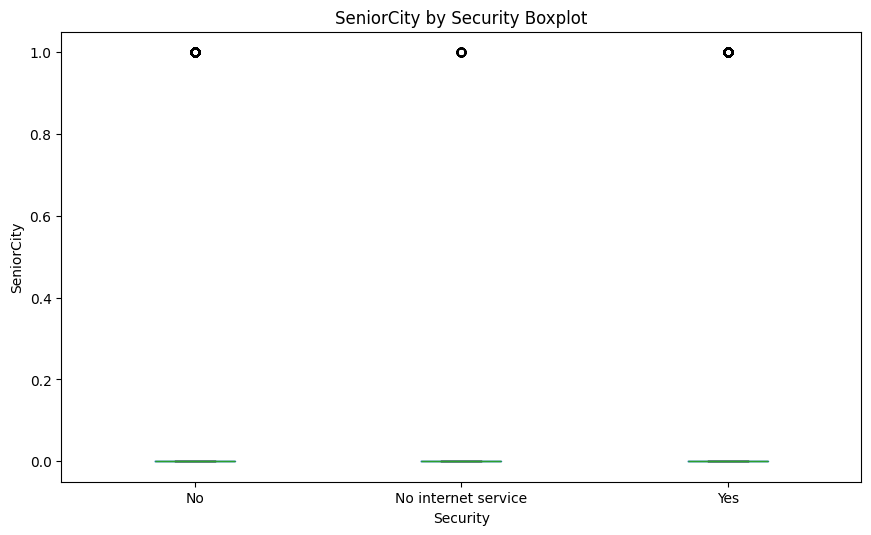

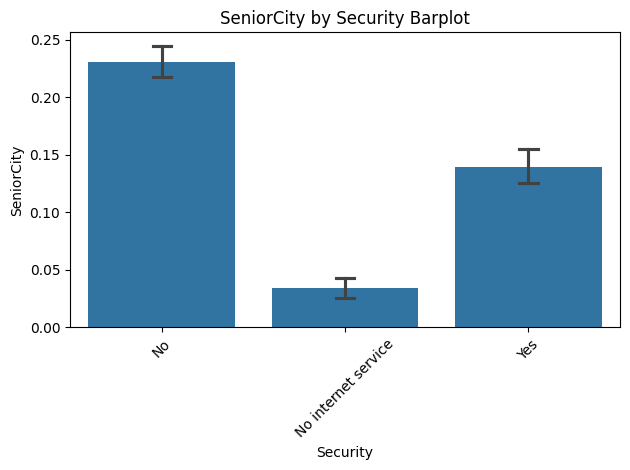

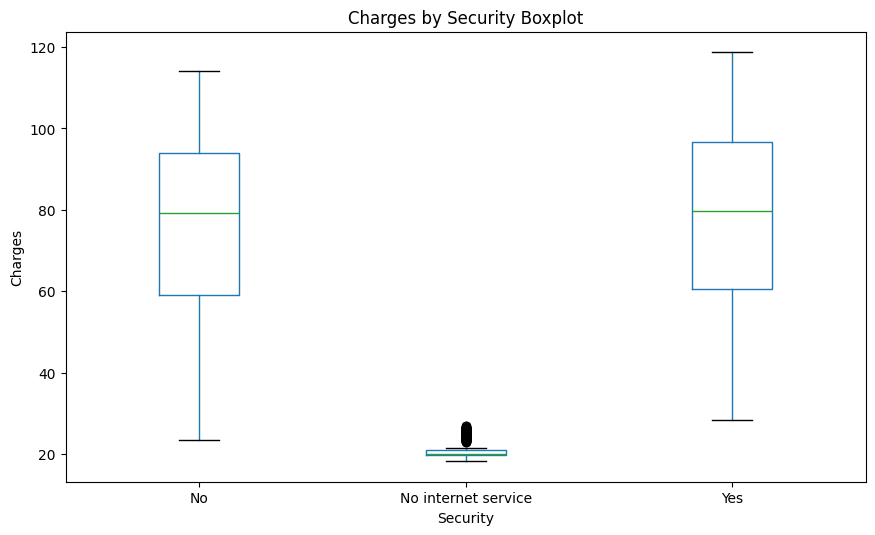

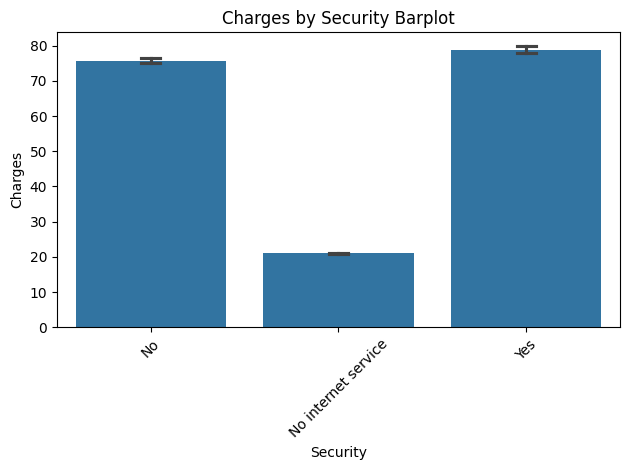

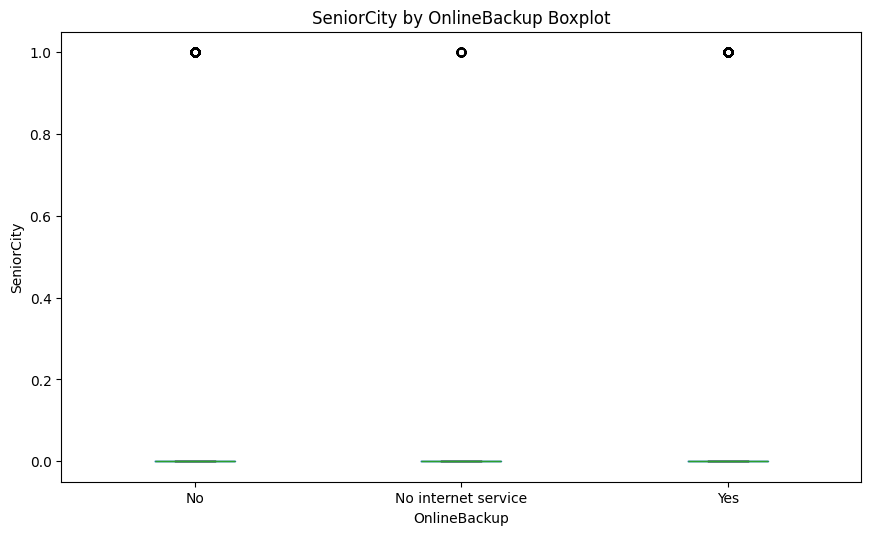

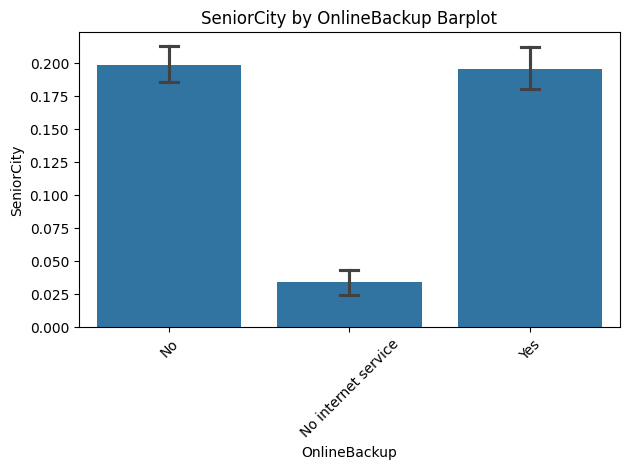

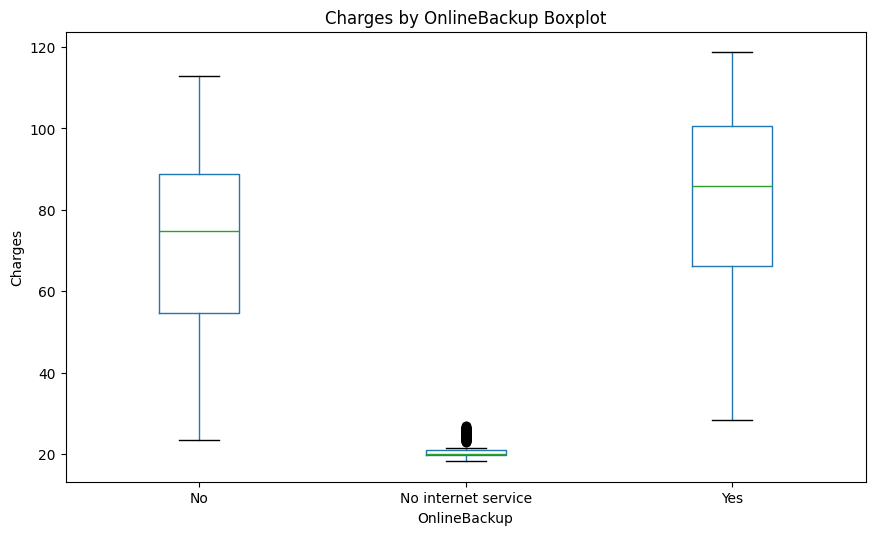

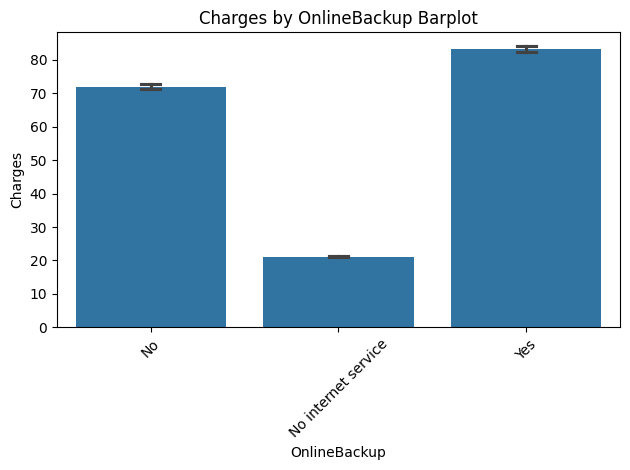

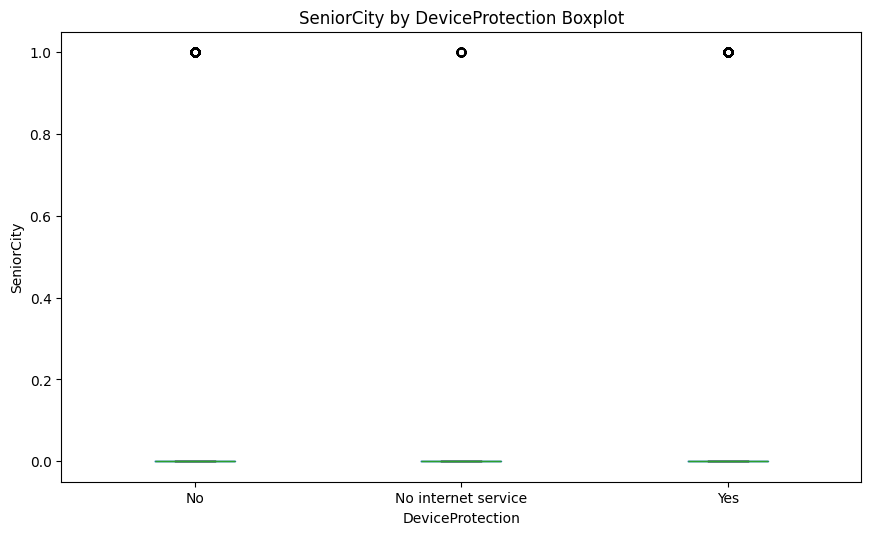

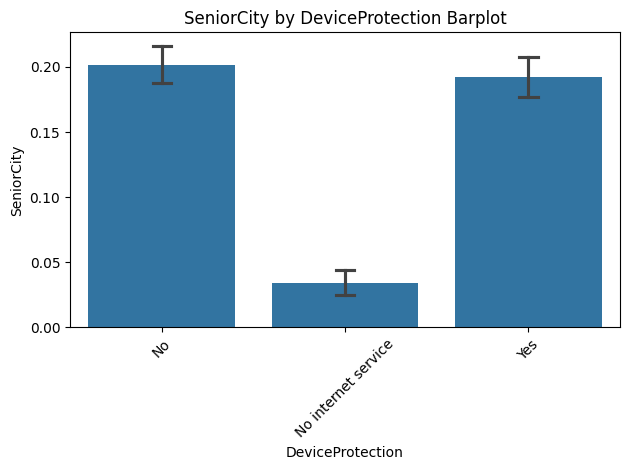

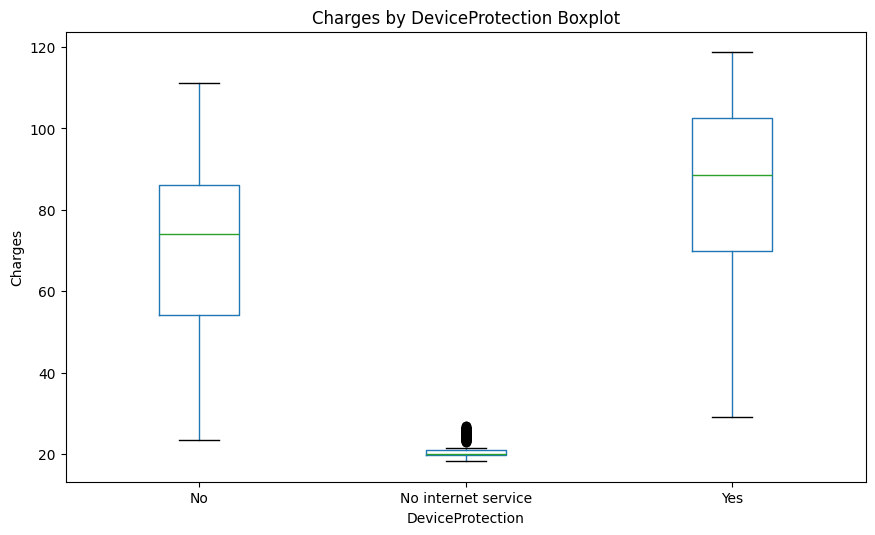

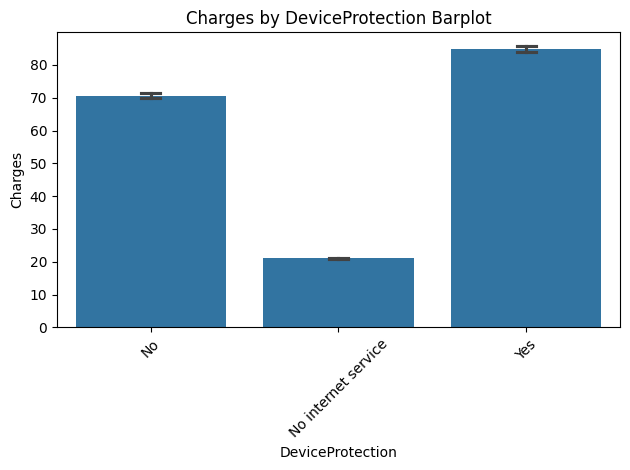

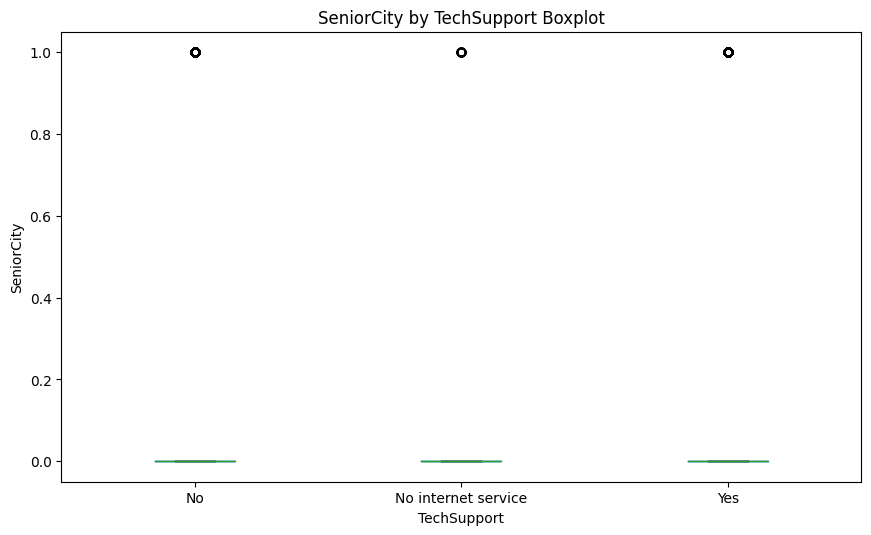

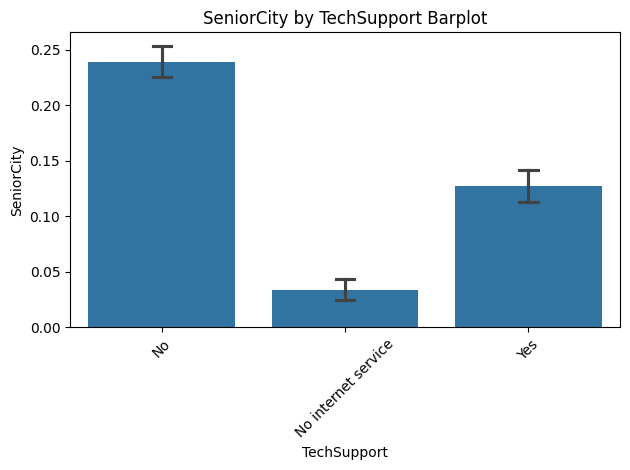

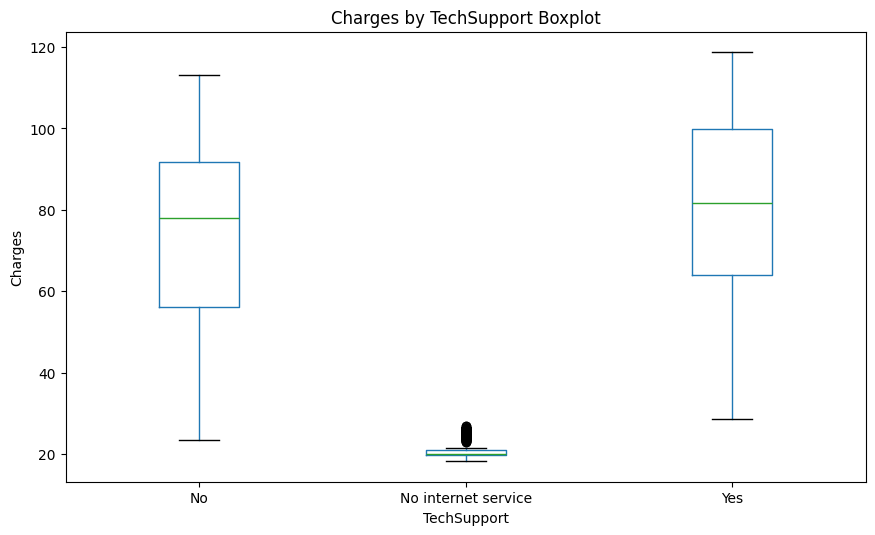

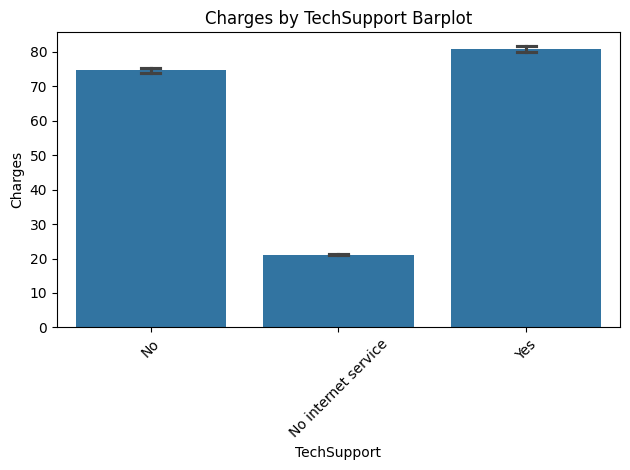

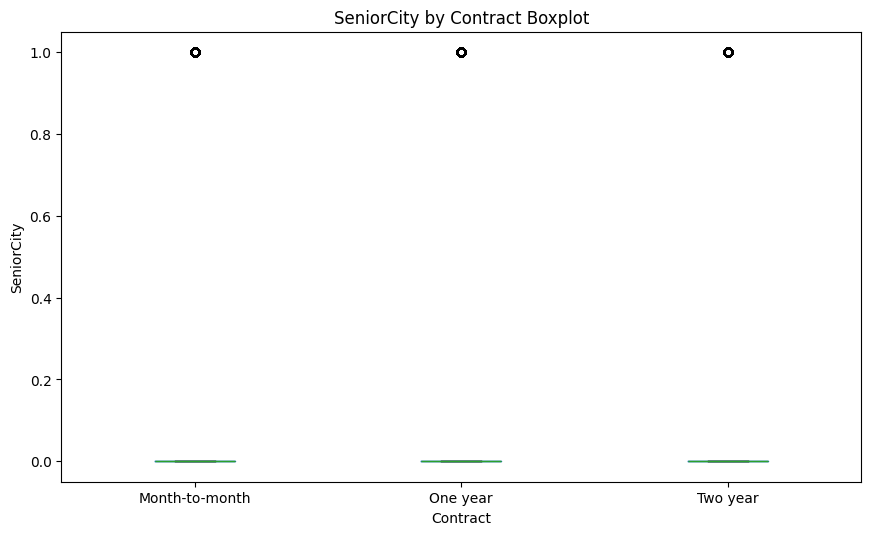

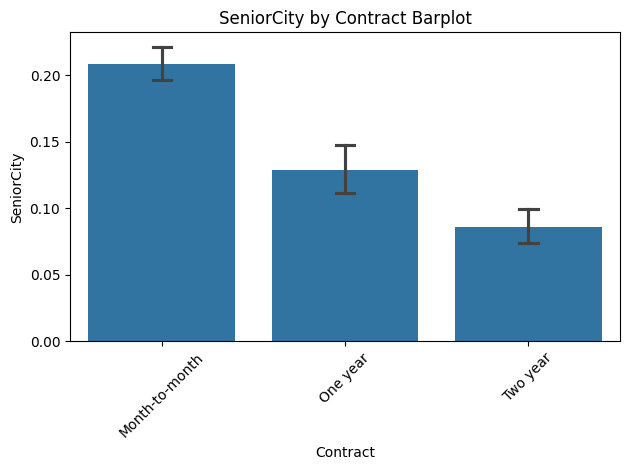

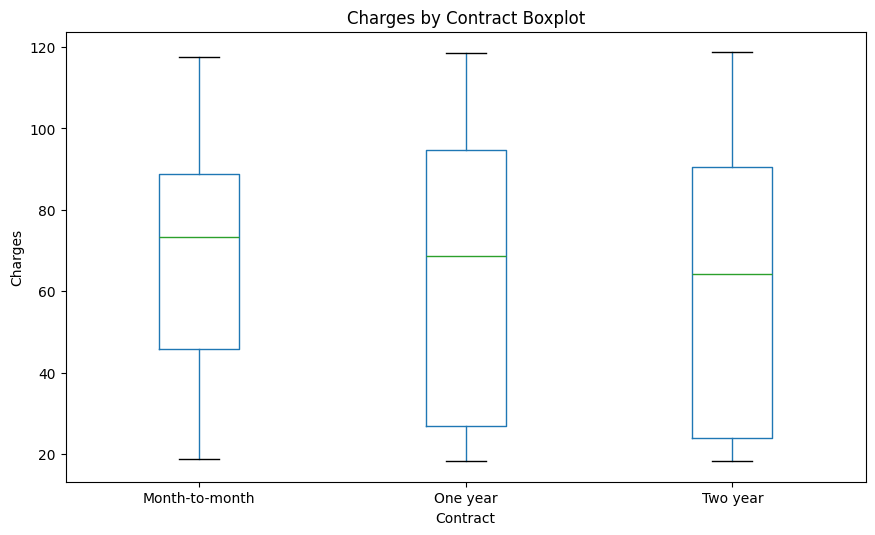

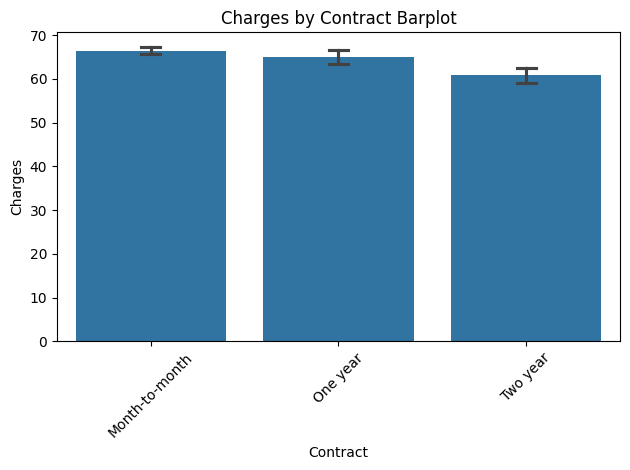

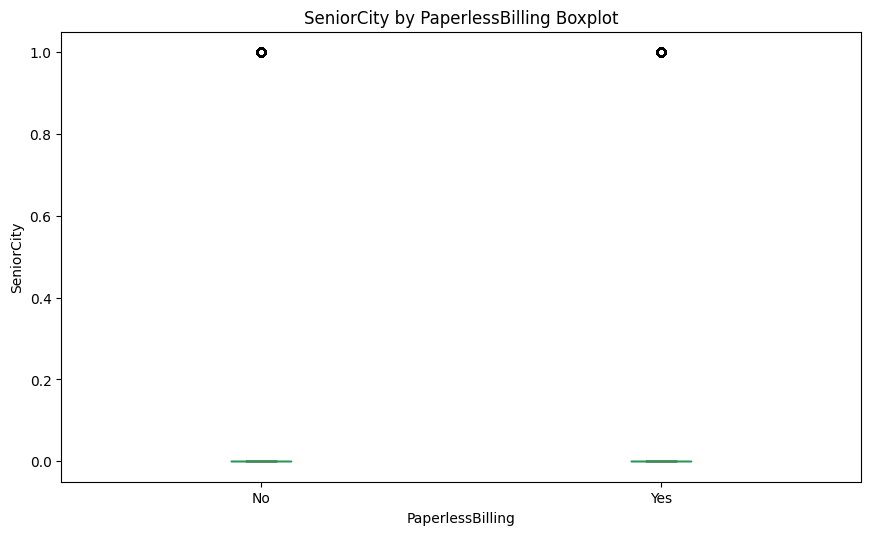

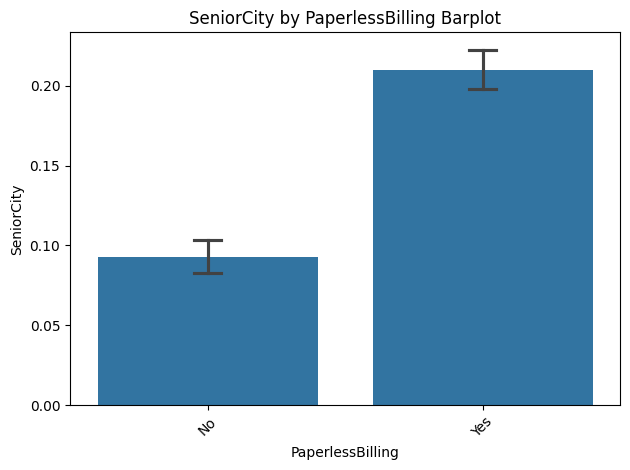

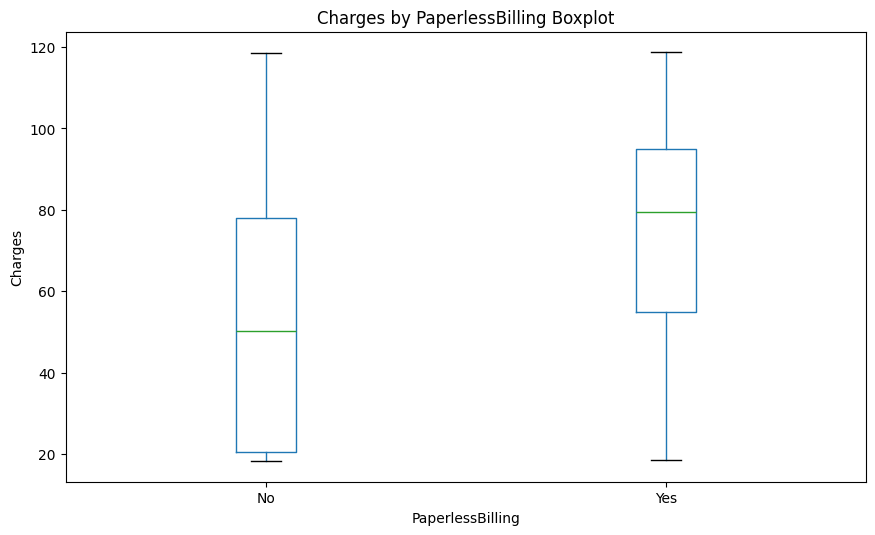

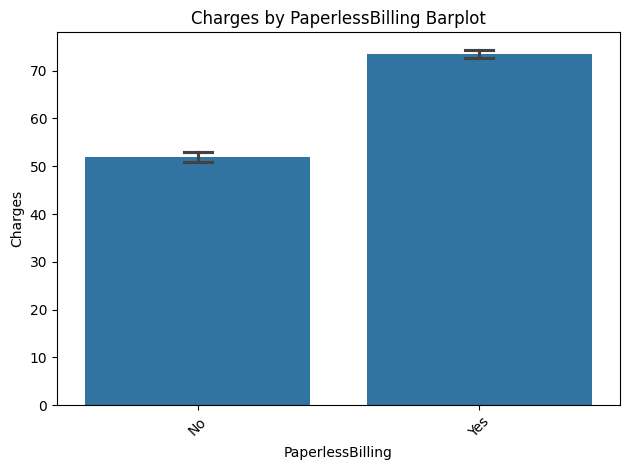

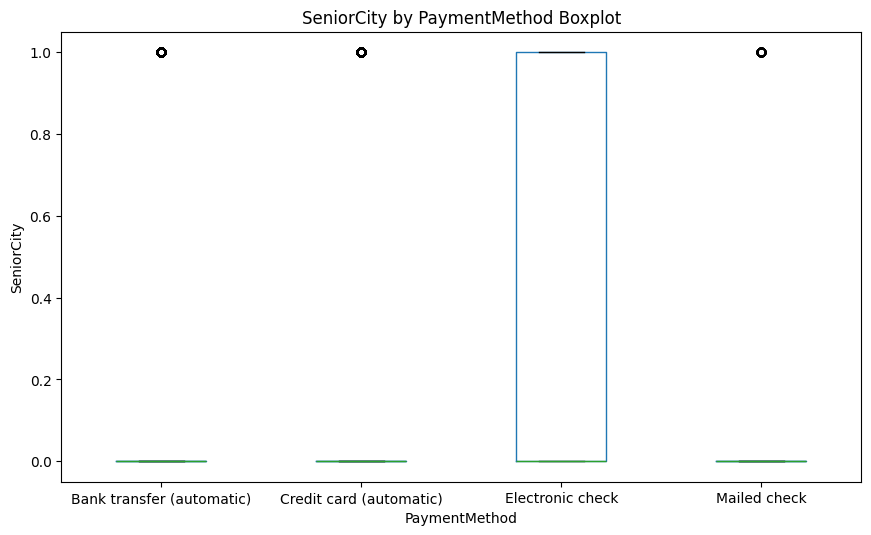

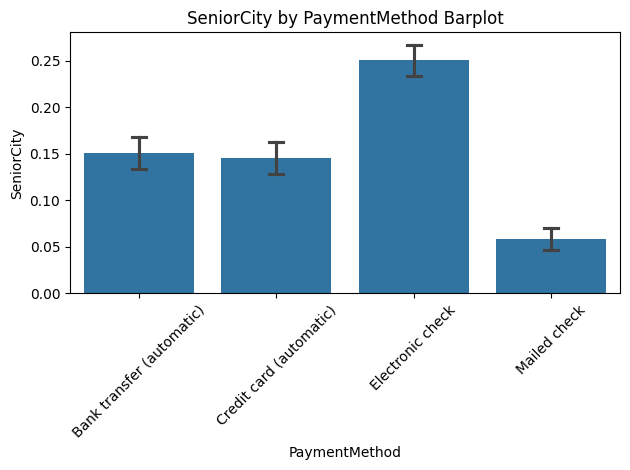

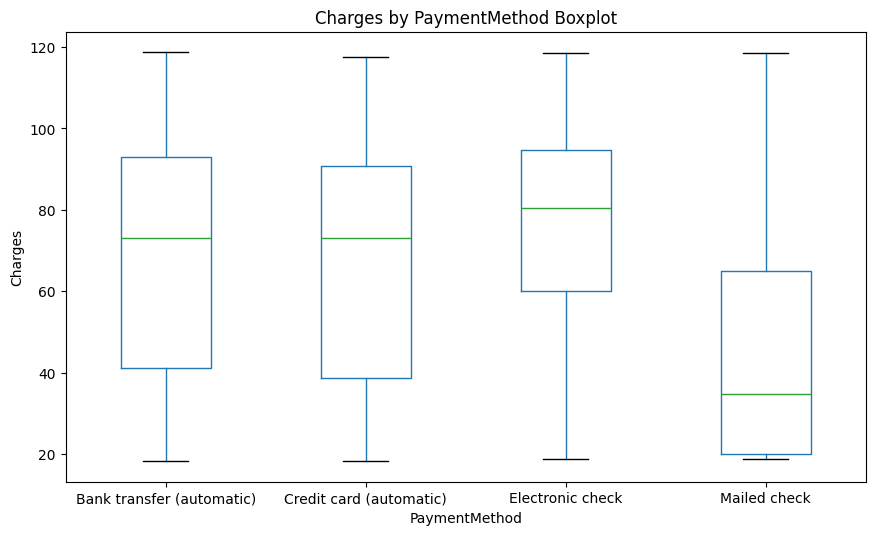

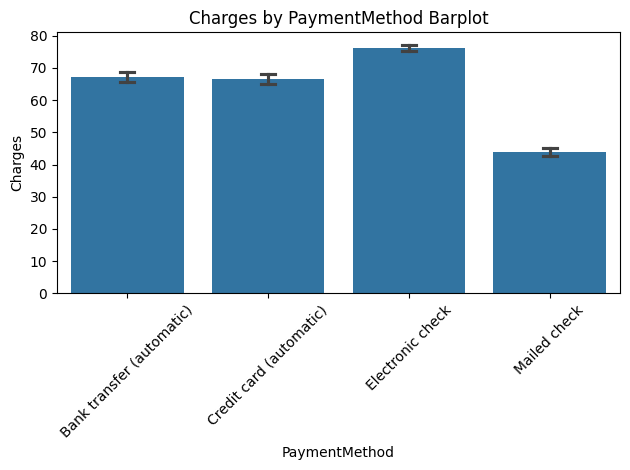

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas y numéricas
categorical_vars = [
    "Service1", "Service2", "Security", "OnlineBackup",
    "DeviceProtection", "TechSupport", "Contract",
    "PaperlessBilling", "PaymentMethod"
]
numerical_vars = ["SeniorCity", "Charges"]

# Iterar por cada combinación de variable categórica y numérica
for column_cat in categorical_vars:
    for column_num in numerical_vars:
        # Grafica 1: Boxplot
        alpha_df.boxplot(
            column=column_num,
            by=column_cat,
            grid=False,
            figsize=(10, 6)
        )
        plt.title(f"{column_num} by {column_cat} Boxplot")
        plt.suptitle("")  # Remover título automático de Pandas
        plt.xlabel(column_cat)
        plt.ylabel(column_num)
        plt.show()

        # Grafica 2: Barplot con Seaborn
        sns.barplot(
            data=alpha_df,
            x=column_cat,
            y=column_num,
            errorbar="ci",
            capsize=0.1
        ).set_title(f"{column_num} by {column_cat} Barplot")
        plt.xlabel(column_cat)
        plt.ylabel(column_num)
        plt.xticks(rotation=45)

        # Ajustar el espacio entre las gráficas
        plt.tight_layout()  # Ajusta el espacio entre las gráficas para evitar que se solapen
        plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajustar el espacio entre las subgráficas
        plt.show()


**Analisis Multivariado**

Es importante validar la relación de la variable objetivo con multiples variables

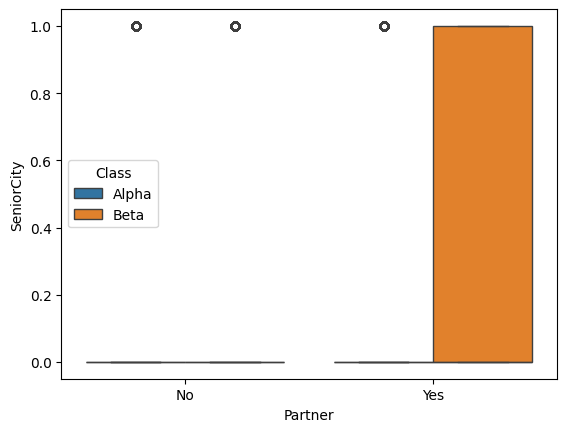

In [380]:
sns.boxplot(data=alpha_df, x="Partner", y="SeniorCity", hue="Class");

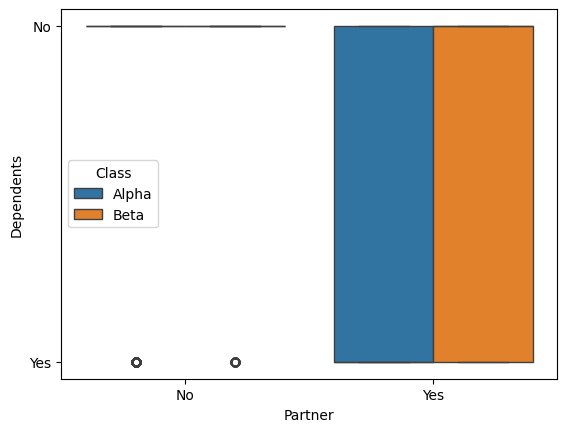

In [381]:
sns.boxplot(data=alpha_df, x="Partner", y="Dependents", hue="Class");

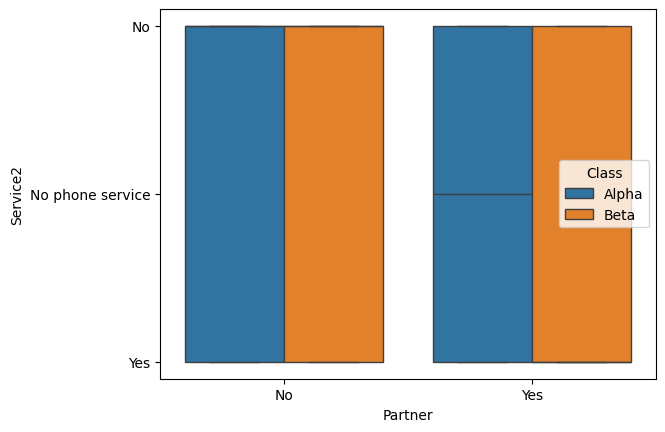

In [382]:
sns.boxplot(data=alpha_df, x="Partner", y="Service2", hue="Class");

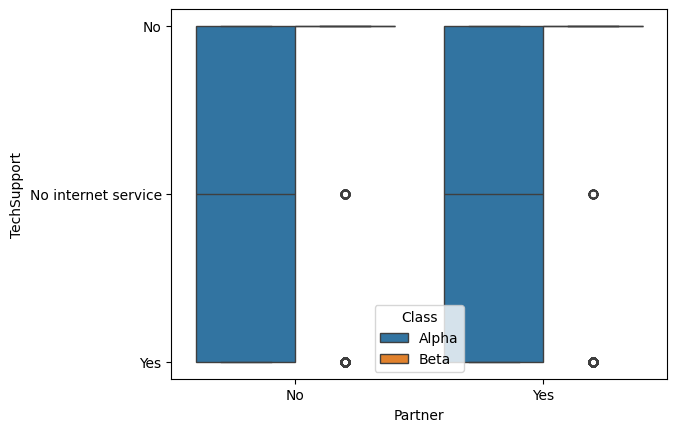

In [383]:
sns.boxplot(data=alpha_df, x="Partner", y="TechSupport", hue="Class");

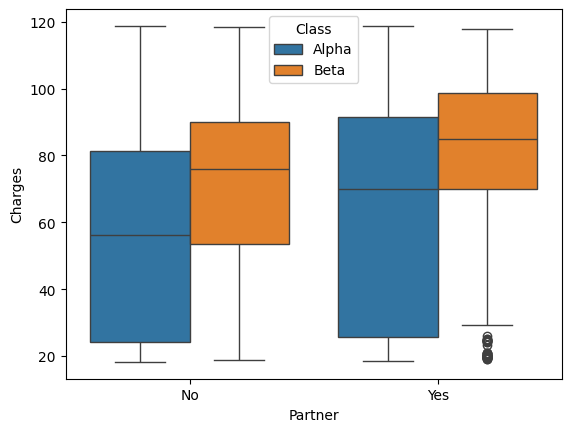

In [384]:
sns.boxplot(data=alpha_df, x="Partner", y="Charges", hue="Class");

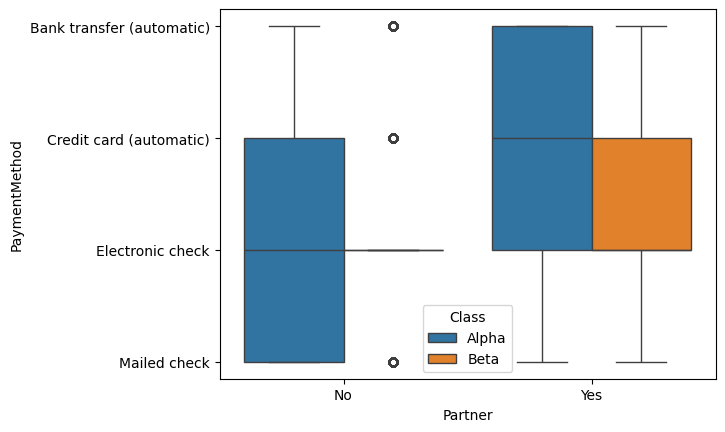

In [385]:
sns.boxplot(data=alpha_df, x="Partner", y="PaymentMethod", hue="Class");

In [386]:

agg_df = alpha_df[["PaymentMethod", "Class", "SeniorCity", "Charges"]] \
    .groupby(["PaymentMethod", "Class"], observed=True) \
    .mean() * 100

agg_df = agg_df.reset_index()


print(agg_df)




               PaymentMethod  Class  SeniorCity  Charges
0  Bank transfer (automatic)  Alpha       14.00  6504.94
1  Bank transfer (automatic)   Beta       20.54  7787.56
2    Credit card (automatic)  Alpha       12.33  6456.22
3    Credit card (automatic)   Beta       26.72  7735.60
4           Electronic check  Alpha       21.41  7423.20
5           Electronic check   Beta       29.60  7870.10
6               Mailed check  Alpha        3.83  4140.39
7               Mailed check   Beta       14.29  5455.71


In [387]:

agg_df = alpha_df[["Contract", "Class", "SeniorCity", "Charges"]] \
    .groupby(["Contract", "Class"], observed=True) \
    .mean() * 100

agg_df = agg_df.reset_index()

print(agg_df)


         Contract  Class  SeniorCity  Charges
0  Month-to-month  Alpha       16.49  6146.26
1  Month-to-month   Beta       26.65  7301.94
2        One year  Alpha       12.32  6250.81
3        One year   Beta       17.47  8505.09
4        Two year  Alpha        8.44  6001.25
5        Two year   Beta       12.50  8677.71


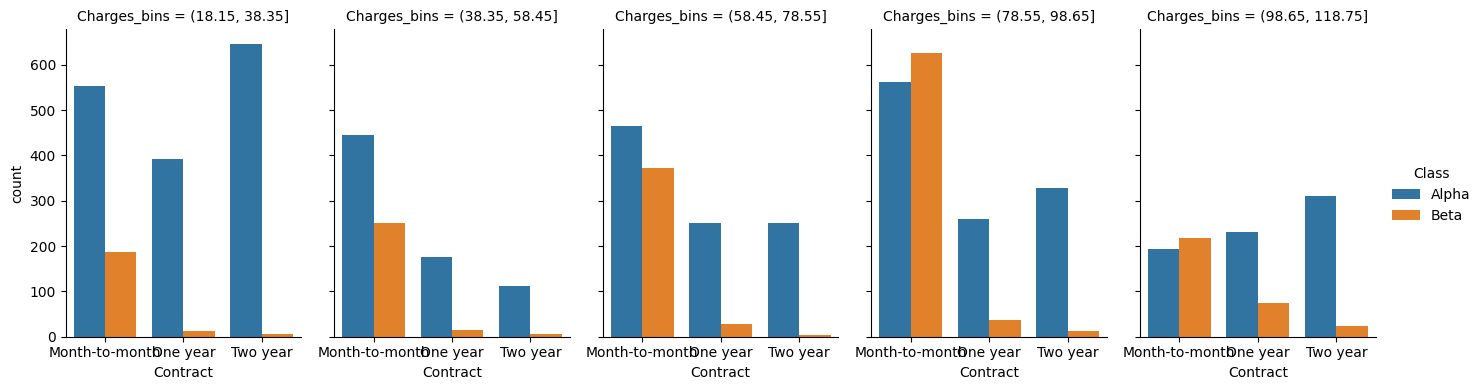

In [388]:

alpha_df['Charges_bins'] = pd.cut(alpha_df['Charges'], bins=5)

sns.catplot(
    data=alpha_df,
    x="Contract",
    hue="Class",
    col="Charges_bins",
    kind="count",
    height=4,
    aspect=0.7,
)


In [389]:

agg_df = alpha_df[["Partner", "Class", "SeniorCity", "Charges"]] \
    .groupby(["Partner", "Class"], observed=True) \
    .mean() * 100


agg_df = agg_df.reset_index()

print(agg_df)


  Partner  Class  SeniorCity  Charges
0      No  Alpha       11.92  5727.19
1      No   Beta       23.17  7145.10
2     Yes  Alpha       13.72  6483.17
3     Yes   Beta       29.60  7980.52


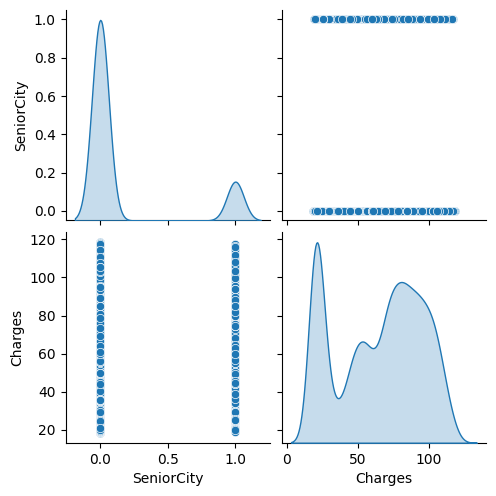

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = ['SeniorCity', 'Charges']


sns.pairplot(alpha_df[numerical_columns], diag_kind="kde")


plt.show()



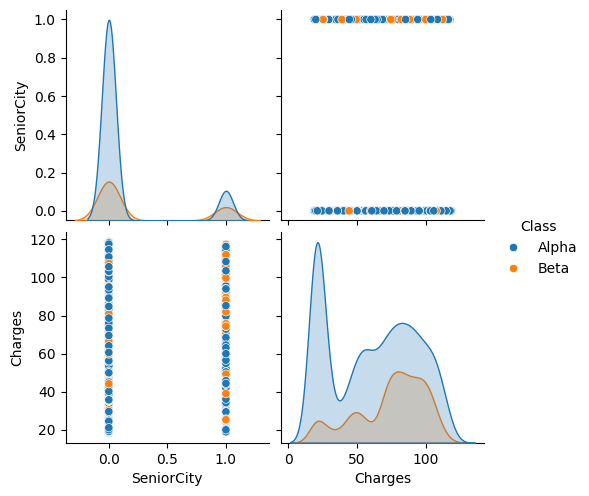

In [391]:
df = alpha_df[[*numerical_columns, "Class"]]

sns.pairplot(df, hue="Class", diag_kind="kde");

**Heuristics**

SeniorCity
0    5901
1    1142
Name: count, dtype: int64
count   7043.00
mean       0.16
std        0.37
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: SeniorCity, dtype: float64


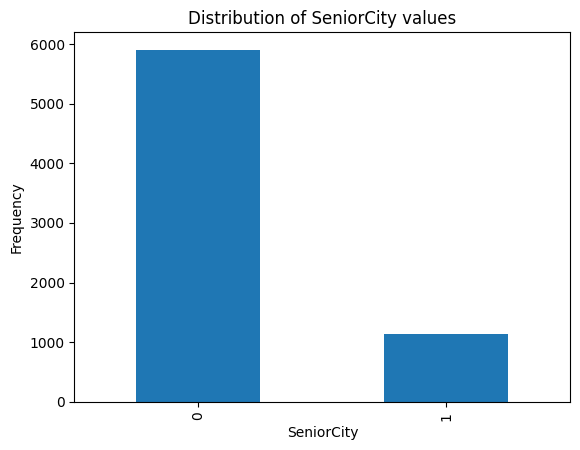

In [392]:

print(alpha_df["SeniorCity"].value_counts())


print(alpha_df["SeniorCity"].describe())


import matplotlib.pyplot as plt
alpha_df["SeniorCity"].value_counts().plot(kind="bar", title="Distribution of SeniorCity values")
plt.xlabel("SeniorCity")
plt.ylabel("Frequency")
plt.show()



In [393]:
# Análisis del porcentaje de clases para SeniorCity 0 y 1
for value in [0, 1]:
    print(f"Percentage for SeniorCity value {value}:")
    for class_value in ['Alpha', 'Beta']:
        class_count = len(alpha_df[(alpha_df['SeniorCity'] == value) & (alpha_df['Class'] == class_value)])
        total_count = len(alpha_df[alpha_df['SeniorCity'] == value])
        if total_count > 0:
            percentage = (class_count / total_count) * 100
            print(f"  {class_value}: {round(percentage, 2)}%")
        else:
            print(f"  {class_value}: No records found")
    print()


Percentage for SeniorCity value 0:
  Alpha: 76.39%
  Beta: 23.61%

Percentage for SeniorCity value 1:
  Alpha: 58.32%
  Beta: 41.68%



In [398]:
def calculate_charge_percentage(df, charge_min: float) -> float:

    total_clients = len(df)
    high_charge_clients = len(df[df['Charges'] > charge_min])

    return round((high_charge_clients / total_clients) * 100, 1)


# porcentaje de clientes con cargos superiores a 50
charge_percentage = calculate_charge_percentage(alpha_df, 50)
print(f"Porcentaje de clientes con cargos mayores a 50: {charge_percentage}%")


Porcentaje de clientes con cargos mayores a 50: 67.4%


In [397]:
def calculate_dependents_percentage(df) -> float:


    total_clients = len(df)
    clients_with_dependents = len(df[df['Dependents'] == 'Yes'])

    return round((clients_with_dependents / total_clients) * 100, 1)


#mostrar el porcentaje de clientes con dependientes
dependents_percentage = calculate_dependents_percentage(alpha_df)
print(f"Porcentaje de clientes con dependientes: {dependents_percentage}%")


Porcentaje de clientes con dependientes: 30.0%


In [399]:
def calculate_contract_percentage(df, contract_type: str) -> float:


    total_clients = len(df)
    clients_with_contract = len(df[df['Contract'] == contract_type])

    return round((clients_with_contract / total_clients) * 100, 1)


#  porcentaje de clientes con contrato mensual
monthly_contract_percentage = calculate_contract_percentage(alpha_df, 'Month-to-month')
print(f"Porcentaje de clientes con contrato mensual: {monthly_contract_percentage}%")

# Cporcentaje de clientes con contrato anual
yearly_contract_percentage = calculate_contract_percentage(alpha_df, 'One year')
print(f"Porcentaje de clientes con contrato anual: {yearly_contract_percentage}%")


Porcentaje de clientes con contrato mensual: 55.0%
Porcentaje de clientes con contrato anual: 20.9%


In [400]:
def calculate_security_percentage(df) -> float:


    total_clients = len(df)
    clients_with_security = len(df[df['Security'] == 'Yes'])

    return round((clients_with_security / total_clients) * 100, 1)


# el porcentaje de clientes con seguridad activada
security_percentage = calculate_security_percentage(alpha_df)
print(f"Porcentaje de clientes con seguridad activada: {security_percentage}%")


Porcentaje de clientes con seguridad activada: 28.7%


In [401]:
def calculate_class_percentage(df, class_type: str) -> float:


    total_clients = len(df)
    clients_in_class = len(df[df['Class'] == class_type])

    return round((clients_in_class / total_clients) * 100, 1)


#  porcentaje de clientes en la clase Alpha
alpha_class_percentage = calculate_class_percentage(alpha_df, 'Alpha')
print(f"Porcentaje de clientes en la clase Alpha: {alpha_class_percentage}%")

# porcentaje de clientes en la clase Betha
beta_class_percentage = calculate_class_percentage(alpha_df, 'Betha')
print(f"Porcentaje de clientes en la clase Betha: {beta_class_percentage}%")


Porcentaje de clientes en la clase Alpha: 73.5%
Porcentaje de clientes en la clase Betha: 26.5%


In [406]:

beta_clients = alpha_df[alpha_df['Class'] == 'Betha']
beta_summary = {}

for column in categorical_columns:
    most_frequent_value = beta_clients[column].mode()[0]
    count = beta_clients[column].value_counts().get(most_frequent_value)
    total = len(beta_clients)
    percentage = (count / total) * 100
    beta_summary[column] = {
        'Most Frequent': most_frequent_value,
        'Count': count,
        'Percentage': round(percentage, 1),
    }

# resumen
for column, data in beta_summary.items():
    print(f"{column}: {data['Most Frequent']} ({data['Count']} clientes, {data['Percentage']}%)")




Partner: No (1200 clientes, 64.2%)
Dependents: No (1543 clientes, 82.6%)
Service1: Yes (1699 clientes, 90.9%)
Service2: Yes (850 clientes, 45.5%)
Security: No (1461 clientes, 78.2%)
OnlineBackup: No (1233 clientes, 66.0%)
DeviceProtection: No (1211 clientes, 64.8%)
TechSupport: No (1446 clientes, 77.4%)
Contract: Month-to-month (1655 clientes, 88.6%)
PaperlessBilling: Yes (1400 clientes, 74.9%)
PaymentMethod: Electronic check (1071 clientes, 57.3%)


In [407]:

beta_clients = alpha_df[alpha_df['Class'] == 'Alpha']
beta_summary = {}

for column in categorical_columns:
    most_frequent_value = beta_clients[column].mode()[0]
    count = beta_clients[column].value_counts().get(most_frequent_value)
    total = len(beta_clients)
    percentage = (count / total) * 100
    beta_summary[column] = {
        'Most Frequent': most_frequent_value,
        'Count': count,
        'Percentage': round(percentage, 1),
    }

# resumen
for column, data in beta_summary.items():
    print(f"{column}: {data['Most Frequent']} ({data['Count']} clientes, {data['Percentage']}%)")



Partner: Yes (2733 clientes, 52.8%)
Dependents: No (3390 clientes, 65.5%)
Service1: Yes (4662 clientes, 90.1%)
Service2: No (2541 clientes, 49.1%)
Security: No (2037 clientes, 39.4%)
OnlineBackup: Yes (1906 clientes, 36.8%)
DeviceProtection: No (1884 clientes, 36.4%)
TechSupport: No (2027 clientes, 39.2%)
Contract: Month-to-month (2220 clientes, 42.9%)
PaperlessBilling: Yes (2771 clientes, 53.6%)
PaymentMethod: Mailed check (1304 clientes, 25.2%)


# **Analisis de resultados y conclusiones**



*   La mayoría de usuarios, el 67.4% tienen cargos mayores a 50, esto nos puede indicar que el consumo es significativo y esto puede ser muy útil para implementar estrategias.
*   Solo el 30.0% de los usarios tiene dependientes. Clave para perfilar
*   El 55.0% de los clientes tiene un contrato mensual. Indica flexibilidad de los usuarios
*  Un 20.9% tiene contrato anual
* 28.7% de los clientes tienen la seguridad activada, lo que indica es que no es muy preferidad entre los usuarios, se podría entrar a refozar.    
* Un 73.5% de los clientes pertenece a la clase Alpha, cifra relevante para hacer un análisis y estrategia del negocio.
*   26.5% de los clientes están en la clase Betha, es muy interesante saber que la cifra es muy baja en comparación a la clase Beta, una exploración de las diferencias en los servicios que consumen entre estas dos clases sería relevante


**Panorama de los clientes Alphas**:
*   52% de los clientes Alpha tienen pareja, esto puede alterar las decisiones de compra y consumo de los usuarios
*   lo más frecuente es que no tengan dependientes (3390 clientes 65%). Esto podría implicar que los Alpha son principalmente por individuos sin cargas familiares.
* Un 90.1% de los clientes Alpha tiene servicio telefónico, un servicio muy popular en la clase Alpha, esto implica que podría haber una mayor demanda o necesidad de mantenimiento de este servicio.
* los demas servicios, ninguno supera el 40%, lo que indica que los Alphas es poco lo que recurren a este tipo de servicios. Interesante que el soporte tecnico sea bajo en comparación al alto uso del servicio telefonico, lo que si queda muy claro es que estos servicios adicionales no soy muy solicitados
*  Los alphas son muy tradicionales con los metodos de pagos.

**Panorama de los clientes Alphas**:
* Un 64.2% de los clientes Beta no tiene pareja. lo que podría reflejarse en una mayor disposición para consumir servicios, pero tambien podría implicar una menor estabilidad
*Un 82.6% de los clientes Beta no tiene dependientes. Esto puede indicar poca carga economica adicional, lo cual podría influir en su capacidad de gasto en servicios. También este factor refuerza el primer punto, de menor estabilidad.
*Al igual que los Alphas, muy  poco uso de servicios adicionales y una alta demanda del servicio telefonico.
*Un 88.6% de los clientes Beta tiene contrato mensual, más del doble que los Alphas, lo que refuerza el punto de poco estabilidad y mucha flexibilidad.
* Más de la mitad pagan con cheques electronicos

**Conclusión:**

Los usarios Alpha se pueden caraterizar más familiares y  con preferencia en la estabilidad,con contratos de mas plazo. Además, prefieren optar por métodos de pago más tradicionales. por parte de los clientes Beta, se caracterizan por ser más independientes y flexibles. Son más digitalizados al adaptar a los pagos electrónicos y facturación digital. Conocer estas carateristicas puede ser crucial para la clasificación de las compras de materiales de Cementos Argos.

Si un usuario selecciona parámetros que se alinean con las características de los clientes Alpha , el servicio podría pronosticar una demanda más estable y predecible, esto se puede asociar a hacer compras en mayores cantidades. En cambio, si los parámetros corresponden a un perfil más parecido al Beta el sistema puede anticiparse a una demanda más inestable, y poco predecible, lo que podría implicar compras más reducidas-

Asi que el servicio Backend puede usar esta clasificación (Alpha/Beta) para ajustar las cantidades y tipos de materiales necesarios, lo que optimiza la planificación de compras y mejora la eficiencia de la cadena de suministro, alineándose con las necesidades de Cementos Argos.









